## Business Objective
An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.
You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.
Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation.
Hence be very careful while providing campaign recommendation.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
df= pd.read_excel('Customer Churn Data.xlsx', sheet_name = 'Data for DSBA')

In [3]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [4]:
df.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

      Gender  Service_Score Account_user_count account_segment  \
11255   Male            3.0                  2           Super   
11256   Male            3.0                  5             HNI   
11257   Male            3.0                  2           Super   
11258   Male            4.0                  5           Super   
11259   Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile

In [5]:
df.shape

(11260, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [7]:
df.describe()

AccountID         Churn     City_Tier  CC_Contacted_LY  \
count  11260.00000  11260.000000  11148.000000     11158.000000   
mean   25629.50000      0.168384      1.653929        17.867091   
std     3250.62635      0.374223      0.915015         8.853269   
min    20000.00000      0.000000      1.000000         4.000000   
25%    22814.75000      0.000000      1.000000        11.000000   
50%    25629.50000      0.000000      1.000000        16.000000   
75%    28444.25000      0.000000      3.000000        23.000000   
max    31259.00000      1.000000      3.000000       132.000000   

       Service_Score  CC_Agent_Score   Complain_ly  
count   11162.000000    11144.000000  10903.000000  
mean        2.902526        3.066493      0.285334  
std         0.725584        1.379772      0.451594  
min         0.000000        1.000000      0.000000  
25%         2.000000        2.000000      0.000000  
50%         3.000000        3.000000      0.000000  
75%         3.000000        4.000000      1.000000  
max         5.000000        5.000000      1.000000

In [8]:
df.describe(include='object').T

count  unique         top  freq
Tenure                     11158      38           1  1351
Payment                    11151       5  Debit Card  4587
Gender                     11152       4        Male  6328
Account_user_count         11148       7           4  4569
account_segment            11163       7       Super  4062
Marital_Status             11048       3     Married  5860
rev_per_month              11158      59           3  1746
rev_growth_yoy             11260      20          14  1524
coupon_used_for_payment    11260      20           1  4373
Day_Since_CC_connect       10903      24           3  1816
cashback                 10789.0  5693.0      155.62  10.0
Login_device               11039       3      Mobile  7482

### Checking Null values

In [9]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

### Check for duplicate data

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(11260, 19)


### Getting unique counts of all Objects

In [11]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Tenure
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64


Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64


Account_user_count
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64


account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +        

In [12]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [13]:
# Converting columns to numeric types 
for col in ['Tenure','Account_user_count','rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
df.head(15)

AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY           Payment  \
0       20000      1     4.0        3.0              6.0        Debit Card   
1       20001      1     0.0        1.0              8.0               UPI   
2       20002      1     0.0        1.0             30.0        Debit Card   
3       20003      1     0.0        3.0             15.0        Debit Card   
4       20004      1     0.0        1.0             12.0       Credit Card   
5       20005      1     0.0        1.0             22.0        Debit Card   
6       20006      1     2.0        3.0             11.0  Cash on Delivery   
7       20007      1     0.0        1.0              6.0       Credit Card   
8       20008      1    13.0        3.0              9.0          E wallet   
9       20009      1     0.0        1.0             31.0        Debit Card   
10      20010      1     4.0        NaN             18.0  Cash on Delivery   
11      20011      1    11.0        1.0              6.0        Debit Card   
12      20012      1     NaN        1.0             11.0  Cash on Delivery   
13      20013      1     0.0        1.0             15.0       Credit Card   
14      20014      1     9.0        3.0             15.0       Credit Card   

    Gender  Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0   Female            3.0                 3.0           Super             2.0   
1     Male            3.0                 4.0    Regular Plus             3.0   
2     Male            2.0                 4.0    Regular Plus             3.0   
3     Male            2.0                 4.0           Super             5.0   
4     Male            2.0                 3.0    Regular Plus             5.0   
5   Female            3.0                 NaN    Regular Plus             5.0   
6     Male            2.0                 3.0           Super             2.0   
7     Male            3.0                 3.0    Regular Plus             2.0   
8     Male            2.0                 4.0    Regular Plus             3.0   
9     Male            2.0                 5.0    Regular Plus             3.0   
10       F            2.0                 3.0         Regular             3.0   
11    Male            3.0                 4.0             HNI             3.0   
12    Male            2.0                 3.0    Regular Plus             3.0   
13    Male            3.0                 4.0    Regular Plus             3.0   
14    Male            3.0                 4.0             HNI             2.0   

   Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0          Single            9.0          1.0            11.0   
1          Single            7.0          1.0            15.0   
2          Single            6.0          1.0            14.0   
3          Single            8.0          0.0            23.0   
4          Single            3.0          0.0            11.0   
5          Single            2.0          1.0            22.0   
6        Divorced            4.0          0.0            14.0   
7        Divorced            3.0          1.0            16.0   
8        Divorced            2.0          1.0            14.0   
9          Single            2.0          0.0            12.0   
10       Divorced            2.0          0.0            12.0   
11         Single           10.0          1.0            13.0   
12         Single            2.0          1.0            13.0   
13       Divorced            1.0          1.0            17.0   
14         Single            2.0          0.0            16.0   

    coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                       1.0                   5.0    159.93       Mobile  
1                       0.0                   0.0    120.90       Mobile  
2                       0.0                   3.0       NaN       Mobile  
3                       0.0                   3.0    134.07       Mobile  
4                       1.0               

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [16]:
df.median()

AccountID                  25629.50
Churn                          0.00
Tenure                         9.00
City_Tier                      1.00
CC_Contacted_LY               16.00
Service_Score                  3.00
Account_user_count             4.00
CC_Agent_Score                 3.00
rev_per_month                  5.00
Complain_ly                    0.00
rev_growth_yoy                15.00
coupon_used_for_payment        1.00
Day_Since_CC_connect           3.00
cashback                     165.25
dtype: float64

In [17]:
#checking if the data is balanced or not
df.groupby(["Churn"]).count()

AccountID  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
Churn                                                                   
0           9364    9194       9269             9280     9277    9278   
1           1896    1848       1879             1878     1874    1874   

       Service_Score  Account_user_count  account_segment  CC_Agent_Score  \
Churn                                                                       
0               9282                8986             9285            9270   
1               1880                1830             1878            1874   

       Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
Churn                                                               
0                9184           8694         9065            9361   
1                1864           1775         1838            1896   

       coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  
Churn                                                                         
0                         9361                  9070      8976          9185  
1                         1896                  1832      1811          1854

In [18]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64


account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64


Marital_Status
Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64


Login_device
Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64




## Gender


The 'Gender' column has some inconsistencies with the representation of gender. We need to standardize these values.


In [19]:
# Standardize 'Gender' values
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})

## Account Segment


The 'account_segment' column has similar categories that need to be standardized.


In [20]:
df['account_segment'] = df['account_segment'].replace({'Regular +': 'Regular Plus', 'Super +': 'Super Plus'})

## Login Device

The 'Login_device' column has an invalid entry '&&&&' that should be addressed.

In [21]:
df['Login_device'] = df['Login_device'].replace({'&&&&': np.nan})

In [22]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6704
Female    4448
Name: Gender, dtype: int64


account_segment
Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64


Marital_Status
Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64


Login_device
Mobile      7482
Computer    3018
Name: Login_device, dtype: int64




 **Dropping Column AccountID**


In [23]:
df_copy = df.copy()

In [24]:
df.drop('AccountID',axis=1,inplace=True)
#df.set_index('AccountID',drop=True,inplace=True)
#df.head()
display(df.shape)

(11260, 18)

**Checking for Outliers**

In [25]:
feature = df.drop(['Churn','City_Tier','Service_Score','CC_Agent_Score','Complain_ly','Account_user_count'],axis=1).describe().columns
feature

Index(['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback'],
      dtype='object')

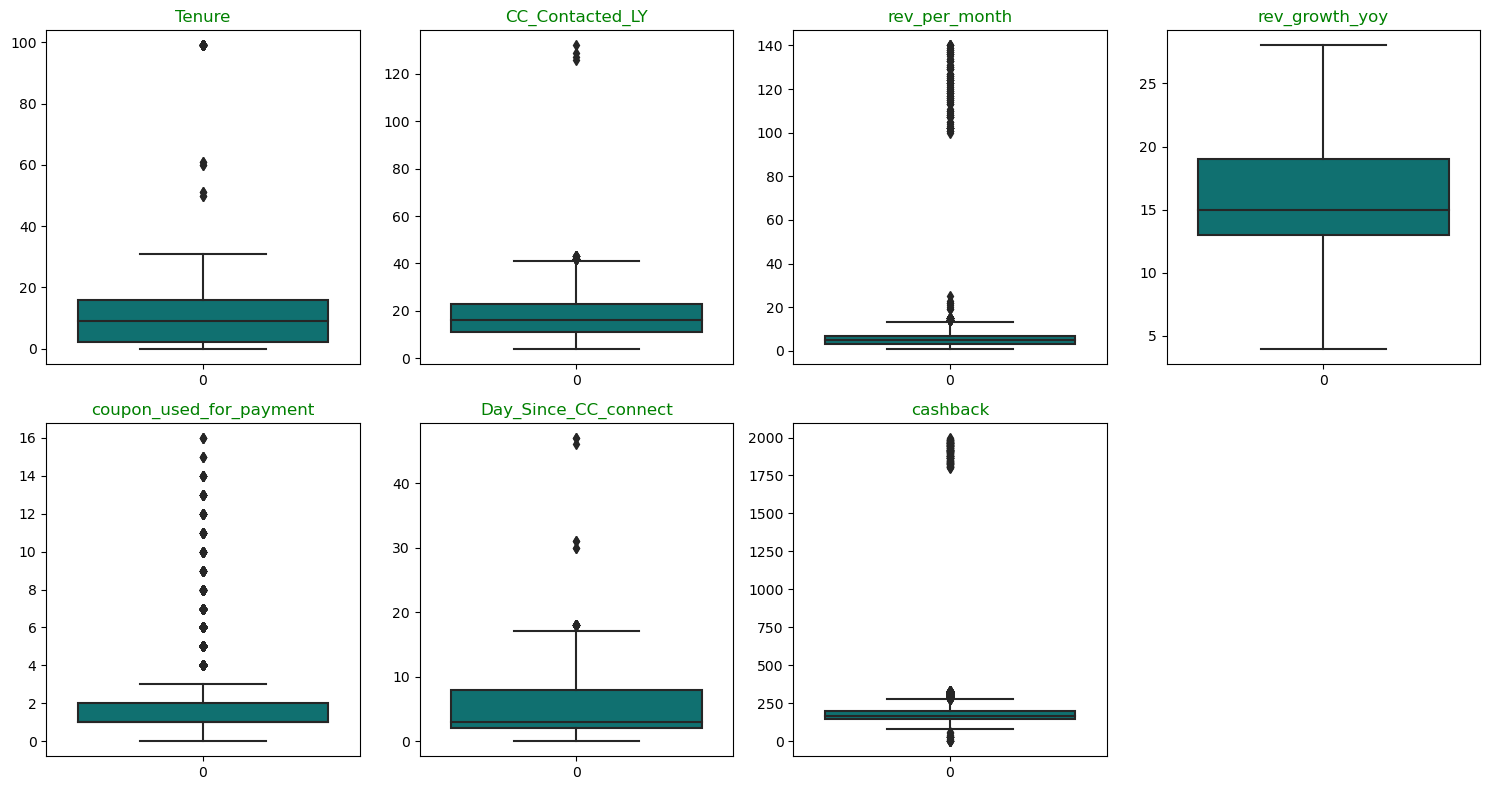

In [26]:
fig=plt.figure(figsize=(15,8))
for i in range(0,len(feature)):
    plt.subplot(2,4,i+1)
    #sns.boxplot(df[cols[i]],color='orange')
    sns.boxplot(df[feature[i]],color='teal')
    plt.title(feature[i],color='green')
    #plt.title(cols[i],color='green')
fig.tight_layout()
plt.show()
#plt.figure(figsize=(20,5))
#sns.boxplot(df)
#plt.show()

# Univariate Analysis

#### Countplot of all Categorical Columns

In [27]:
cat_col = df.select_dtypes(['object']).columns
cat_col

Index(['Payment', 'Gender', 'account_segment', 'Marital_Status',
       'Login_device'],
      dtype='object')

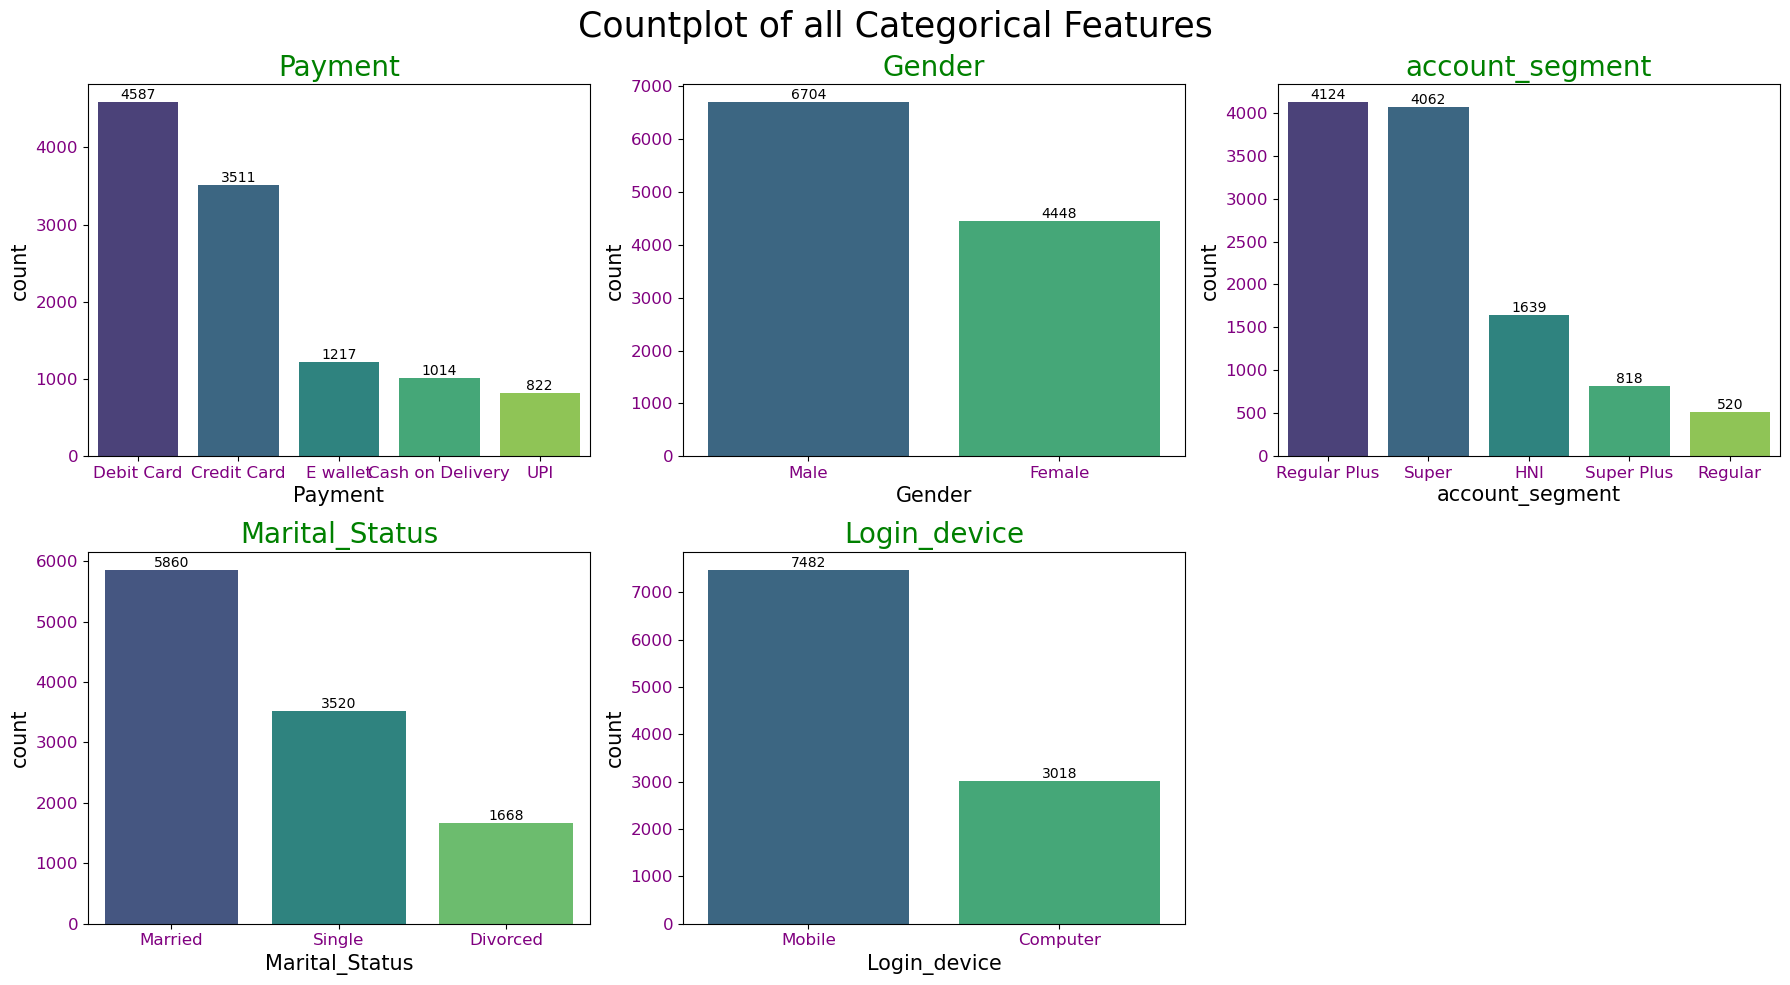

In [28]:
fig = plt.figure(figsize=(18,10))
plt.suptitle('Countplot of all Categorical Features', fontsize = 25,color='black')

#palettes = ['Set1', 'Set2', 'Set3', 'coolwarm', 'Spectral', 'husl']

for i in range(0,len(cat_col)):    
    plt.subplot(2,3,i+1)
    #palette = palettes[i % len(palettes)]
    ax=sns.countplot(x=df[cat_col[i]],data=df,order=df[cat_col[i]].value_counts().index,palette='viridis')
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.title("{}".format(cat_col[i]),color='green',fontsize=20)
    plt.xlabel(cat_col[i],color='black',fontsize=15)
    plt.ylabel("count",fontsize=15,color='black')
    plt.xticks(color='purple',fontsize=12)
    plt.yticks(color='purple',fontsize=12);
fig.tight_layout() 
plt.show()

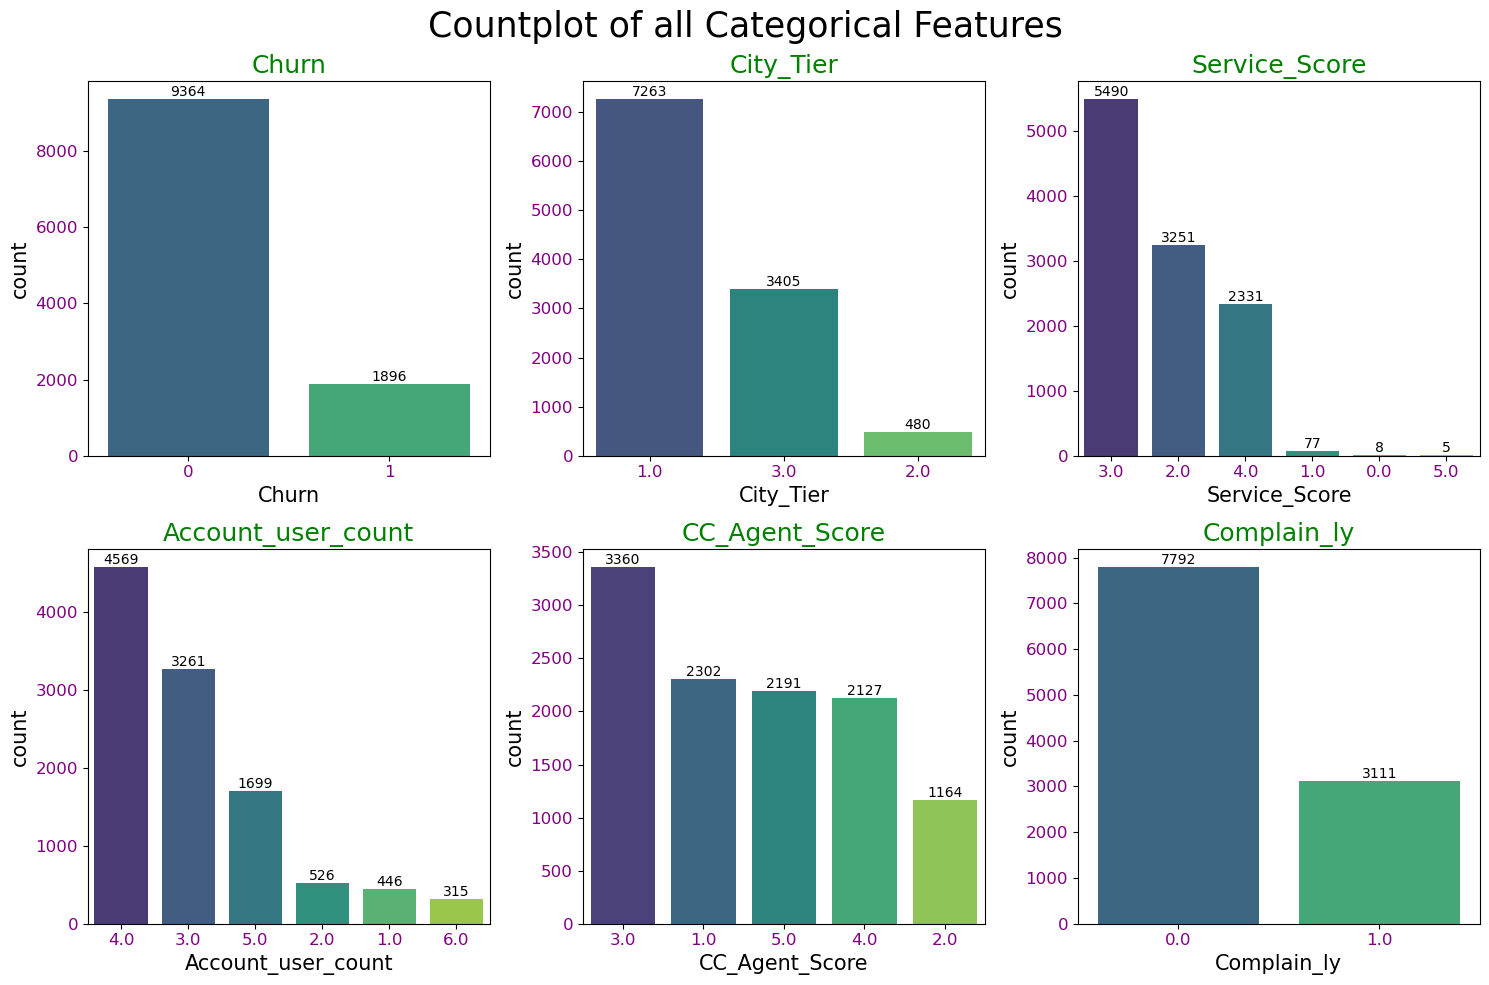

In [29]:
cat_int_col = ['Churn','City_Tier','Service_Score','Account_user_count','CC_Agent_Score','Complain_ly']
fig = plt.figure(figsize=(15,10))
plt.suptitle('Countplot of all Categorical Features', fontsize = 25,color='black')
for i in range(0,len(cat_int_col)):    
    plt.subplot(2,3,i+1)
    ax=sns.countplot(x=df[cat_int_col[i]],data=df,order=df[cat_int_col[i]].value_counts().index,palette='viridis')
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.title("{}".format(cat_int_col[i]),color='green',fontsize=18)
    plt.xlabel(cat_int_col[i],color='black',fontsize=15)
    plt.ylabel("count",fontsize=15,color='black')
    plt.xticks(color='purple',fontsize=12)
    plt.yticks(color='purple',fontsize=12);
fig.tight_layout() 
plt.show()

## Histogram and Boxplot of all continuous variables

In [30]:
num_cols = ['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']
num_cols

['Tenure',
 'CC_Contacted_LY',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

In [31]:
df[num_cols].describe()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
count  11042.000000     11158.000000   10469.000000    11257.000000   
mean      11.025086        17.867091       6.362594       16.193391   
std       12.879782         8.853269      11.909686        3.757721   
min        0.000000         4.000000       1.000000        4.000000   
25%        2.000000        11.000000       3.000000       13.000000   
50%        9.000000        16.000000       5.000000       15.000000   
75%       16.000000        23.000000       7.000000       19.000000   
max       99.000000       132.000000     140.000000       28.000000   

       coupon_used_for_payment  Day_Since_CC_connect      cashback  
count             11257.000000          10902.000000  10787.000000  
mean                  1.790619              4.633187    196.236370  
std                   1.969551              3.697637    178.660514  
min                   0.000000              0.000000      0.000000  
25%                   1.000000              2.000000    147.210000  
50%                   1.000000              3.000000    165.250000  
75%                   2.000000              8.000000    200.010000  
max                  16.000000             47.000000   1997.000000

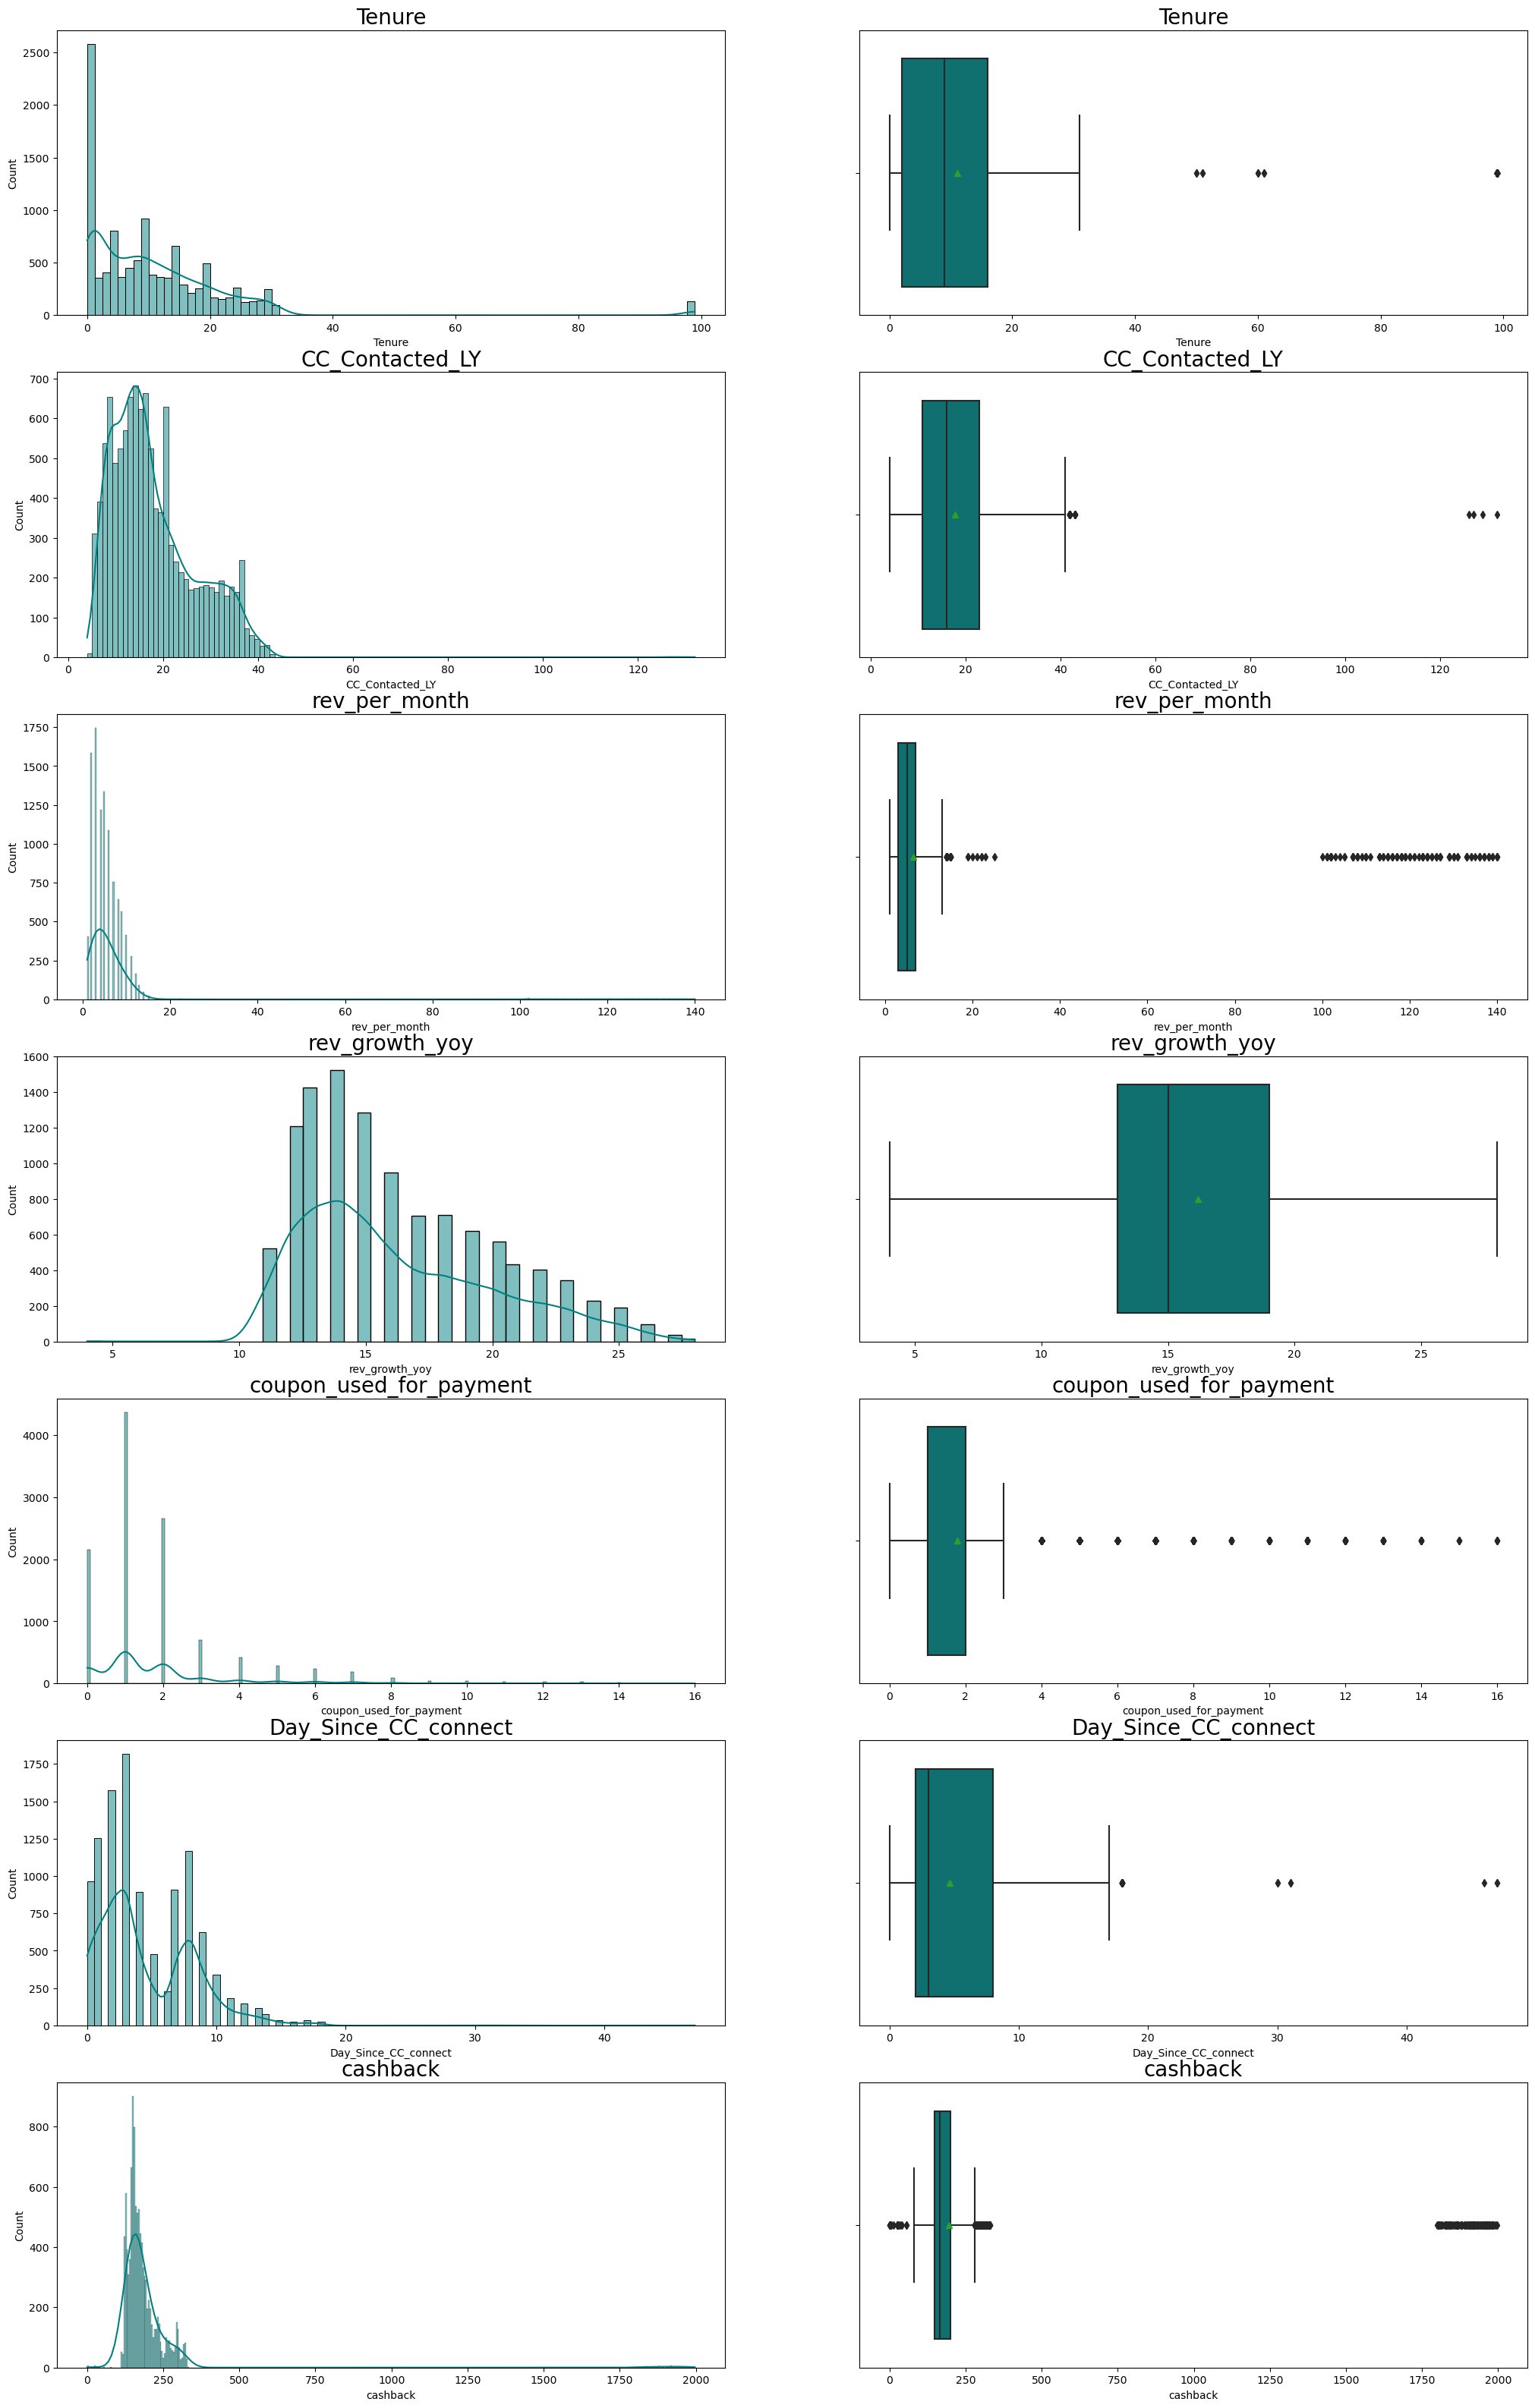

In [32]:
fig, ax = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(25,40)
# plt.suptitle('Histogram & Boxplot of all Continuous Features', fontsize = 25,color='orange')
ax1=sns.histplot(data=df,x='Tenure',kde=True,ax=ax[0][0],color='teal')
ax1.set_title("Tenure",fontsize=20,color='black')
ax2=sns.boxplot(data=df,x='Tenure',showmeans=True,ax=ax[0][1],color='teal')
ax2.set_title("Tenure",fontsize=20,color='black')
ax3=sns.histplot(data=df,x='CC_Contacted_LY',kde=True,ax=ax[1][0],color='teal')
ax3.set_title("CC_Contacted_LY",fontsize=20,color='black')
ax4=sns.boxplot(data=df,x='CC_Contacted_LY',showmeans=True,ax=ax[1][1],color='teal')
ax4.set_title("CC_Contacted_LY",fontsize=20,color='black')
ax5=sns.histplot(data=df,x='rev_per_month',kde=True,ax=ax[2][0],color='teal')
ax5.set_title("rev_per_month",fontsize=20,color='black')
ax6=sns.boxplot(data=df,x='rev_per_month',showmeans=True,ax=ax[2][1],color='teal')
ax6.set_title("rev_per_month",fontsize=20,color='black')
ax7=sns.histplot(data=df,x='rev_growth_yoy',kde=True,ax=ax[3][0],color='teal')
ax7.set_title("rev_growth_yoy",fontsize=20,color='black')
ax8=sns.boxplot(data=df,x='rev_growth_yoy',showmeans=True,ax=ax[3][1],color='teal')
ax8.set_title("rev_growth_yoy",fontsize=20,color='black')
ax9=sns.histplot(data=df,x='coupon_used_for_payment',kde=True,ax=ax[4][0],color='teal')
ax9.set_title("coupon_used_for_payment",fontsize=20,color='black')
ax10=sns.boxplot(data=df,x='coupon_used_for_payment',showmeans=True,ax=ax[4][1],color='teal')
ax10.set_title("coupon_used_for_payment",fontsize=20,color='black')
ax11=sns.histplot(data=df,x='Day_Since_CC_connect',kde=True,ax=ax[5][0],color='teal')
ax11.set_title("Day_Since_CC_connect",fontsize=20,color='black')
ax12=sns.boxplot(data=df,x='Day_Since_CC_connect',showmeans=True,ax=ax[5][1],color='teal')
ax12.set_title("Day_Since_CC_connect",fontsize=20,color='black')
ax13=sns.histplot(data=df,x='cashback',kde=True,ax=ax[6][0],color='teal')
ax13.set_title("cashback",fontsize=20,color='black')
ax14=sns.boxplot(data=df,x='cashback',showmeans=True,ax=ax[6][1],color='teal')
ax14.set_title("cashback",fontsize=20,color='black')
plt.show()

## Bivariate analysis

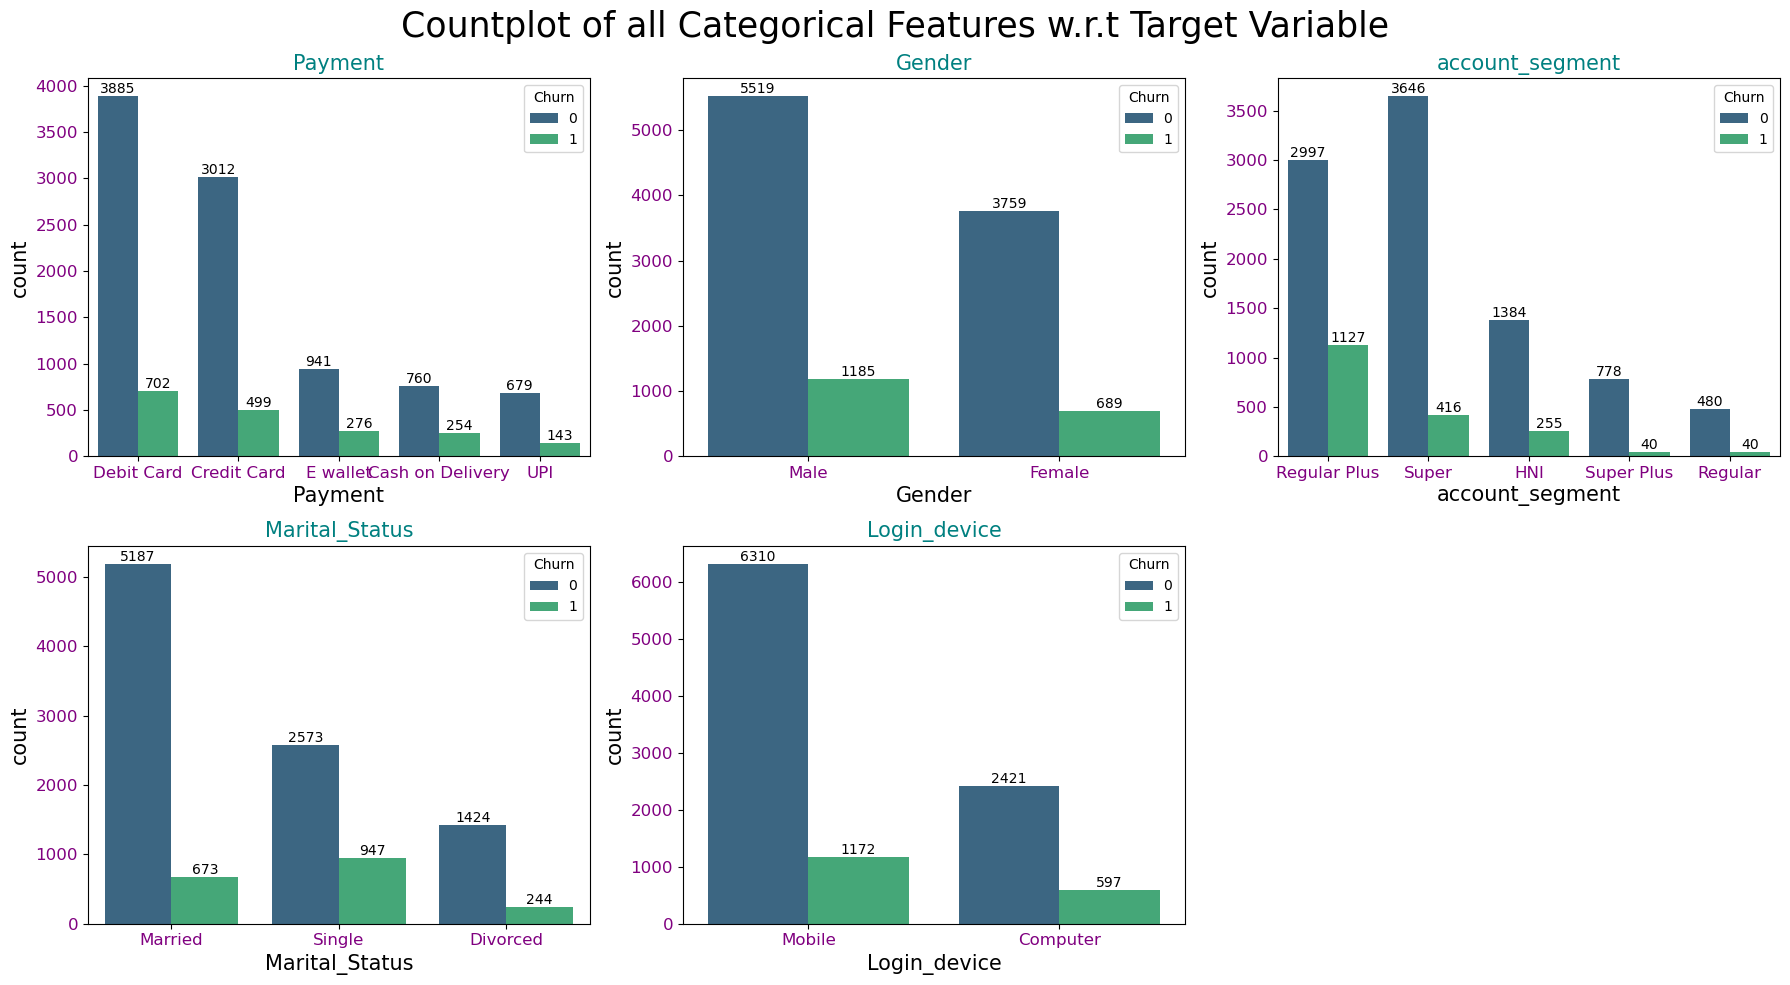

In [33]:
fig=plt.figure(figsize=(18,10))
plt.suptitle('Countplot of all Categorical Features w.r.t Target Variable', fontsize = 25)

for i in range(0,len(cat_col)):    
    plt.subplot(2,3,i+1)
    ax=sns.countplot(x=df[cat_col[i]],data=df,order=df[cat_col[i]].value_counts().index,hue='Churn',palette='viridis')
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.title("{}".format(cat_col[i]),color='teal',fontsize=15)
    plt.xlabel(cat_col[i],fontsize=15)
    plt.ylabel("count",fontsize=15)
    plt.xticks(color='purple',fontsize=12)
    plt.yticks(color='purple',fontsize=12);
plt.tight_layout()     
plt.show()

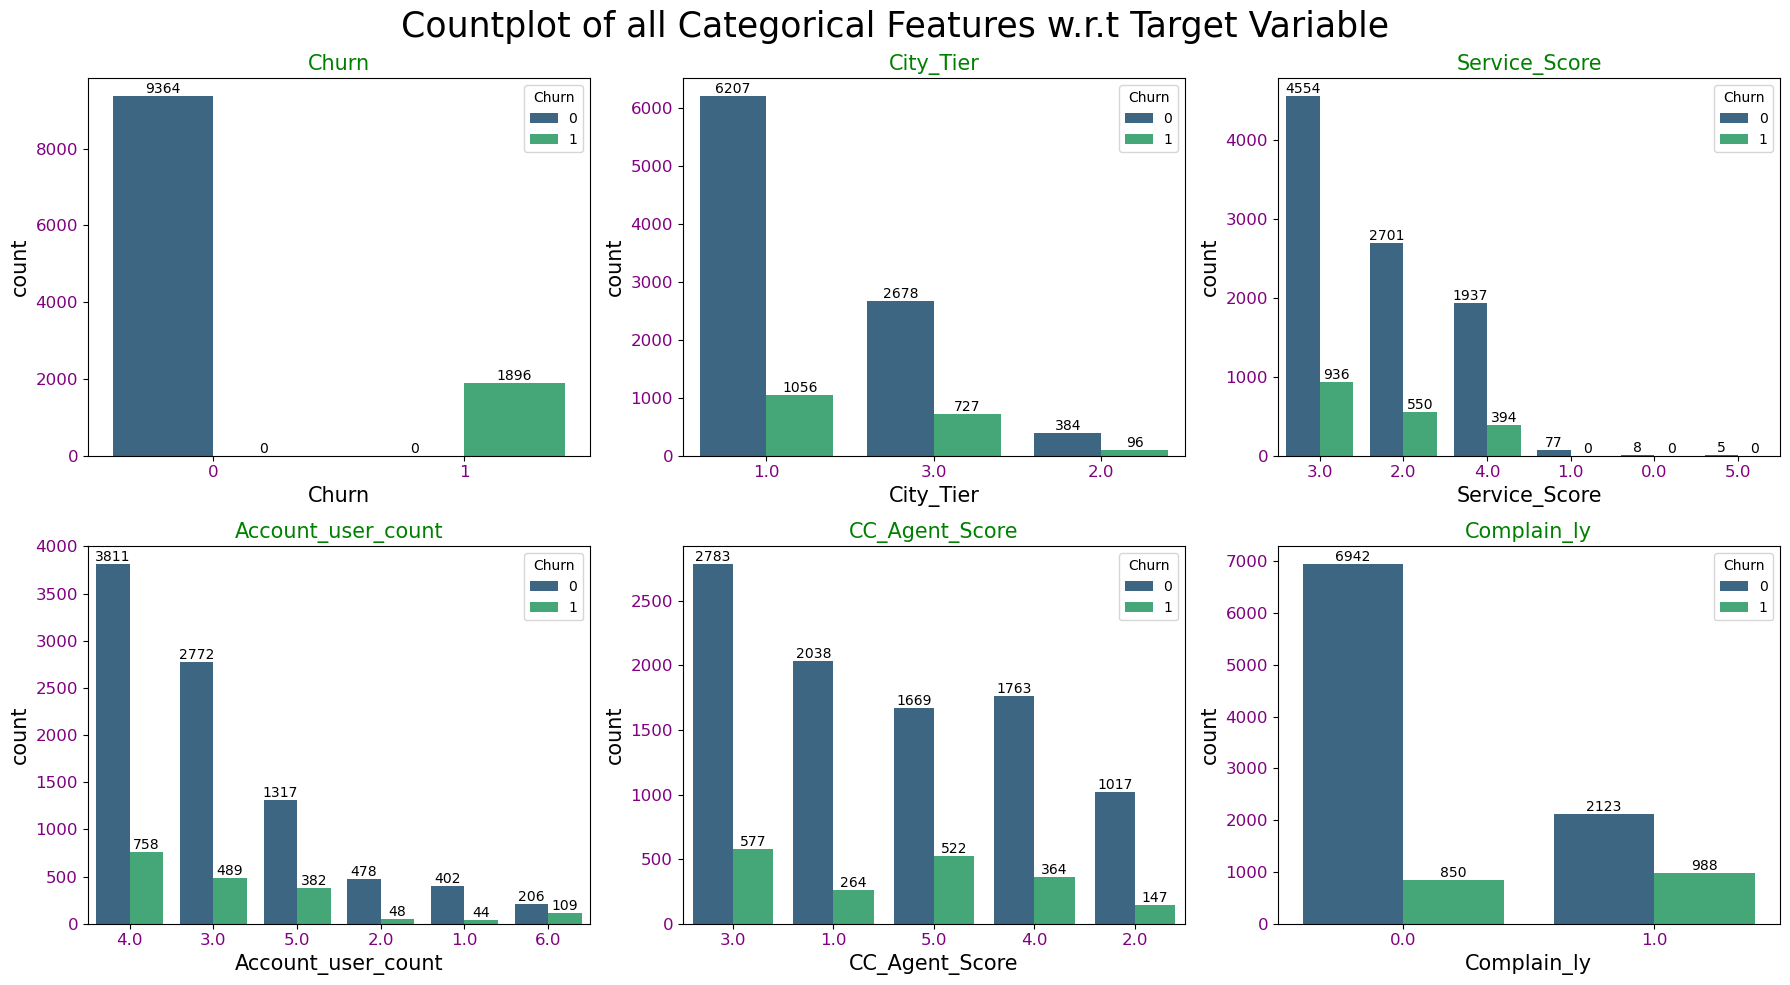

In [34]:
fig=plt.figure(figsize=(18,10))
plt.suptitle('Countplot of all Categorical Features w.r.t Target Variable', fontsize = 25)

for i in range(0,len(cat_int_col)):    
    plt.subplot(2,3,i+1)
    ax=sns.countplot(x=df[cat_int_col[i]],data=df,order=df[cat_int_col[i]].value_counts().index,hue='Churn',palette='viridis')
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.title("{}".format(cat_int_col[i]),color='green',fontsize=15)
    plt.xlabel(cat_int_col[i],fontsize=15)
    plt.ylabel("count",fontsize=15)
    plt.xticks(color='purple',fontsize=12)
    plt.yticks(color='purple',fontsize=12);
plt.tight_layout()     
plt.show()

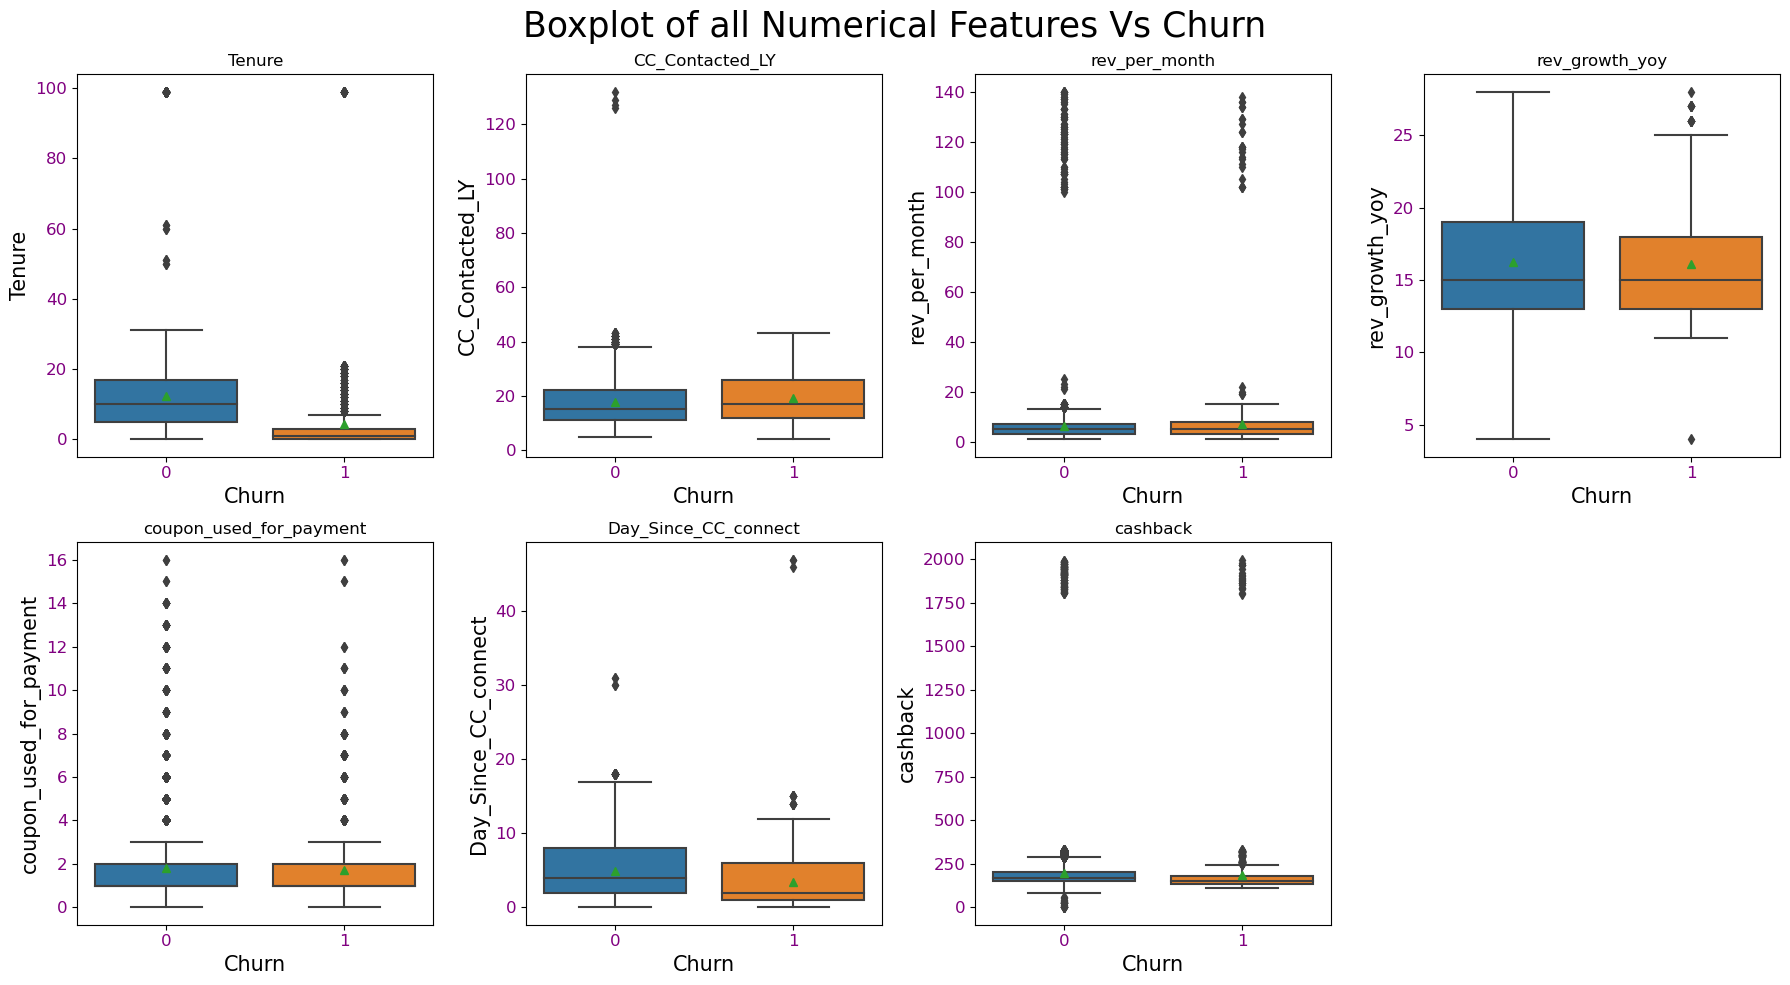

In [35]:
fig=plt.figure(figsize=(18,10))
plt.suptitle('Boxplot of all Numerical Features Vs Churn', fontsize = 25)
for i in range(0,len(num_cols)):
   ax=fig.add_subplot(2,4,i+1)
   sns.boxplot(y=df[num_cols[i]], x=df['Churn'],showmeans = True)
   ax.set_title(num_cols[i])
   ax.set_xlabel("Churn",fontsize=15)
   ax.set_ylabel(num_cols[i],fontsize=15)
   plt.xticks(color='purple',fontsize=12)
   plt.yticks(color='purple',fontsize=12)

fig.tight_layout()
plt.show();

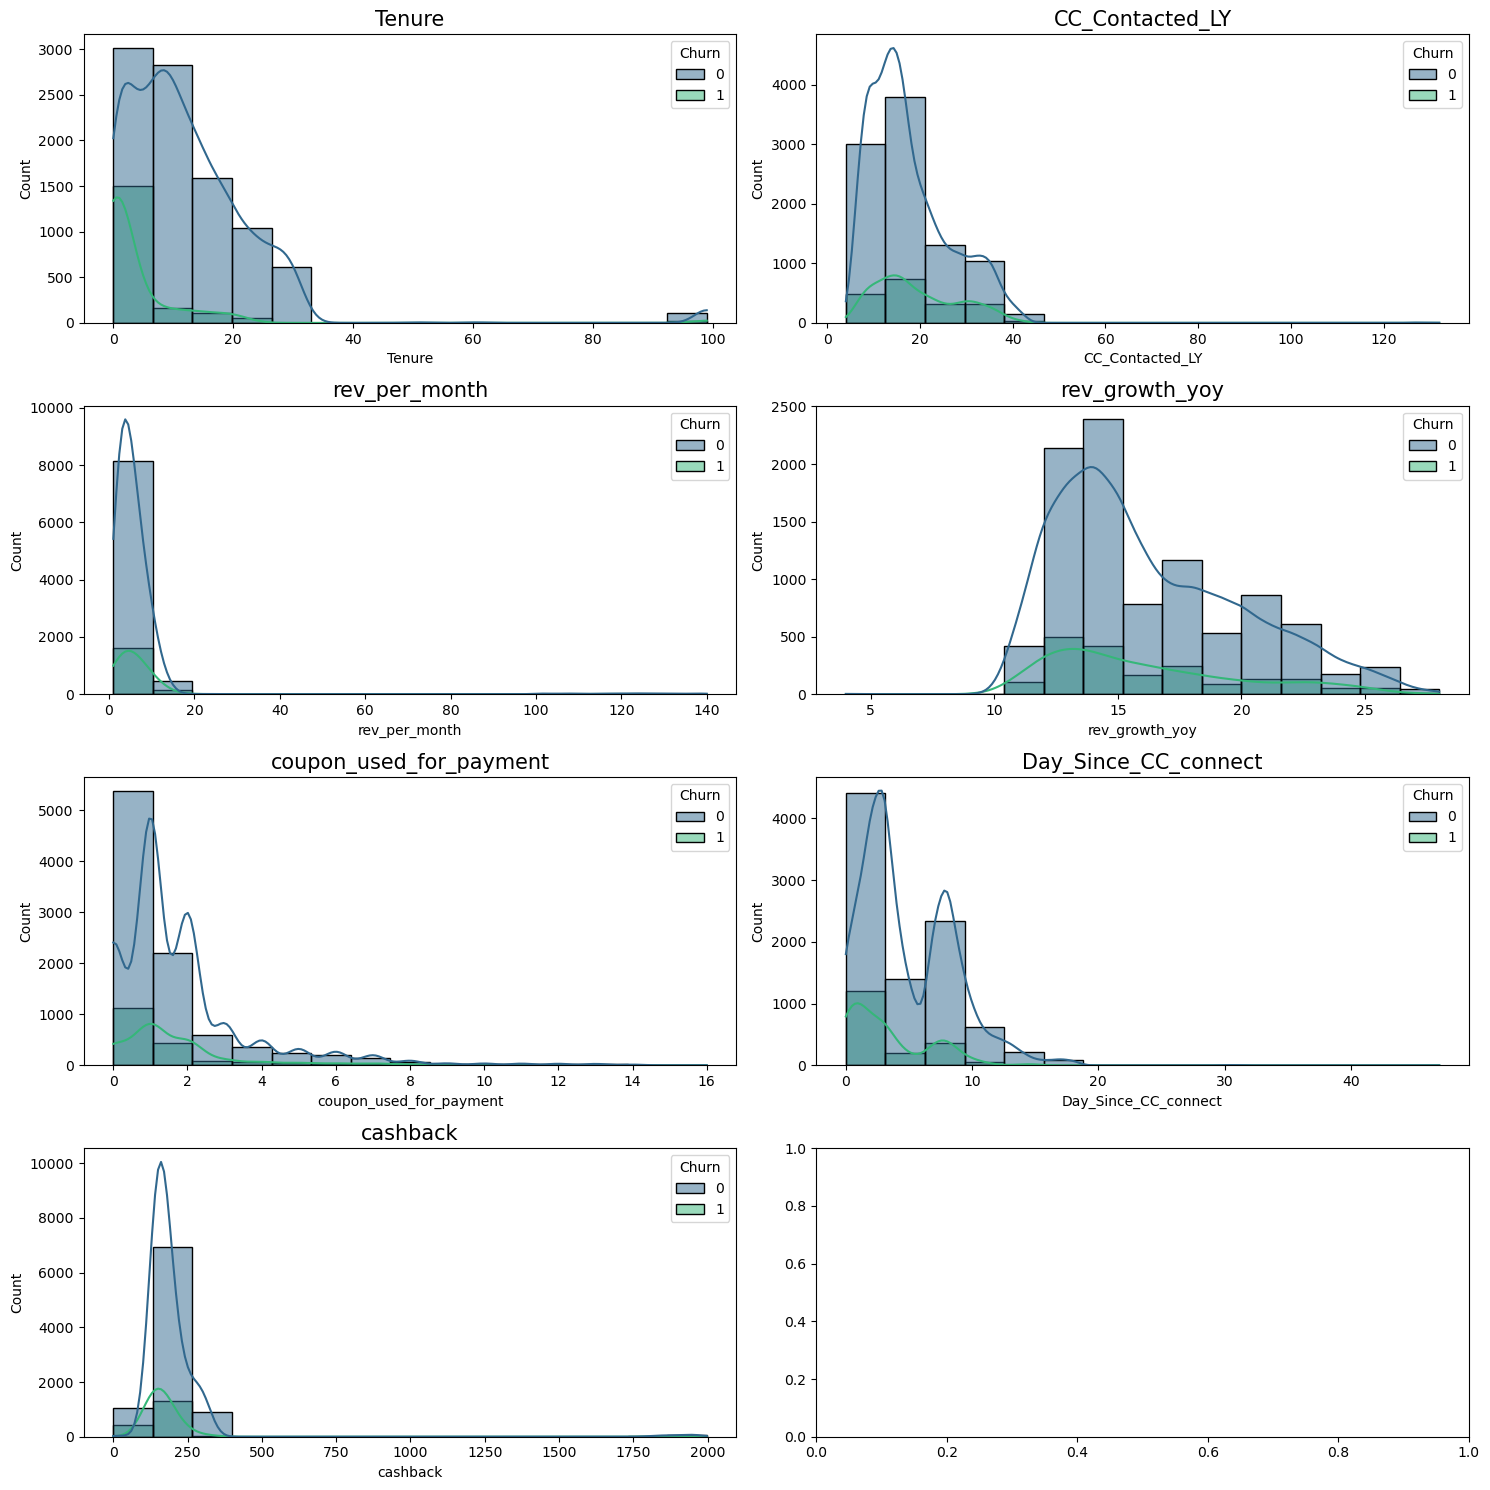

In [36]:
fig,axes = plt.subplots(4,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.2)
for i,j in zip(num_cols,axes.flatten()):
    axes=sns.histplot(data = df,x = i,ax=j,hue='Churn',kde=True, bins=15, palette='viridis')
    axes.set_title(i,fontsize=15)
fig.tight_layout()
plt.show()

**Correlation Matrix**

In [37]:
corr = df.corr(numeric_only=True)
corr

Churn    Tenure  City_Tier  CC_Contacted_LY  \
Churn                    1.000000 -0.233150   0.084135         0.072071   
Tenure                  -0.233150  1.000000  -0.030223        -0.004261   
City_Tier                0.084135 -0.030223   1.000000         0.011835   
CC_Contacted_LY          0.072071 -0.004261   0.011835         1.000000   
Service_Score            0.008991  0.009608  -0.006443         0.060052   
Account_user_count       0.107292 -0.004052   0.025498         0.020351   
CC_Agent_Score           0.105796 -0.020031  -0.011479        -0.000209   
rev_per_month            0.022538  0.028431  -0.028521         0.015675   
Complain_ly              0.251488 -0.021419   0.002478         0.027244   
rev_growth_yoy          -0.013877  0.018824  -0.030025         0.072913   
coupon_used_for_payment -0.014826  0.089171   0.021124         0.004969   
Day_Since_CC_connect    -0.147956  0.122612   0.023158         0.012938   
cashback                -0.032382  0.078416   0.010516         0.002679   

                         Service_Score  Account_user_count  CC_Agent_Score  \
Churn                         0.008991            0.107292        0.105796   
Tenure                        0.009608           -0.004052       -0.020031   
City_Tier                    -0.006443            0.025498       -0.011479   
CC_Contacted_LY               0.060052            0.020351       -0.000209   
Service_Score                 1.000000            0.323327        0.032135   
Account_user_count            0.323327            1.000000       -0.017522   
CC_Agent_Score                0.032135           -0.017522        1.000000   
rev_per_month                 0.026691            0.020600        0.022167   
Complain_ly                   0.002643            0.003411       -0.031459   
rev_growth_yoy                0.103374            0.067616       -0.027159   
coupon_used_for_payment       0.181914            0.146081        0.030661   
Day_Since_CC_connect          0.099770            0.037573        0.030808   
cashback                      0.042961            0.037057       -0.012599   

                         rev_per_month  Complain_ly  rev_growth_yoy  \
Churn                         0.022538     0.251488       -0.013877   
Tenure                        0.028431    -0.021419        0.018824   
City_Tier                    -0.028521     0.002478       -0.030025   
CC_Contacted_LY               0.015675     0.027244        0.072913   
Service_Score                 0.026691     0.002643        0.103374   
Account_user_count            0.020600     0.003411        0.067616   
CC_Agent_Score                0.022167    -0.031459       -0.027159   
rev_per_month                 1.000000    -0.002262        0.024114   
Complain_ly                  -0.002262     1.000000       -0.005122   
rev_growth_yoy                0.024114    -0.005122        1.000000   
coupon_used_for_payment       0.016548    -0.007023        0.018341   
Day_Since_CC_connect         -0.000923    -0.041111        0.002206   
cashback                      0.002974     0.008734       -0.001157   

                         coupon_used_for_payment  Day_Since_CC_connect  \
Churn                                  -0.014826             -0.147956   
Tenure                                  0.089171              0.122612   
City_Tier                               0.021124              0.023158   
CC_Contacted_LY                         0.004969              0.012938   
Service_Score                           0.181914              0.099770   
Account_user_count                      0.146081              0.037573   
CC_Agent_Score                          0.030661              0.030808   
rev_per_month                           0.016548             -0.000923   
Complain_ly                            -0.007023             -0.041111   
rev_growth_yoy                          0.018341              0.002206   
coupon_used_for_payment                 1.000000              0.361735   
D

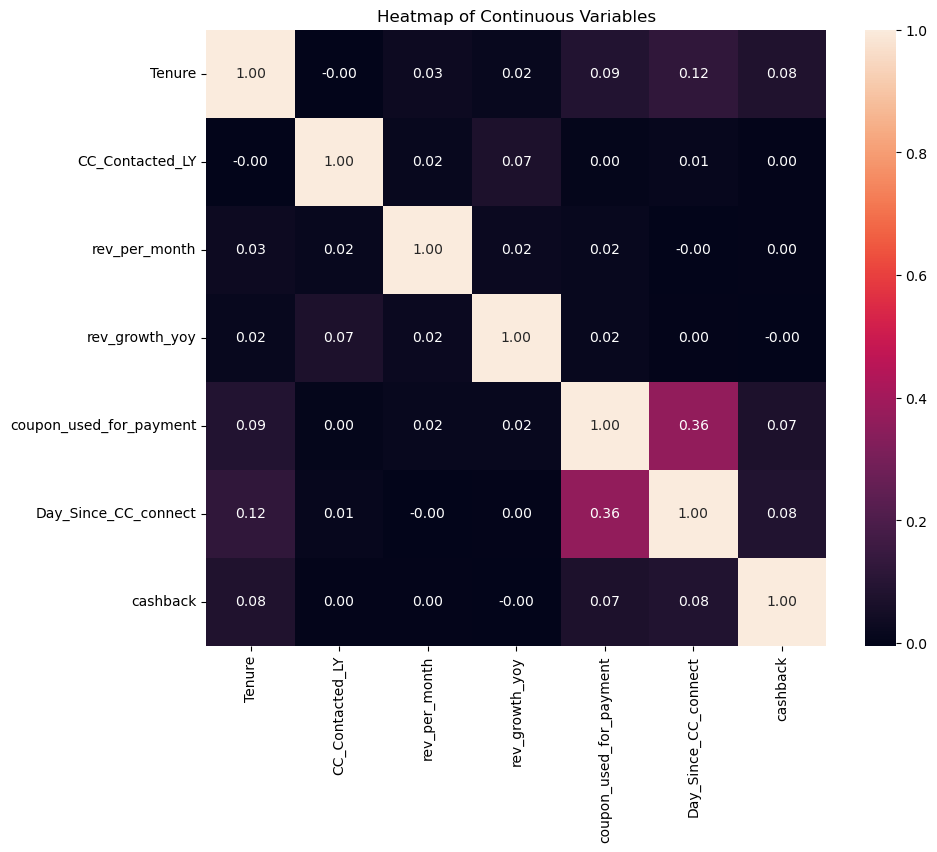

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True,fmt='.2f')
plt.title('Heatmap of Continuous Variables')
plt.show()

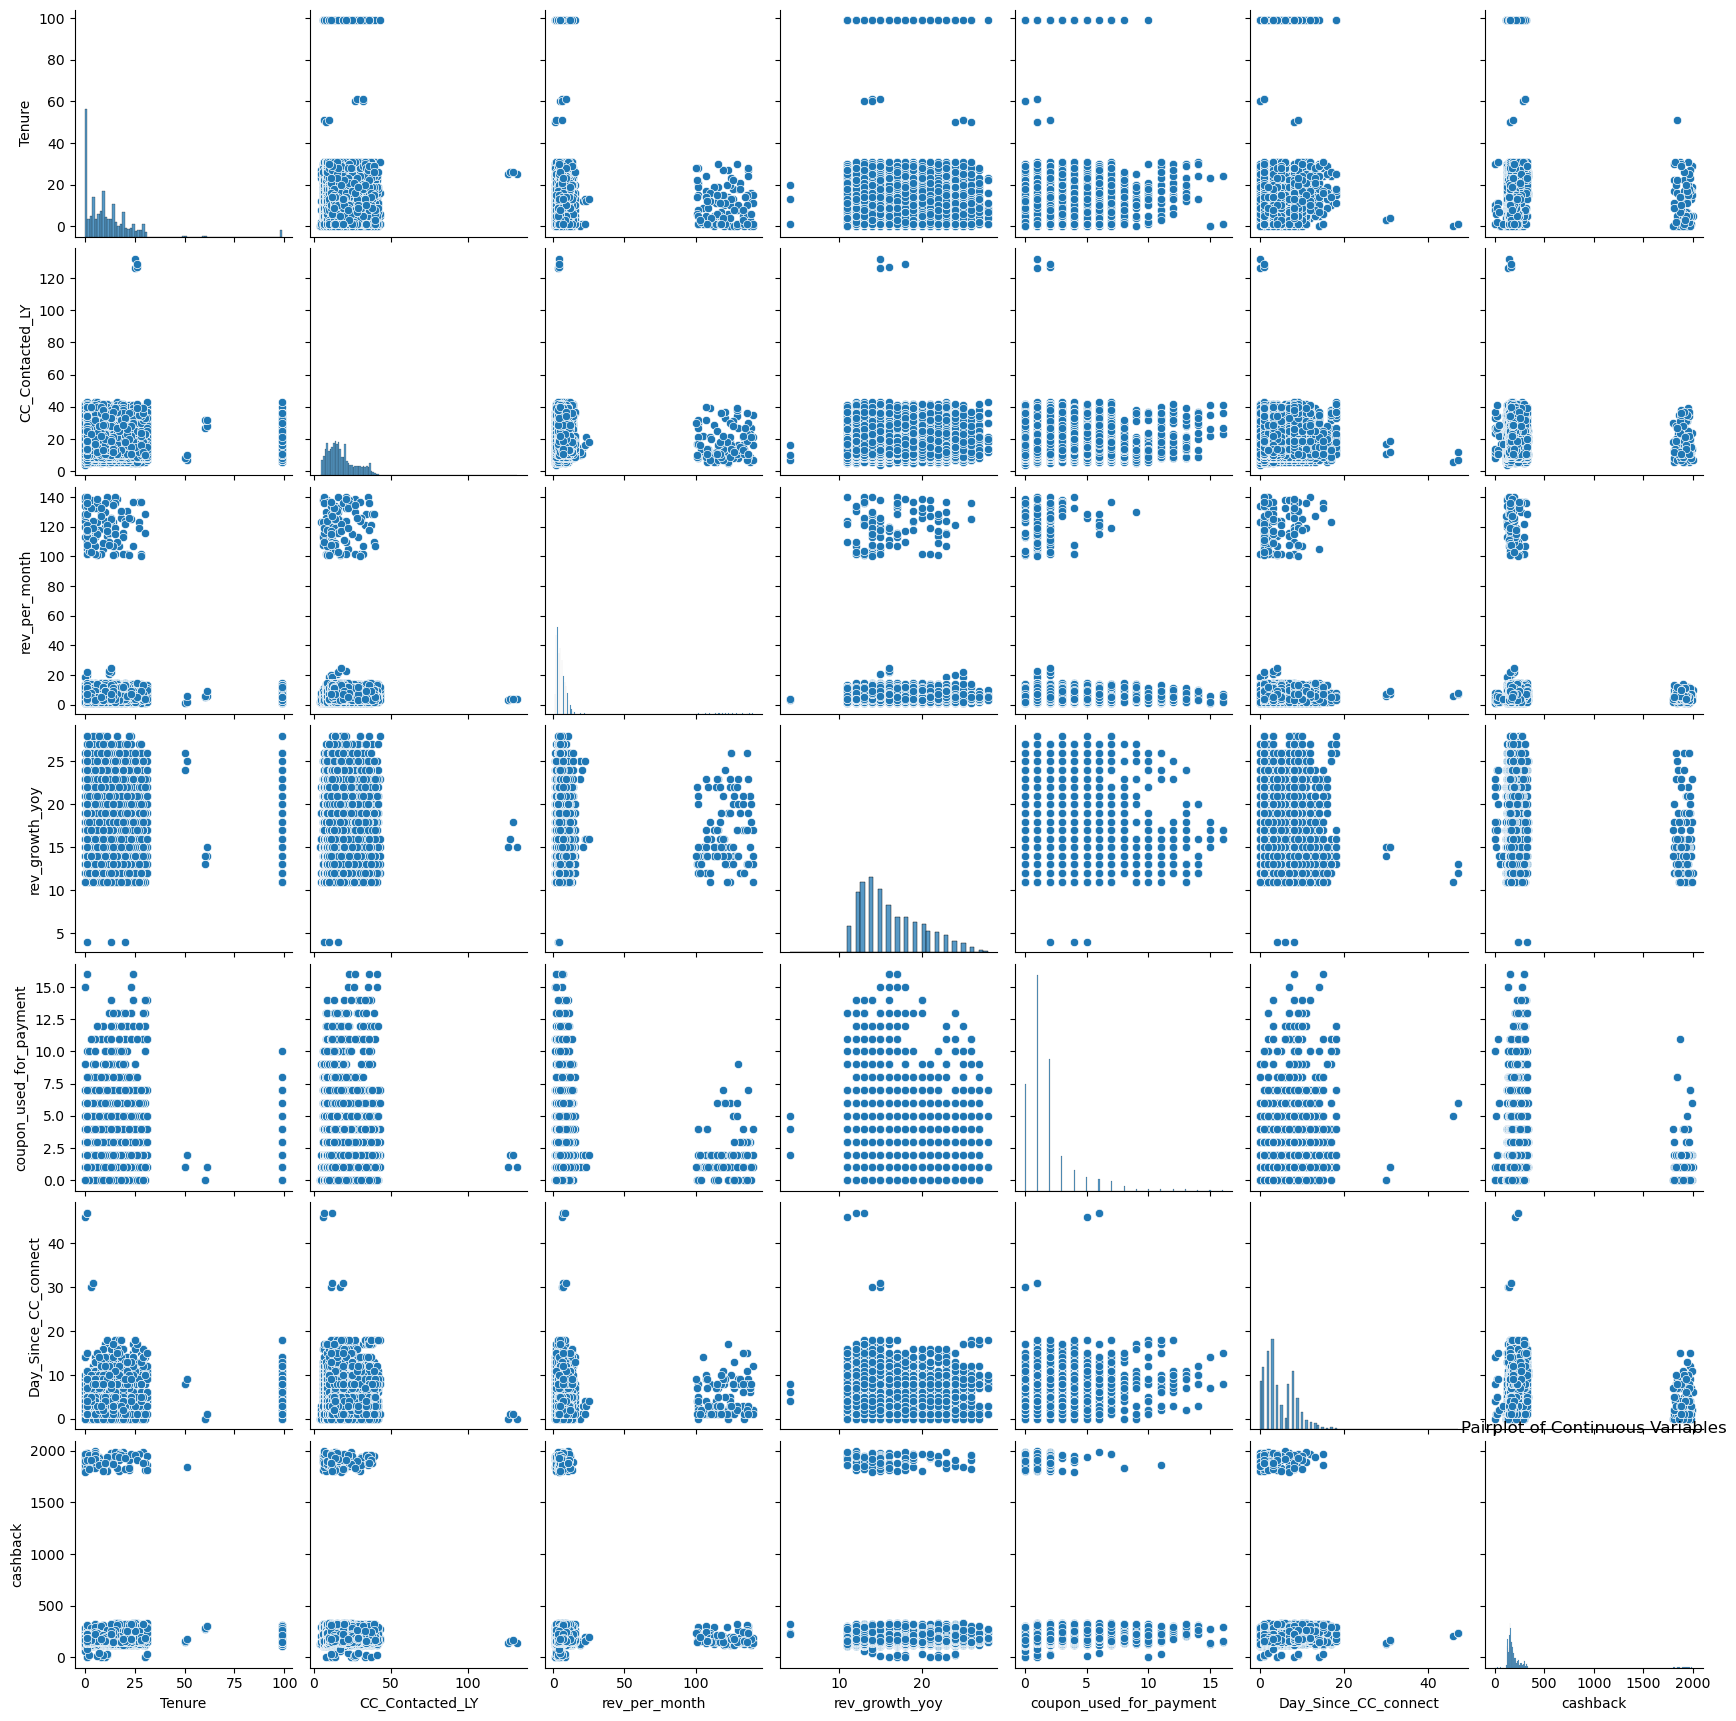

In [39]:
# Pairplot for continuous variables
sns.pairplot(df[num_cols])
plt.title('Pairplot of Continuous Variables')
plt.show()

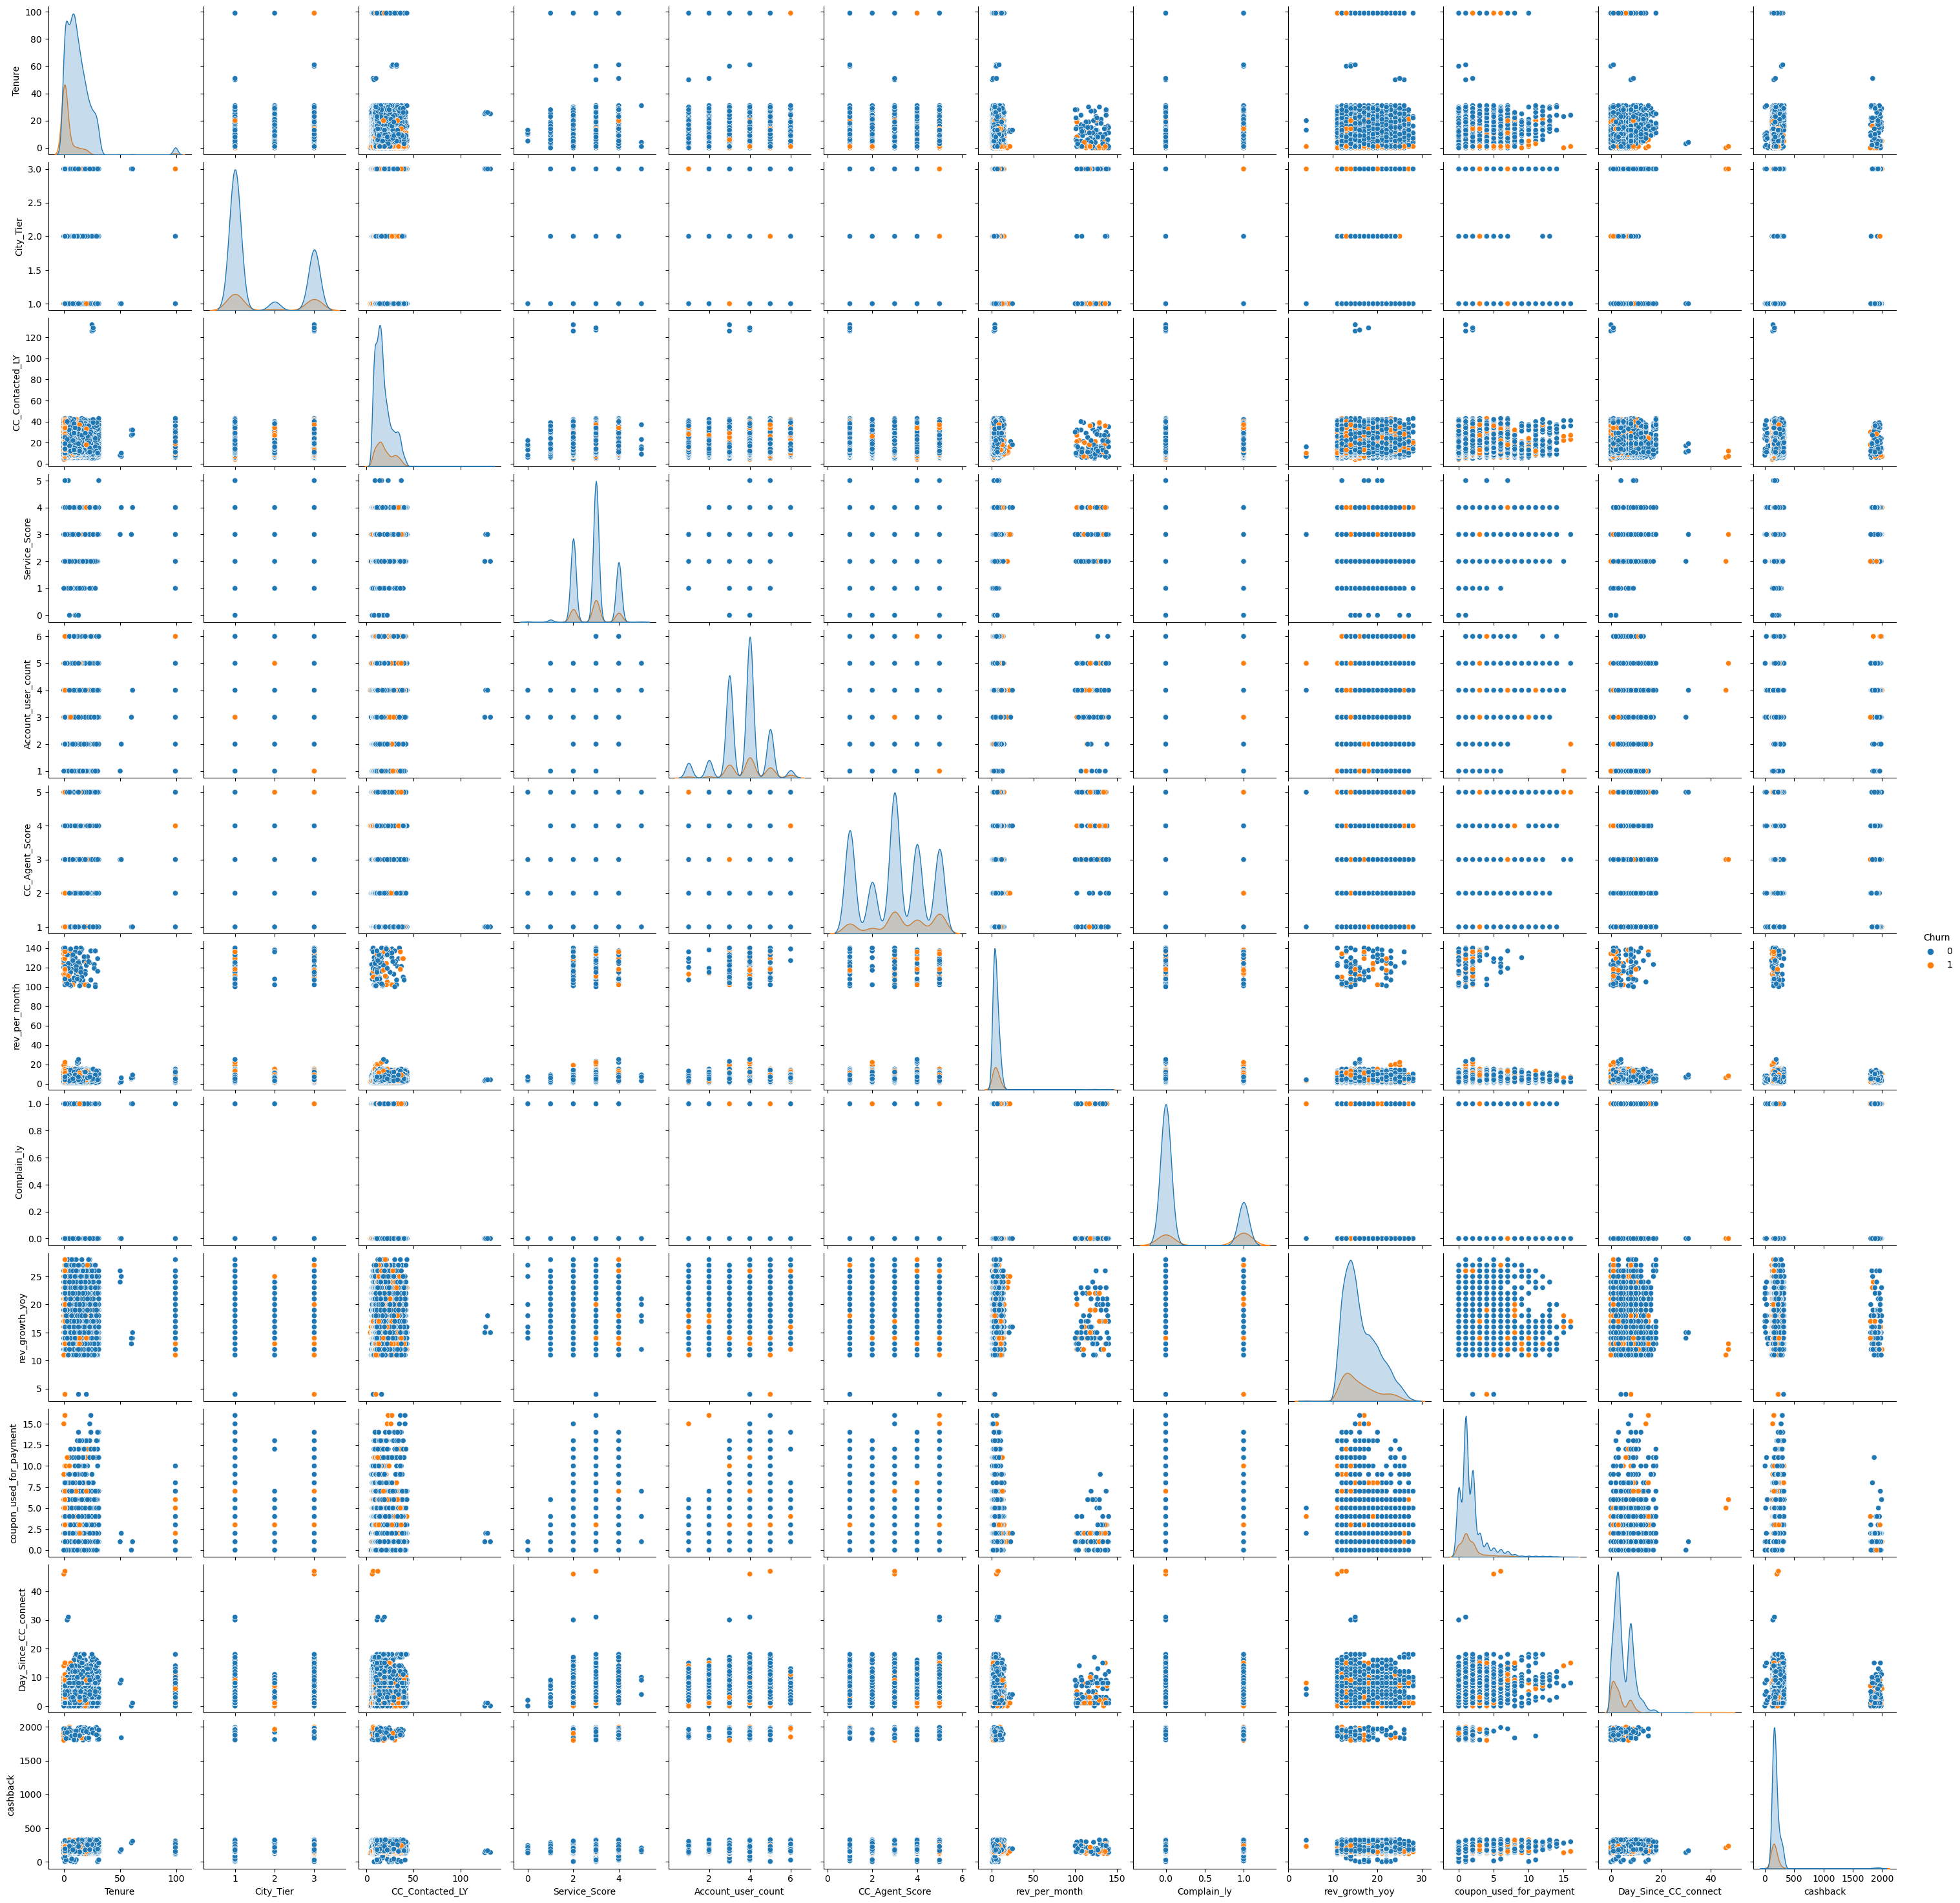

In [40]:
sns.pairplot(df,hue='Churn');

In [41]:
# Fill missing values for numerical columns with the median
numerical_cols = ['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [42]:
df.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               760
dtype: int64

In [43]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6704
Female    4448
Name: Gender, dtype: int64


account_segment
Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64


Marital_Status
Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64


Login_device
Mobile      7482
Computer    3018
Name: Login_device, dtype: int64




In [44]:
# Fill missing values for categorical columns with the mode
categorical_cols = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [45]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [46]:
df.head(15)

Churn  Tenure  City_Tier  CC_Contacted_LY           Payment  Gender  \
0       1     4.0        3.0              6.0        Debit Card  Female   
1       1     0.0        1.0              8.0               UPI    Male   
2       1     0.0        1.0             30.0        Debit Card    Male   
3       1     0.0        3.0             15.0        Debit Card    Male   
4       1     0.0        1.0             12.0       Credit Card    Male   
5       1     0.0        1.0             22.0        Debit Card  Female   
6       1     2.0        3.0             11.0  Cash on Delivery    Male   
7       1     0.0        1.0              6.0       Credit Card    Male   
8       1    13.0        3.0              9.0          E wallet    Male   
9       1     0.0        1.0             31.0        Debit Card    Male   
10      1     4.0        1.0             18.0  Cash on Delivery  Female   
11      1    11.0        1.0              6.0        Debit Card    Male   
12      1     9.0        1.0             11.0  Cash on Delivery    Male   
13      1     0.0        1.0             15.0       Credit Card    Male   
14      1     9.0        3.0             15.0       Credit Card    Male   

    Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0             3.0                 3.0           Super             2.0   
1             3.0                 4.0    Regular Plus             3.0   
2             2.0                 4.0    Regular Plus             3.0   
3             2.0                 4.0           Super             5.0   
4             2.0                 3.0    Regular Plus             5.0   
5             3.0                 4.0    Regular Plus             5.0   
6             2.0                 3.0           Super             2.0   
7             3.0                 3.0    Regular Plus             2.0   
8             2.0                 4.0    Regular Plus             3.0   
9             2.0                 5.0    Regular Plus             3.0   
10            2.0                 3.0         Regular             3.0   
11            3.0                 4.0             HNI             3.0   
12            2.0                 3.0    Regular Plus             3.0   
13            3.0                 4.0    Regular Plus             3.0   
14            3.0                 4.0             HNI             2.0   

   Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0          Single            9.0          1.0            11.0   
1          Single            7.0          1.0            15.0   
2          Single            6.0          1.0            14.0   
3          Single            8.0          0.0            23.0   
4          Single            3.0          0.0            11.0   
5          Single            2.0          1.0            22.0   
6        Divorced            4.0          0.0            14.0   
7        Divorced            3.0          1.0            16.0   
8        Divorced            2.0          1.0            14.0   
9          Single            2.0          0.0            12.0   
10       Divorced            2.0          0.0            12.0   
11         Single           10.0          1.0            13.0   
12         Single            2.0          1.0            13.0   
13       Divorced            1.0          1.0            17.0   
14         Single            2.0          0.0            16.0   

    coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                       1.0                   5.0    159.93       Mobile  
1                       0.0                   0.0    120.90       Mobile  
2                       0.0                   3.0    165.25       Mobile  
3                       0.0                   3.0    134.07       Mobile  
4                       1.0                   3.0    129.60       Mobile  
5                       4.0                   7.0    139.19     Computer  
6                       0.0                   0.0    120.86       Mo

###  Outlier Treatment


In [47]:
#Checking numbers of observations beyond Upper & Lower Limit
Outlier_col = ['Tenure', 'CC_Contacted_LY', 'rev_per_month',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback']
Q1 = df[Outlier_col].quantile(0.25)
Q3 = df[Outlier_col].quantile(0.75)
UL = Q3
LL = Q1
outliers = ((df[Outlier_col] > UL) | (df[Outlier_col] < LL)).sum()
print("Number of Observations Beyond Upper & Lower Limit for Each Column:")
display(outliers)

Number of Observations Beyond Upper & Lower Limit for Each Column:


Tenure                     5167
CC_Contacted_LY            5025
rev_per_month              4329
rev_growth_yoy             4043
coupon_used_for_payment    4228
Day_Since_CC_connect       5000
cashback                   5629
dtype: int64

In [48]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [49]:
# Cap & floor the values beyond the outlier boundaries
for i in Outlier_col:
    LL,UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL,UL,df[i])
    df[i] = np.where(df[i] < LL,LL,df[i])

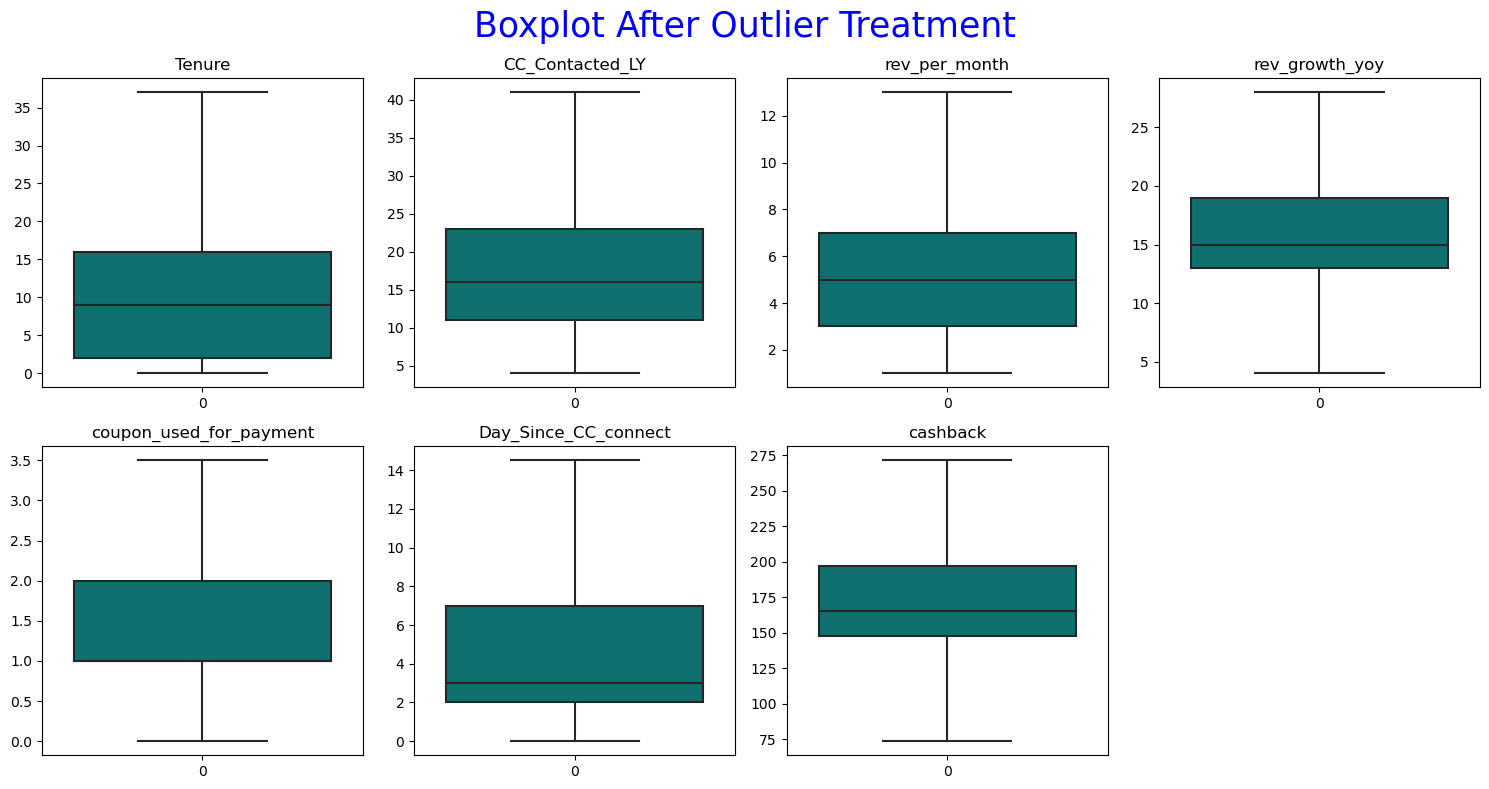

In [50]:
fig=plt.figure(figsize=(15,8))
plt.suptitle('Boxplot After Outlier Treatment', fontsize = 25,color='blue')
for i in range(0,len(Outlier_col)):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[Outlier_col[i]],color='teal')
    plt.title(Outlier_col[i])
fig.tight_layout()
plt.show()

In [51]:
# Define the function to categorize Tenure
def categorize_tenure(tenure):
    if tenure in range(0,7):
        return 'Low tenure'
    elif tenure in range(7,24):
        return 'Medium tenure'
    elif tenure in range(24,49):
        return 'High tenure'
    elif tenure >= 49:
        return 'Very high tenure'
    else:
        return 'Unknown'

# Apply the function to the Tenure column
df['Tenure_Cat'] = df['Tenure'].apply(lambda x: categorize_tenure(x))

# Verify the new column
print(df['Tenure_Cat'].value_counts())

Medium tenure    5608
Low tenure       4515
High tenure      1137
Name: Tenure_Cat, dtype: int64


In [52]:
print(df[['Tenure', 'Tenure_Cat']].head(15))

    Tenure     Tenure_Cat
0      4.0     Low tenure
1      0.0     Low tenure
2      0.0     Low tenure
3      0.0     Low tenure
4      0.0     Low tenure
5      0.0     Low tenure
6      2.0     Low tenure
7      0.0     Low tenure
8     13.0  Medium tenure
9      0.0     Low tenure
10     4.0     Low tenure
11    11.0  Medium tenure
12     9.0  Medium tenure
13     0.0     Low tenure
14     9.0  Medium tenure


In [53]:
def categorize_cc_contacted_LY(value):
    if value in [126, 127, 129, 132]:
        return 'Special Cases'
    elif value in range(0, 11):
        return 'Low Contact'
    elif value in range(11, 21):
        return 'Medium Contact'
    elif value >= 21:
        return 'High Contact'
    else:
        return 'Unknown'

df['CC_Contacted_LY_cat'] = df['CC_Contacted_LY'].apply(categorize_cc_contacted_LY)

In [54]:
print(df[['CC_Contacted_LY', 'CC_Contacted_LY_cat']].head(15))

    CC_Contacted_LY CC_Contacted_LY_cat
0               6.0         Low Contact
1               8.0         Low Contact
2              30.0        High Contact
3              15.0      Medium Contact
4              12.0      Medium Contact
5              22.0        High Contact
6              11.0      Medium Contact
7               6.0         Low Contact
8               9.0         Low Contact
9              31.0        High Contact
10             18.0      Medium Contact
11              6.0         Low Contact
12             11.0      Medium Contact
13             15.0      Medium Contact
14             15.0      Medium Contact


In [55]:
print(df['CC_Contacted_LY_cat'].value_counts())

Medium Contact    5402
High Contact      3465
Low Contact       2393
Name: CC_Contacted_LY_cat, dtype: int64


In [56]:
# Define the function to categorize rev_per_month
def categorize_revenue(revenue):
    if revenue >= 1 and revenue <= 5:
        return 'Low Revenue'
    elif revenue >= 6 and revenue <= 10:
        return 'Medium Revenue'
    elif revenue >= 11 and revenue <= 20:
        return 'High Revenue'
    else:
        return 'Unknown'

# Apply the function to the rev_per_month column
df['Revenue_Cat'] = df['rev_per_month'].apply(lambda x: categorize_revenue(x))

# Verify the new column
print(df['Revenue_Cat'].value_counts())

Low Revenue       7079
Medium Revenue    3459
High Revenue       722
Name: Revenue_Cat, dtype: int64


In [57]:
# Define the function to categorize the days
def categorize_days(days):
    if pd.isna(days):
        return 'Unknown'
    elif days <= 10:
        return ' Recent'
    elif days <= 15:
        return 'Moderate'
    else:
        return 'Old'

# Apply the function to create a new column
df['CC_connect_category'] = df['Day_Since_CC_connect'].apply(categorize_days)

# Print the new column to verify
print(df[['Day_Since_CC_connect', 'CC_connect_category']].head())

print(df['CC_connect_category'].value_counts())

   Day_Since_CC_connect CC_connect_category
0                   5.0              Recent
1                   0.0              Recent
2                   3.0              Recent
3                   3.0              Recent
4                   3.0              Recent
 Recent     10610
Moderate      650
Name: CC_connect_category, dtype: int64


In [58]:
# Define the function to categorize the cashback values
def categorize_cashback(value):
    if pd.isna(value):
        return 'Unknown'
    elif value <= 100:
        return 'Low'
    elif value <= 200:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['cashback_category'] = df['cashback'].apply(categorize_cashback)

# Print the new column to verify
print(df[['cashback', 'cashback_category']].head())

print(df['cashback_category'].value_counts())

   cashback cashback_category
0    159.93            Medium
1    120.90            Medium
2    165.25            Medium
3    134.07            Medium
4    129.60            Medium
Medium    8541
High      2697
Low         22
Name: cashback_category, dtype: int64


In [59]:
df.head()

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0        3.0              6.0   Debit Card  Female   
1      1     0.0        1.0              8.0          UPI    Male   
2      1     0.0        1.0             30.0   Debit Card    Male   
3      1     0.0        3.0             15.0   Debit Card    Male   
4      1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  ...  \
0            3.0                 3.0           Super             2.0  ...   
1            3.0                 4.0    Regular Plus             3.0  ...   
2            2.0                 4.0    Regular Plus             3.0  ...   
3            2.0                 4.0           Super             5.0  ...   
4            2.0                 3.0    Regular Plus             5.0  ...   

  rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  cashback  \
0           11.0                      1.0                   5.0    159.93   
1           15.0                      0.0                   0.0    120.90   
2           14.0                      0.0                   3.0    165.25   
3           23.0                      0.0                   3.0    134.07   
4           11.0                      1.0                   3.0    129.60   

   Login_device  Tenure_Cat  CC_Contacted_LY_cat     Revenue_Cat  \
0        Mobile  Low tenure          Low Contact  Medium Revenue   
1        Mobile  Low tenure          Low Contact  Medium Revenue   
2        Mobile  Low tenure         High Contact  Medium Revenue   
3        Mobile  Low tenure       Medium Contact  Medium Revenue   
4        Mobile  Low tenure       Medium Contact     Low Revenue   

  CC_connect_category cashback_category  
0              Recent            Medium  
1              Recent            Medium  
2              Recent            Medium  
3              Recent            Medium  
4              Recent            Medium  

[5 rows x 23 columns]

In [60]:
# List of old columns to drop
columns_to_drop = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback']

# Drop the old columns
df_new = df.drop(columns=columns_to_drop)

# Display the new dataframe
print(df_new.head())

   Churn  City_Tier      Payment  Gender  Service_Score  Account_user_count  \
0      1        3.0   Debit Card  Female            3.0                 3.0   
1      1        1.0          UPI    Male            3.0                 4.0   
2      1        1.0   Debit Card    Male            2.0                 4.0   
3      1        3.0   Debit Card    Male            2.0                 4.0   
4      1        1.0  Credit Card    Male            2.0                 3.0   

  account_segment  CC_Agent_Score Marital_Status  Complain_ly  rev_growth_yoy  \
0           Super             2.0         Single          1.0            11.0   
1    Regular Plus             3.0         Single          1.0            15.0   
2    Regular Plus             3.0         Single          1.0            14.0   
3           Super             5.0         Single          0.0            23.0   
4    Regular Plus             5.0         Single          0.0            11.0   

   coupon_used_for_payment Login_devic

In [61]:
df_new.head()

Churn  City_Tier      Payment  Gender  Service_Score  Account_user_count  \
0      1        3.0   Debit Card  Female            3.0                 3.0   
1      1        1.0          UPI    Male            3.0                 4.0   
2      1        1.0   Debit Card    Male            2.0                 4.0   
3      1        3.0   Debit Card    Male            2.0                 4.0   
4      1        1.0  Credit Card    Male            2.0                 3.0   

  account_segment  CC_Agent_Score Marital_Status  Complain_ly  rev_growth_yoy  \
0           Super             2.0         Single          1.0            11.0   
1    Regular Plus             3.0         Single          1.0            15.0   
2    Regular Plus             3.0         Single          1.0            14.0   
3           Super             5.0         Single          0.0            23.0   
4    Regular Plus             5.0         Single          0.0            11.0   

   coupon_used_for_payment Login_device  Tenure_Cat CC_Contacted_LY_cat  \
0                      1.0       Mobile  Low tenure         Low Contact   
1                      0.0       Mobile  Low tenure         Low Contact   
2                      0.0       Mobile  Low tenure        High Contact   
3                      0.0       Mobile  Low tenure      Medium Contact   
4                      1.0       Mobile  Low tenure      Medium Contact   

      Revenue_Cat CC_connect_category cashback_category  
0  Medium Revenue              Recent            Medium  
1  Medium Revenue              Recent            Medium  
2  Medium Revenue              Recent            Medium  
3  Medium Revenue              Recent            Medium  
4     Low Revenue              Recent            Medium

# Data Visualization using Segmentation

Let's Segment the data based on City Tiers, Payment Mode and Genders Respectively and will Draw useful insights if any

### Segmenting on the basis of City Tiers

There are 3 city tiers mentioned in the dataset. Generally, tier 1 cities are considered as the major metro cities where the people tend to use more DTH Services. So, accordingly, can we say that tier 1 city customers tends to generate more avg revenue as compared to tier 2 and tier 3 city customers.Let's visualize this and find if it's True or not?

In [62]:
df_citytier = df_new[['City_Tier','Payment','Revenue_Cat','Churn']]

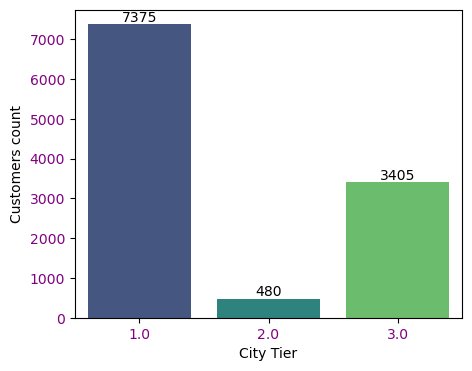

In [63]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='City_Tier',data=df_citytier,palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel("Customers count",fontsize = 10)
plt.xlabel('City Tier',fontsize = 10)
plt.xticks(color='purple')
plt.yticks(color='purple');
plt.show()

* Count of customers are more in Tier-1 followed by Tier-3.
* Very less customers belongs to Tier-2.

**City Tier Vs Monthly Average Revenue**


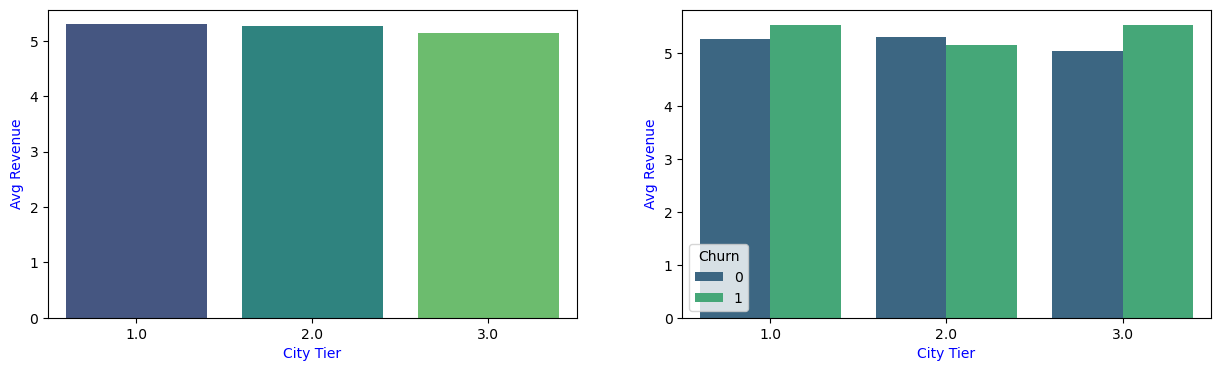

In [64]:
fig,axes = plt.subplots(1,2)
fig.set_size_inches(15,4)
ax=sns.barplot(x='City_Tier',y='rev_per_month',data=df,errorbar=('ci', False),ax=axes[0],palette='viridis')
ax.set_xlabel('City Tier',fontsize = 10,color='blue')
#ax.set_xticks(color='purple')
ax.set_ylabel('Avg Revenue',color='blue')
ax=sns.barplot(x='City_Tier',y='rev_per_month',data=df,hue='Churn',errorbar=('ci', False),ax=axes[1],palette='viridis')
ax.set_xlabel('City Tier',fontsize = 10,color='blue')
#ax.set_xticks(color='purple')
ax.set_ylabel('Avg Revenue',color='blue')

plt.show()

* We can see that Avg Revenue Generation is almost same across all the City Tiers.
* Though the Customers using the Services in Tier-2 is very less as compared to Tier-1 & 3, But the Avg Revenue generated per month by the account is same across all the Tiers.
* It seems Customers are more satisfied in Tier-2 hence they Retain to use the Services, generating greater revenue.

### Payment Mode

 There are different payment modes (CC, DC, COD, E-wallet & UPI). Depending on the city tiers, Let's Visualize and find the preferred payment modes used by the customers

In [65]:
pd.crosstab(df_citytier['City_Tier'],df_citytier['Payment'])

Payment    Cash on Delivery  Credit Card  Debit Card  E wallet  UPI
City_Tier                                                          
1.0                     732         2740        3407        12  484
2.0                      31          100         123         0  226
3.0                     251          671        1166      1205  112

In [66]:
print("Tier-1 : ",len(df[df['City_Tier']==1]))
print("Tier-2 : ",len(df[df['City_Tier']==2]))
print("Tier-3 : ",len(df[df['City_Tier']==3]))

Tier-1 :  7375
Tier-2 :  480
Tier-3 :  3405


In [67]:
print(np.round(3407/7375*100,2),"% of customers prefer Debit card as preferred payment mode in Tier 1 cities.")
print(np.round(226/480*100,2),"% of customers prefer UPI as preferred payment mode in Tier 2 cities.")
print(np.round(1205/3405*100,2),"% of customers prefer E wallet as preferred payment mode in Tier 3 cities.")

46.2 % of customers prefer Debit card as preferred payment mode in Tier 1 cities.
47.08 % of customers prefer UPI as preferred payment mode in Tier 2 cities.
35.39 % of customers prefer E wallet as preferred payment mode in Tier 3 cities.


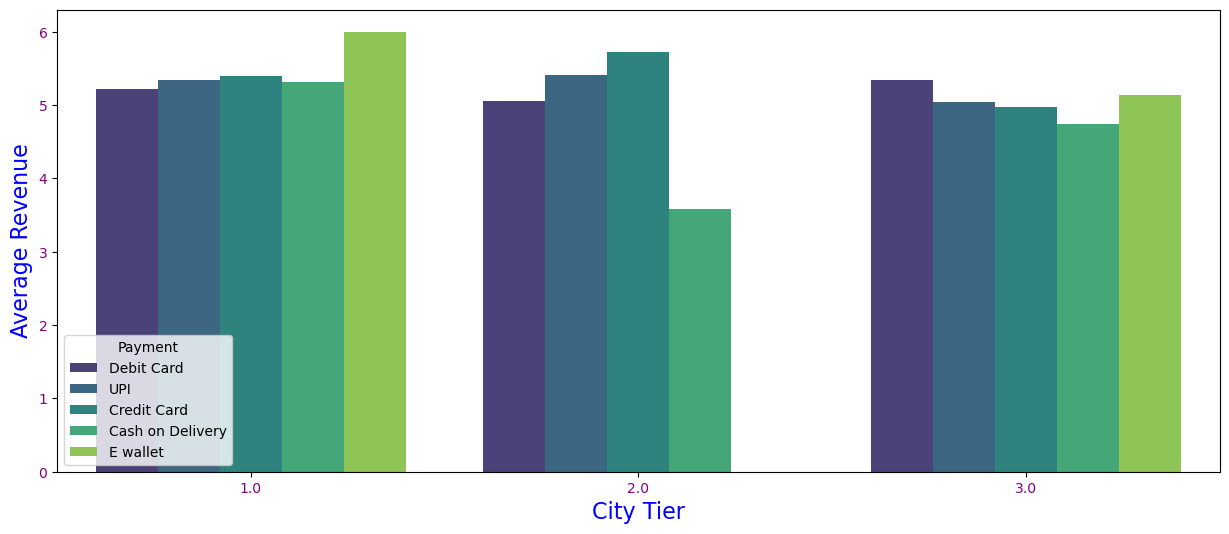

In [68]:
plt.figure(figsize=(15,6))                                                                                              
sns.barplot(x = df['City_Tier'],y = df['rev_per_month'],hue = df['Payment'],errorbar=('ci', False),palette='viridis')
plt.ylabel("Average Revenue",fontsize = 16,color='blue')
plt.xlabel('City Tier',fontsize = 16,color='blue')
plt.xticks(color='purple')
plt.yticks(color='purple');

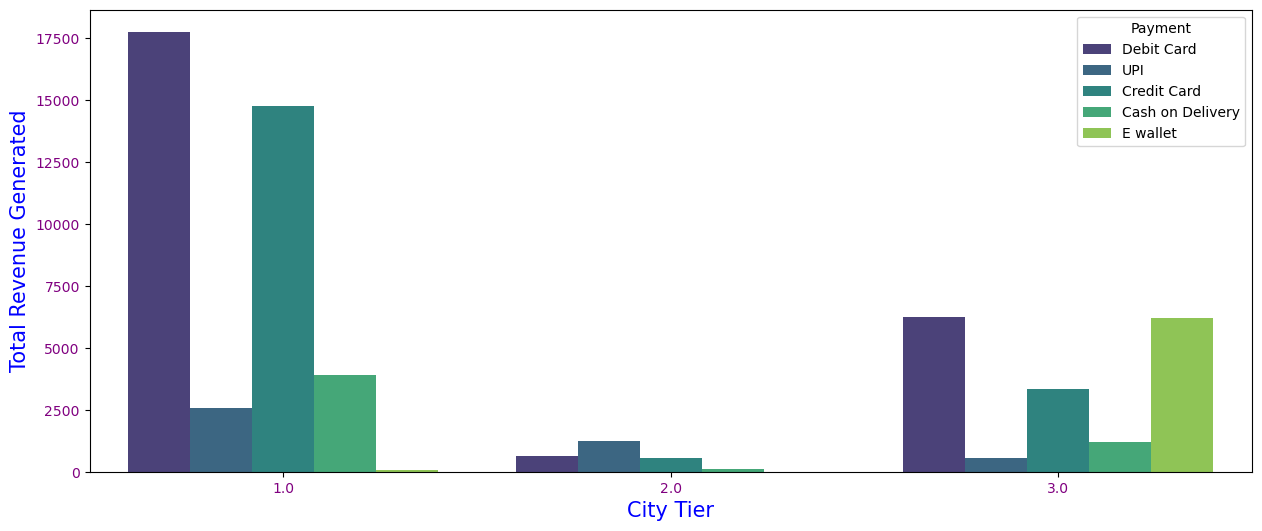

In [69]:
plt.figure(figsize=(15,6))
sns.barplot(x = df_citytier['City_Tier'],y = df['rev_per_month'],hue = df_citytier['Payment'],estimator=sum,errorbar=('ci', False),palette='viridis')
plt.ylabel("Total Revenue Generated",fontsize = 15,color='blue')
plt.xlabel('City Tier',fontsize = 15,color='blue')
plt.xticks(color='purple')
plt.yticks(color='purple');
plt.show()

* As we can see, E wallet is used only by the Tier 1 & Tier 3 cities. 
* Tier-2 Customers don't prefer using E-wallet as payment mode.
* Most of the customers prefer using E wallet and Debit Card in tier 3 cities. 
* Almost 35% of the tier 3 city customers prefers E wallet as their payment mode, most revenue will be generated from such customers from tier 3 cities.

* Almost 46% of the tier 1 city customers prefers Debit Card as the payment mode, so most revenue will be generated from such customers from tier 1 cities.

* Almost 47% of the tier 2 city customers prefers UPI as the payment mode, so most revenue will be generated from such customers from tier 2 cities.

## Segmentation on the Basis of Gender

In [70]:
df_male = df[df['Gender']=='Male']
df_female = df[df['Gender']=='Female']

In [71]:
display(df_male.head())
display(df_female.head())

Churn  Tenure  City_Tier  CC_Contacted_LY           Payment Gender  \
1      1     0.0        1.0              8.0               UPI   Male   
2      1     0.0        1.0             30.0        Debit Card   Male   
3      1     0.0        3.0             15.0        Debit Card   Male   
4      1     0.0        1.0             12.0       Credit Card   Male   
6      1     2.0        3.0             11.0  Cash on Delivery   Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  ...  \
1            3.0                 4.0    Regular Plus             3.0  ...   
2            2.0                 4.0    Regular Plus             3.0  ...   
3            2.0                 4.0           Super             5.0  ...   
4            2.0                 3.0    Regular Plus             5.0  ...   
6            2.0                 3.0           Super             2.0  ...   

  rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  cashback  \
1           15.0                      0.0                   0.0    120.90   
2           14.0                      0.0                   3.0    165.25   
3           23.0                      0.0                   3.0    134.07   
4           11.0                      1.0                   3.0    129.60   
6           14.0                      0.0                   0.0    120.86   

   Login_device  Tenure_Cat  CC_Contacted_LY_cat     Revenue_Cat  \
1        Mobile  Low tenure          Low Contact  Medium Revenue   
2        Mobile  Low tenure         High Contact  Medium Revenue   
3        Mobile  Low tenure       Medium Contact  Medium Revenue   
4        Mobile  Low tenure       Medium Contact     Low Revenue   
6        Mobile  Low tenure       Medium Contact     Low Revenue   

  CC_connect_category cashback_category  
1              Recent            Medium  
2              Recent            Medium  
3              Recent            Medium  
4              Recent            Medium  
6              Recent            Medium  

[5 rows x 23 columns]

Churn  Tenure  City_Tier  CC_Contacted_LY           Payment  Gender  \
0       1     4.0        3.0              6.0        Debit Card  Female   
5       1     0.0        1.0             22.0        Debit Card  Female   
10      1     4.0        1.0             18.0  Cash on Delivery  Female   
16      1     0.0        1.0             12.0        Debit Card  Female   
19      1    19.0        1.0             20.0        Debit Card  Female   

    Service_Score  Account_user_count account_segment  CC_Agent_Score  ...  \
0             3.0                 3.0           Super             2.0  ...   
5             3.0                 4.0    Regular Plus             5.0  ...   
10            2.0                 3.0         Regular             3.0  ...   
16            3.0                 4.0    Regular Plus             2.0  ...   
19            3.0                 3.0    Regular Plus             4.0  ...   

   rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  cashback  \
0            11.0                      1.0                   5.0    159.93   
5            22.0                      3.5                   7.0    139.19   
10           12.0                      3.5                   8.0    271.44   
16           18.0                      1.0                   0.0    129.26   
19           18.0                      1.0                   3.0    149.63   

    Login_device     Tenure_Cat  CC_Contacted_LY_cat     Revenue_Cat  \
0         Mobile     Low tenure          Low Contact  Medium Revenue   
5       Computer     Low tenure         High Contact     Low Revenue   
10        Mobile     Low tenure       Medium Contact     Low Revenue   
16      Computer     Low tenure       Medium Contact     Low Revenue   
19        Mobile  Medium tenure       Medium Contact     Low Revenue   

   CC_connect_category cashback_category  
0               Recent            Medium  
5               Recent            Medium  
10              Recent              High  
16              Recent            Medium  
19              Recent            Medium  

[5 rows x 23 columns]

In [72]:
print("Male Count : ",df_male.Gender.count())
print("Female Count : ",df_female.Gender.count())

Male Count :  6812
Female Count :  4448


<Figure size 1500x1500 with 0 Axes>

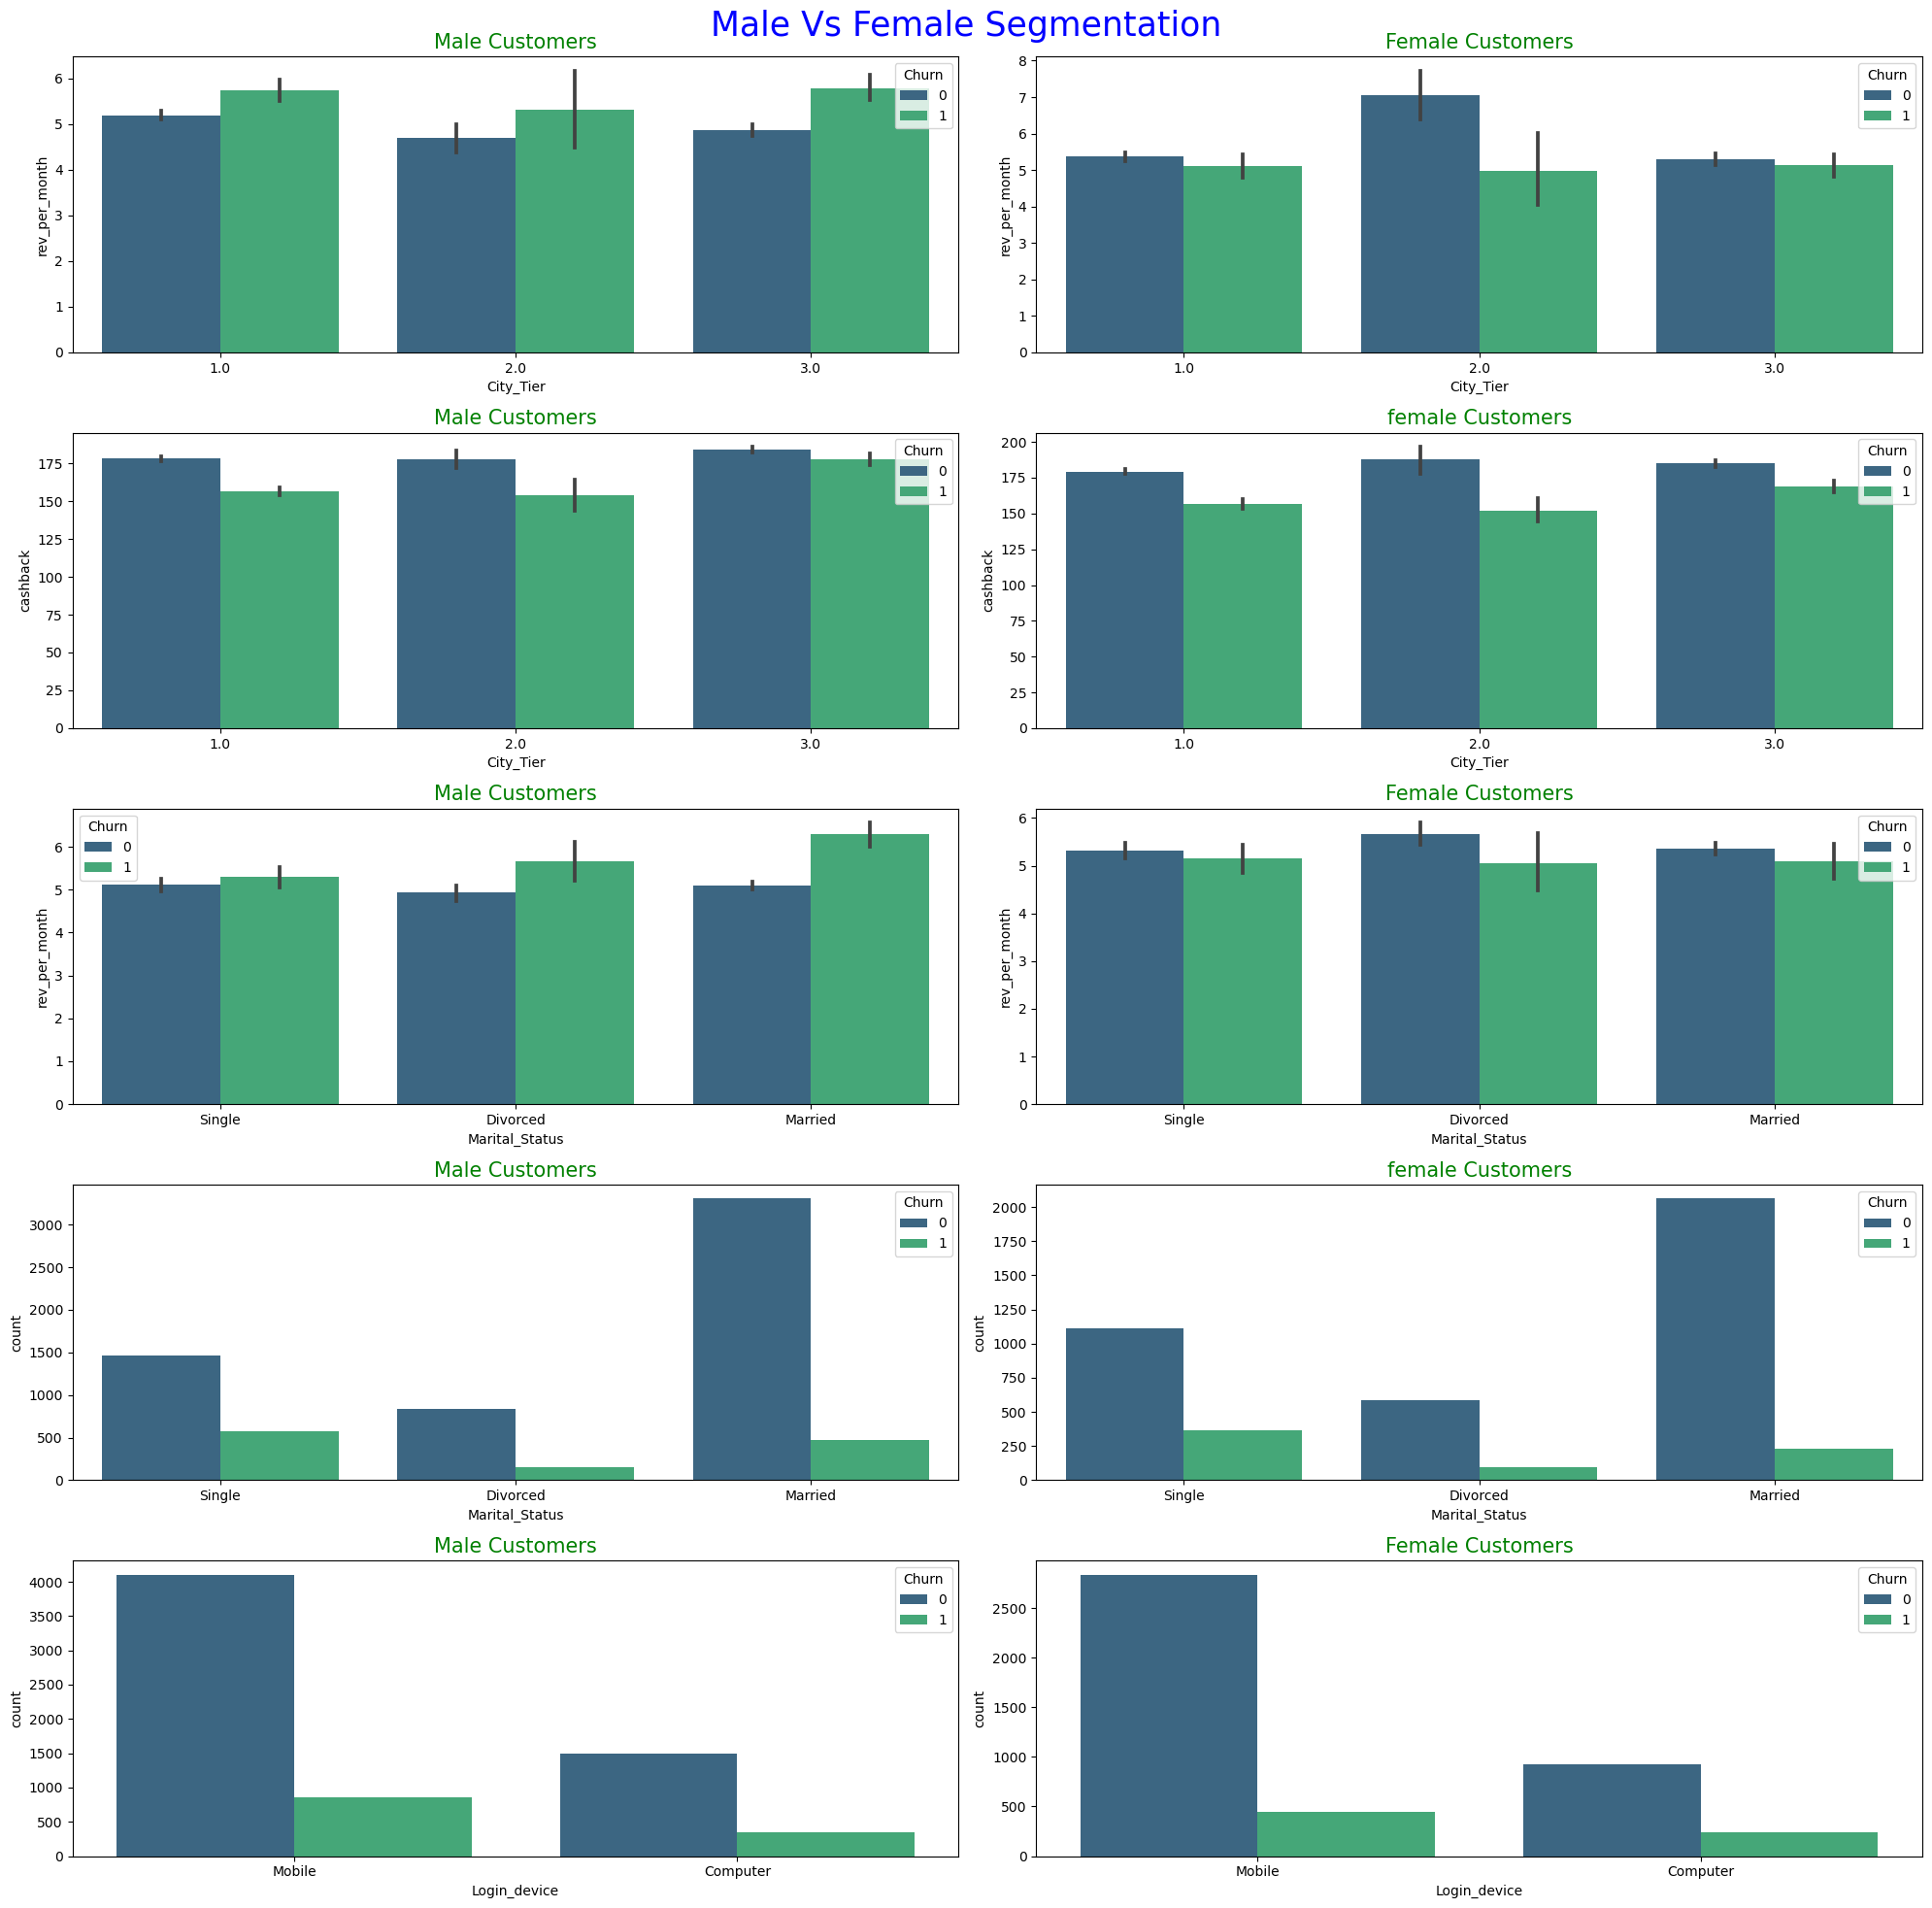

In [73]:
plt.figure(figsize=(15,15))
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,20)

plt.suptitle('Male Vs Female Segmentation', fontsize = 25,color='blue')

ax=sns.barplot(data=df_male,x='City_Tier',y='rev_per_month',hue='Churn',ax=axes[0][0],palette='viridis') 
ax.set_title("Male Customers",color='green',fontsize=15)
ax=sns.barplot(data=df_female,x='City_Tier',y='rev_per_month',hue='Churn',ax=axes[0][1],palette='viridis') 
ax.set_title("Female Customers",color='green',fontsize=15)
ax=sns.barplot(data=df_male,x='City_Tier',y='cashback',hue='Churn',ax=axes[1][0],palette='viridis')
ax.set_title("Male Customers",color='green',fontsize=15)
ax=sns.barplot(data=df_female,x='City_Tier',y='cashback',hue='Churn',ax=axes[1][1],palette='viridis')
ax.set_title("female Customers",color='green',fontsize=15)
ax=sns.barplot(data=df_male,x='Marital_Status',y='rev_per_month',hue='Churn',ax=axes[2][0],palette='viridis')
ax.set_title("Male Customers",color='green',fontsize=15)
ax=sns.barplot(data=df_female,x='Marital_Status',y='rev_per_month',hue='Churn',ax=axes[2][1],palette='viridis')
ax.set_title("Female Customers",color='green',fontsize=15)
#ax=sns.barplot(data=df_male,x='Marital_Status',y='cashback',hue='Churn',ax=axes[3][0],palette='rainbow')
ax=sns.countplot(data=df_male,x='Marital_Status',hue='Churn',ax=axes[3][0],palette='viridis')
ax.set_title("Male Customers",color='green',fontsize=15)
ax=sns.countplot(data=df_female,x='Marital_Status',hue='Churn',ax=axes[3][1],palette='viridis')
ax.set_title("female Customers",color='green',fontsize=15)
#ax=sns.barplot(data=df_male,x='Login_device',y='rev_per_month',hue='Churn',ax=axes[4][0],palette='rainbow')
ax=sns.countplot(data=df_male,x='Login_device',hue='Churn',ax=axes[4][0],palette='viridis')
ax.set_title("Male Customers",color='green',fontsize=15)
#ax=sns.barplot(data=df_female,x='Login_device',y='rev_per_month',hue='Churn',ax=axes[4][1],palette='rainbow')
ax=sns.countplot(data=df_female,x='Login_device',hue='Churn',ax=axes[4][1],palette='viridis')
ax.set_title("Female Customers",color='green',fontsize=15)
#ax=sns.barplot(data=df_male,x='Login_device',y='cashback',hue='Churn',ax=axes[5][0],palette='rainbow')
#ax.set_title("Male Customers",color='green',fontsize=15)
#ax=sns.barplot(data=df_female,x='Login_device',y='cashback',hue='Churn',ax=axes[5][1],palette='rainbow')
#ax.set_title("Female Customers",color='green',fontsize=15)
fig.tight_layout()
plt.show()

* In Tier-1 & Tier-2, avg monthly revenue is more generated by Male customer than Females and in Tier-3 by Females.
* Cashback ratio is same for male & female in all Tier and across Marital status.
* Avg revenue generated by Singles Male and Females are almost same in all Tiers.
* Revenue generated by Divorced Females are slightly more than male.
* Count of Marital status is same across Genders.
* Mobile is the most preffered Login device among Male and Females.

In [74]:
#checking if the data is balanced or not
df_new.groupby(["Churn"]).count()

City_Tier  Payment  Gender  Service_Score  Account_user_count  \
Churn                                                                  
0           9364     9364    9364           9364                9364   
1           1896     1896    1896           1896                1896   

       account_segment  CC_Agent_Score  Marital_Status  Complain_ly  \
Churn                                                                 
0                 9364            9364            9364         9364   
1                 1896            1896            1896         1896   

       rev_growth_yoy  coupon_used_for_payment  Login_device  Tenure_Cat  \
Churn                                                                      
0                9364                     9364          9364        9364   
1                1896                     1896          1896        1896   

       CC_Contacted_LY_cat  Revenue_Cat  CC_connect_category  \
Churn                                                          
0                     9364         9364                 9364   
1                     1896         1896                 1896   

       cashback_category  
Churn                     
0                   9364  
1                   1896

In [75]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   City_Tier                11260 non-null  float64
 2   Payment                  11260 non-null  object 
 3   Gender                   11260 non-null  object 
 4   Service_Score            11260 non-null  float64
 5   Account_user_count       11260 non-null  float64
 6   account_segment          11260 non-null  object 
 7   CC_Agent_Score           11260 non-null  float64
 8   Marital_Status           11260 non-null  object 
 9   Complain_ly              11260 non-null  float64
 10  rev_growth_yoy           11260 non-null  float64
 11  coupon_used_for_payment  11260 non-null  float64
 12  Login_device             11260 non-null  object 
 13  Tenure_Cat               11260 non-null  object 
 14  CC_Contacted_LY_cat   

## Data Encoding

Apply Encoding to Categorical Variables:

- Tenure_Cat
- CC_Contacted_LY_cat
- Revenue_Cat
- CC_connect_category
- cashback_category

Label Encoding:

Suitable for ordinal categorical variables where the order matters.
Example: If you have an ordinal feature like Tenure_Cat (e.g., 'Low', 'Medium', 'High'), label encoding might make sense. However, you should use it carefully, as it implies a rank order that may not be appropriate for all models.

In [76]:
df_encoded = df_new.copy()

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
cat_cols = ['Gender','Payment', 'Login_device', 'account_segment', 'Marital_Status', 'Tenure_Cat', 'CC_Contacted_LY_cat', 'Revenue_Cat', 'CC_connect_category', 'cashback_category']
cat_cols

['Gender',
 'Payment',
 'Login_device',
 'account_segment',
 'Marital_Status',
 'Tenure_Cat',
 'CC_Contacted_LY_cat',
 'Revenue_Cat',
 'CC_connect_category',
 'cashback_category']

In [79]:
label_enc = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

In [80]:
df_encoded.head()

Churn  City_Tier  Payment  Gender  Service_Score  Account_user_count  \
0      1        3.0        2       0            3.0                 3.0   
1      1        1.0        4       1            3.0                 4.0   
2      1        1.0        2       1            2.0                 4.0   
3      1        3.0        2       1            2.0                 4.0   
4      1        1.0        1       1            2.0                 3.0   

   account_segment  CC_Agent_Score  Marital_Status  Complain_ly  \
0                3             2.0               2          1.0   
1                2             3.0               2          1.0   
2                2             3.0               2          1.0   
3                3             5.0               2          0.0   
4                2             5.0               2          0.0   

   rev_growth_yoy  coupon_used_for_payment  Login_device  Tenure_Cat  \
0            11.0                      1.0             1           1   
1            15.0                      0.0             1           1   
2            14.0                      0.0             1           1   
3            23.0                      0.0             1           1   
4            11.0                      1.0             1           1   

   CC_Contacted_LY_cat  Revenue_Cat  CC_connect_category  cashback_category  
0                    1            2                    0                  2  
1                    1            2                    0                  2  
2                    0            2                    0                  2  
3                    2            2                    0                  2  
4                    2            1                    0                  2

In [81]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   City_Tier                11260 non-null  float64
 2   Payment                  11260 non-null  int64  
 3   Gender                   11260 non-null  int64  
 4   Service_Score            11260 non-null  float64
 5   Account_user_count       11260 non-null  float64
 6   account_segment          11260 non-null  int64  
 7   CC_Agent_Score           11260 non-null  float64
 8   Marital_Status           11260 non-null  int64  
 9   Complain_ly              11260 non-null  float64
 10  rev_growth_yoy           11260 non-null  float64
 11  coupon_used_for_payment  11260 non-null  float64
 12  Login_device             11260 non-null  int64  
 13  Tenure_Cat               11260 non-null  int64  
 14  CC_Contacted_LY_cat   

## Scaling the Data using MinMax Scaler

In [82]:
from sklearn.preprocessing import MinMaxScaler


In [83]:
#Initialize MinMaxScaler
scaler = MinMaxScaler()

In [84]:
num1_cols=['rev_growth_yoy','coupon_used_for_payment','Account_user_count','Service_Score','CC_Agent_Score']

In [85]:
# Apply MinMaxScaler Only to Numerical Features
df_encoded[num1_cols] = scaler.fit_transform(df_encoded[num1_cols])

In [86]:
# The DataFrame df_encoded now has both scaled numerical features and encoded categorical features
df_encoded.head()

Churn  City_Tier  Payment  Gender  Service_Score  Account_user_count  \
0      1        3.0        2       0            0.6                 0.4   
1      1        1.0        4       1            0.6                 0.6   
2      1        1.0        2       1            0.4                 0.6   
3      1        3.0        2       1            0.4                 0.6   
4      1        1.0        1       1            0.4                 0.4   

   account_segment  CC_Agent_Score  Marital_Status  Complain_ly  \
0                3            0.25               2          1.0   
1                2            0.50               2          1.0   
2                2            0.50               2          1.0   
3                3            1.00               2          0.0   
4                2            1.00               2          0.0   

   rev_growth_yoy  coupon_used_for_payment  Login_device  Tenure_Cat  \
0        0.291667                 0.285714             1           1   
1        0.458333                 0.000000             1           1   
2        0.416667                 0.000000             1           1   
3        0.791667                 0.000000             1           1   
4        0.291667                 0.285714             1           1   

   CC_Contacted_LY_cat  Revenue_Cat  CC_connect_category  cashback_category  
0                    1            2                    0                  2  
1                    1            2                    0                  2  
2                    0            2                    0                  2  
3                    2            2                    0                  2  
4                    2            1                    0                  2

In [87]:
df_scaled=df_encoded.copy()
df_scaled_clust=df_encoded.copy()

## Clustering

In [88]:
from sklearn.cluster import KMeans 

In [89]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled_clust)
    wss.append(round(KM.inertia_,2))

In [90]:
wss

[77760.87,
 64899.13,
 56677.4,
 52650.15,
 49516.16,
 46011.51,
 43816.48,
 42760.86,
 41322.34,
 40393.79]

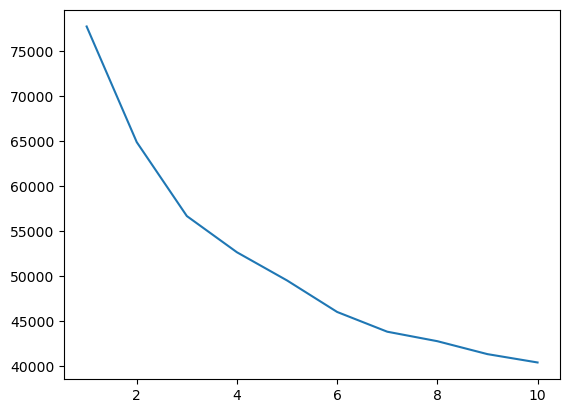

In [91]:
plt.plot(range(1,11), wss)

In [92]:
a=[1,2,3,4,5,6,7,8,9,10]

<Axes: >

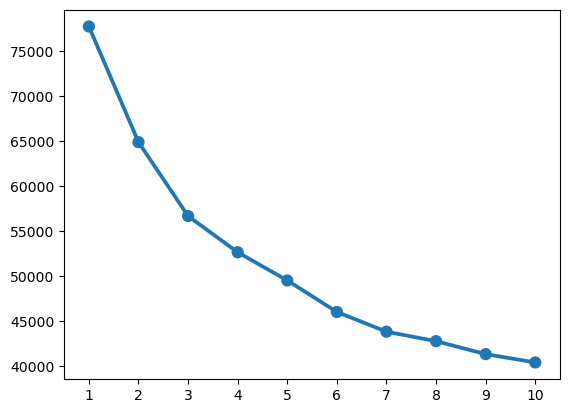

In [93]:
sns.pointplot(x=a, y=wss)

In [94]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled_clust)
labels = k_means.labels_

In [95]:
df_scaled_clust["Clus_kmeans"] = labels
df_scaled_clust.head(5)

Churn  City_Tier  Payment  Gender  Service_Score  Account_user_count  \
0      1        3.0        2       0            0.6                 0.4   
1      1        1.0        4       1            0.6                 0.6   
2      1        1.0        2       1            0.4                 0.6   
3      1        3.0        2       1            0.4                 0.6   
4      1        1.0        1       1            0.4                 0.4   

   account_segment  CC_Agent_Score  Marital_Status  Complain_ly  \
0                3            0.25               2          1.0   
1                2            0.50               2          1.0   
2                2            0.50               2          1.0   
3                3            1.00               2          0.0   
4                2            1.00               2          0.0   

   rev_growth_yoy  coupon_used_for_payment  Login_device  Tenure_Cat  \
0        0.291667                 0.285714             1           1   
1        0.458333                 0.000000             1           1   
2        0.416667                 0.000000             1           1   
3        0.791667                 0.000000             1           1   
4        0.291667                 0.285714             1           1   

   CC_Contacted_LY_cat  Revenue_Cat  CC_connect_category  cashback_category  \
0                    1            2                    0                  2   
1                    1            2                    0                  2   
2                    0            2                    0                  2   
3                    2            2                    0                  2   
4                    2            1                    0                  2   

   Clus_kmeans  
0            2  
1            2  
2            0  
3            2  
4            0

In [96]:
df_scaled_clust.groupby(["Clus_kmeans"]).count()

Churn  City_Tier  Payment  Gender  Service_Score  \
Clus_kmeans                                                     
0             5945       5945     5945    5945           5945   
1             2154       2154     2154    2154           2154   
2             3161       3161     3161    3161           3161   

             Account_user_count  account_segment  CC_Agent_Score  \
Clus_kmeans                                                        
0                          5945             5945            5945   
1                          2154             2154            2154   
2                          3161             3161            3161   

             Marital_Status  Complain_ly  rev_growth_yoy  \
Clus_kmeans                                                
0                      5945         5945            5945   
1                      2154         2154            2154   
2                      3161         3161            3161   

             coupon_used_for_payment  Login_device  Tenure_Cat  \
Clus_kmeans                                                      
0                               5945          5945        5945   
1                               2154          2154        2154   
2                               3161          3161        3161   

             CC_Contacted_LY_cat  Revenue_Cat  CC_connect_category  \
Clus_kmeans                                                          
0                           5945         5945                 5945   
1                           2154         2154                 2154   
2                           3161         3161                 3161   

             cashback_category  
Clus_kmeans                     
0                         5945  
1                         2154  
2                         3161

In [97]:
df_new_clust=pd.concat([df,df_scaled_clust['Clus_kmeans']],axis=1)

In [98]:
df_new_clust.head()

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0        3.0              6.0   Debit Card  Female   
1      1     0.0        1.0              8.0          UPI    Male   
2      1     0.0        1.0             30.0   Debit Card    Male   
3      1     0.0        3.0             15.0   Debit Card    Male   
4      1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  ...  \
0            3.0                 3.0           Super             2.0  ...   
1            3.0                 4.0    Regular Plus             3.0  ...   
2            2.0                 4.0    Regular Plus             3.0  ...   
3            2.0                 4.0           Super             5.0  ...   
4            2.0                 3.0    Regular Plus             5.0  ...   

  coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  \
0                     1.0                   5.0    159.93        Mobile   
1                     0.0                   0.0    120.90        Mobile   
2                     0.0                   3.0    165.25        Mobile   
3                     0.0                   3.0    134.07        Mobile   
4                     1.0                   3.0    129.60        Mobile   

   Tenure_Cat  CC_Contacted_LY_cat     Revenue_Cat CC_connect_category  \
0  Low tenure          Low Contact  Medium Revenue              Recent   
1  Low tenure          Low Contact  Medium Revenue              Recent   
2  Low tenure         High Contact  Medium Revenue              Recent   
3  Low tenure       Medium Contact  Medium Revenue              Recent   
4  Low tenure       Medium Contact     Low Revenue              Recent   

  cashback_category Clus_kmeans  
0            Medium           2  
1            Medium           2  
2            Medium           0  
3            Medium           2  
4            Medium           0  

[5 rows x 24 columns]

In [99]:
df_new_clust["Clus_kmeans"].value_counts()

0    5945
2    3161
1    2154
Name: Clus_kmeans, dtype: int64

**Grouping data on the basis of Clusters and Login Device**

In [100]:
df_new_clust.groupby(['Clus_kmeans','Login_device']).count()

Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  \
Clus_kmeans Login_device                                                       
0           Computer       1651    1651       1651             1651     1651   
            Mobile         4294    4294       4294             4294     4294   
1           Computer        507     507        507              507      507   
            Mobile         1647    1647       1647             1647     1647   
2           Computer        860     860        860              860      860   
            Mobile         2301    2301       2301             2301     2301   

                          Gender  Service_Score  Account_user_count  \
Clus_kmeans Login_device                                              
0           Computer        1651           1651                1651   
            Mobile          4294           4294                4294   
1           Computer         507            507                 507   
            Mobile          1647           1647                1647   
2           Computer         860            860                 860   
            Mobile          2301           2301                2301   

                          account_segment  CC_Agent_Score  ...  Complain_ly  \
Clus_kmeans Login_device                                   ...                
0           Computer                 1651            1651  ...         1651   
            Mobile                   4294            4294  ...         4294   
1           Computer                  507             507  ...          507   
            Mobile                   1647            1647  ...         1647   
2           Computer                  860             860  ...          860   
            Mobile                   2301            2301  ...         2301   

                          rev_growth_yoy  coupon_used_for_payment  \
Clus_kmeans Login_device                                            
0           Computer                1651                     1651   
            Mobile                  4294                     4294   
1           Computer                 507                      507   
            Mobile                  1647                     1647   
2           Computer                 860                      860   
            Mobile                  2301                     2301   

                          Day_Since_CC_connect  cashback  Tenure_Cat  \
Clus_kmeans Login_device                                               
0           Computer                      1651      1651        1651   
            Mobile                        4294      4294        4294   
1           Computer                       507       507         507   
            Mobile                        1647      1647        1647   
2           Computer                       860       860         860   
            Mobile                        2301      2301        2301   

                          CC_Contacted_LY_cat  Revenue_Cat  \
Clus_kmeans Login_device                                     
0           Computer                     1651         1651   
            Mobile                       4294         4294   
1           Computer                      507          507   
            Mobile                       1647         1647   
2           Computer                      860          860   
            Mobile                       2301         2301   

                          CC_connect_category  cashback_category  
Clus_kmeans Login_device                                          
0           Computer                     1651               1651  
            Mobile                       4294               4294  
1           Computer                      507                507  
            Mobile                       1647               1647  
2           Computer                      860                860  
            Mobile                       2301               2301  

[6 rows x 22 column

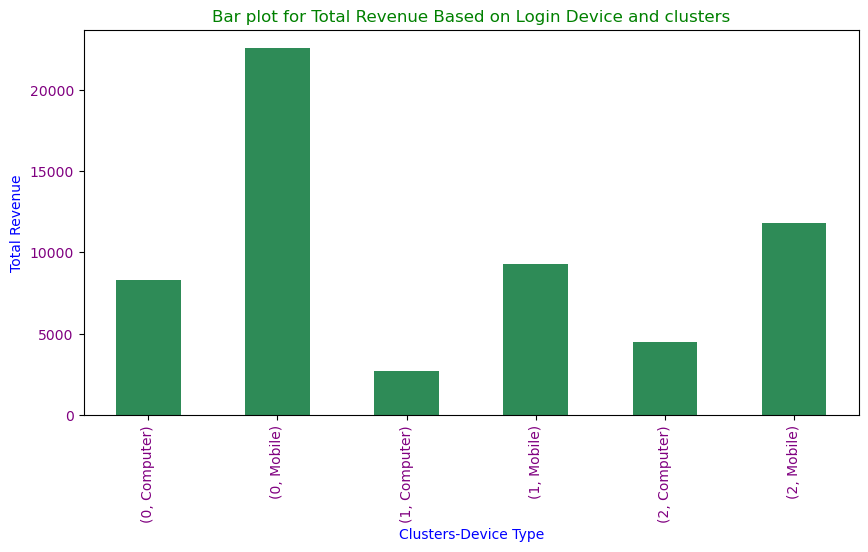

In [101]:
df_new_clust.groupby(['Clus_kmeans','Login_device']).sum()['rev_per_month'].plot(kind='bar',figsize=(10,5),color='seagreen')
plt.title("Bar plot for Total Revenue Based on Login Device and clusters",color='green')
plt.xlabel("Clusters-Device Type",color='blue')
plt.ylabel("Total Revenue",color='blue')
plt.xticks(color='purple')
plt.yticks(color='purple')
plt.show()

* Total Revenue generated is Maximum for Cluster 2 followed by cluster 0, in Login Device Mobile.
* Also, For Login Device Computer, Maximum Revenue is generated by Cluster 2.

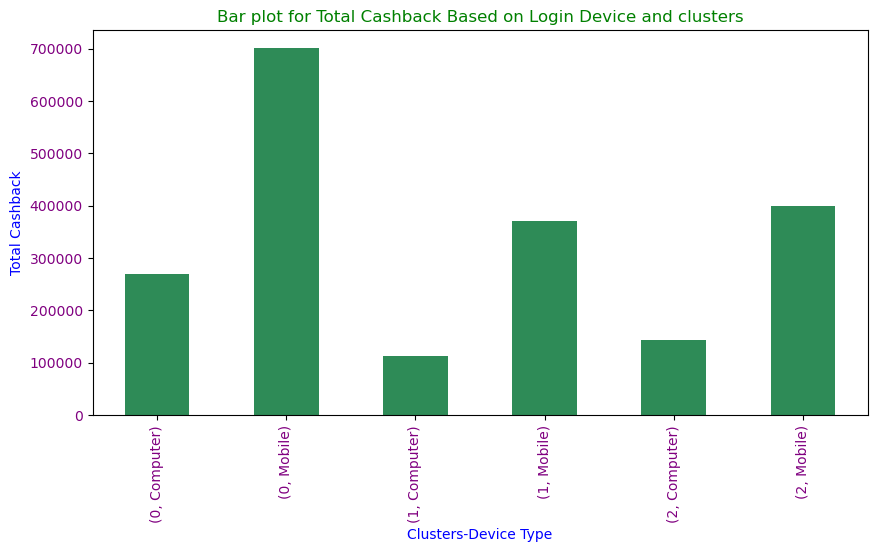

In [102]:
df_new_clust.groupby(['Clus_kmeans','Login_device']).sum()['cashback'].plot(kind='bar',figsize=(10,5),color='seagreen')
plt.title("Bar plot for Total Cashback Based on Login Device and clusters",color='green')
plt.xlabel("Clusters-Device Type",color='blue')
plt.ylabel("Total Cashback",color='blue')
plt.xticks(color='purple')
plt.yticks(color='purple')
plt.show()

* Total Cashback is Maximum for Cluster 2 followed by cluster 0, through Login Device Mobile.
* Also, For Login Device Computer, Maximum Cashback is generated by Cluster 2.

### Segmenting tha Dataset based on Clusters

**Let's Segment the Data based on Clusters Formed**

* Creating Three datasets based on Clusters formed for further Visualization.

In [103]:
clust_0_df = df_new_clust[df_new_clust['Clus_kmeans']==0]
clust_1_df = df_new_clust[df_new_clust['Clus_kmeans']==1]
clust_2_df = df_new_clust[df_new_clust['Clus_kmeans']==2]

In [104]:
display(clust_0_df.head())
display(clust_1_df.head())
display(clust_2_df.head())

Churn  Tenure  City_Tier  CC_Contacted_LY           Payment  Gender  \
2      1     0.0        1.0             30.0        Debit Card    Male   
4      1     0.0        1.0             12.0       Credit Card    Male   
5      1     0.0        1.0             22.0        Debit Card  Female   
6      1     2.0        3.0             11.0  Cash on Delivery    Male   
7      1     0.0        1.0              6.0       Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  ...  \
2            2.0                 4.0    Regular Plus             3.0  ...   
4            2.0                 3.0    Regular Plus             5.0  ...   
5            3.0                 4.0    Regular Plus             5.0  ...   
6            2.0                 3.0           Super             2.0  ...   
7            3.0                 3.0    Regular Plus             2.0  ...   

  coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  \
2                     0.0                   3.0    165.25        Mobile   
4                     1.0                   3.0    129.60        Mobile   
5                     3.5                   7.0    139.19      Computer   
6                     0.0                   0.0    120.86        Mobile   
7                     2.0                   0.0    122.93        Mobile   

   Tenure_Cat  CC_Contacted_LY_cat     Revenue_Cat CC_connect_category  \
2  Low tenure         High Contact  Medium Revenue              Recent   
4  Low tenure       Medium Contact     Low Revenue              Recent   
5  Low tenure         High Contact     Low Revenue              Recent   
6  Low tenure       Medium Contact     Low Revenue              Recent   
7  Low tenure          Low Contact     Low Revenue              Recent   

  cashback_category Clus_kmeans  
2            Medium           0  
4            Medium           0  
5            Medium           0  
6            Medium           0  
7            Medium           0  

[5 rows x 24 columns]

Churn  Tenure  City_Tier  CC_Contacted_LY           Payment  Gender  \
10      1     4.0        1.0             18.0  Cash on Delivery  Female   
11      1    11.0        1.0              6.0        Debit Card    Male   
14      1     9.0        3.0             15.0       Credit Card    Male   
21      1    20.0        1.0             29.0       Credit Card  Female   
24      1    14.0        1.0             14.0        Debit Card    Male   

    Service_Score  Account_user_count account_segment  CC_Agent_Score  ...  \
10            2.0                 3.0         Regular             3.0  ...   
11            3.0                 4.0             HNI             3.0  ...   
14            3.0                 4.0             HNI             2.0  ...   
21            3.0                 3.0             HNI             2.0  ...   
24            2.0                 5.0             HNI             2.0  ...   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  \
10                     3.5                   8.0    271.44        Mobile   
11                     0.0                   0.0    153.81        Mobile   
14                     0.0                   7.0    196.19        Mobile   
21                     3.5                   6.0    203.12        Mobile   
24                     0.0                   3.0    206.50      Computer   

       Tenure_Cat  CC_Contacted_LY_cat     Revenue_Cat CC_connect_category  \
10     Low tenure       Medium Contact     Low Revenue              Recent   
11  Medium tenure          Low Contact  Medium Revenue              Recent   
14  Medium tenure       Medium Contact     Low Revenue              Recent   
21  Medium tenure         High Contact     Low Revenue              Recent   
24  Medium tenure       Medium Contact     Low Revenue              Recent   

   cashback_category Clus_kmeans  
10              High           1  
11            Medium           1  
14            Medium           1  
21              High           1  
24              High           1  

[5 rows x 24 columns]

Churn  Tenure  City_Tier  CC_Contacted_LY     Payment  Gender  \
0       1     4.0        3.0              6.0  Debit Card  Female   
1       1     0.0        1.0              8.0         UPI    Male   
3       1     0.0        3.0             15.0  Debit Card    Male   
8       1    13.0        3.0              9.0    E wallet    Male   
15      1     9.0        2.0             12.0         UPI    Male   

    Service_Score  Account_user_count account_segment  CC_Agent_Score  ...  \
0             3.0                 3.0           Super             2.0  ...   
1             3.0                 4.0    Regular Plus             3.0  ...   
3             2.0                 4.0           Super             5.0  ...   
8             2.0                 4.0    Regular Plus             3.0  ...   
15            3.0                 3.0    Regular Plus             5.0  ...   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  \
0                      1.0                   5.0    159.93        Mobile   
1                      0.0                   0.0    120.90        Mobile   
3                      0.0                   3.0    134.07        Mobile   
8                      0.0                   2.0    126.83        Mobile   
15                     1.0                   2.0    120.73        Mobile   

       Tenure_Cat  CC_Contacted_LY_cat     Revenue_Cat CC_connect_category  \
0      Low tenure          Low Contact  Medium Revenue              Recent   
1      Low tenure          Low Contact  Medium Revenue              Recent   
3      Low tenure       Medium Contact  Medium Revenue              Recent   
8   Medium tenure          Low Contact     Low Revenue              Recent   
15  Medium tenure       Medium Contact     Low Revenue              Recent   

   cashback_category Clus_kmeans  
0             Medium           2  
1             Medium           2  
3             Medium           2  
8             Medium           2  
15            Medium           2  

[5 rows x 24 columns]

**Plotting Countplot for Different Clusters**

<Figure size 500x300 with 0 Axes>

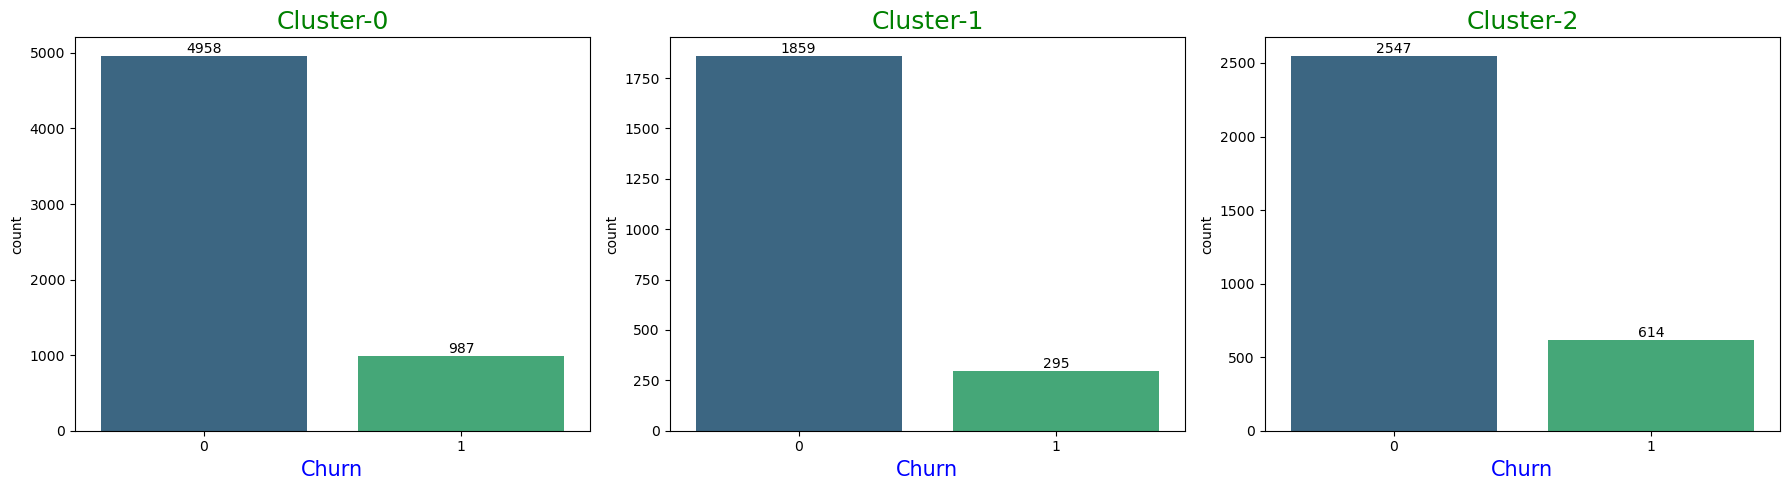

In [105]:
plt.figure(figsize=(5,3))
fig,axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax=sns.countplot(x=clust_0_df['Churn'],data=clust_0_df,order=clust_0_df['Churn'].value_counts().index,palette='viridis',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("Cluster-0",color='green',fontsize=18)
ax.set_xlabel("Churn",color='blue',fontsize=15)

ax1=sns.countplot(x=clust_1_df['Churn'],data=clust_1_df,order=clust_1_df['Churn'].value_counts().index,palette='viridis',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars)
ax1.set_title("Cluster-1",color='green',fontsize=18)
ax1.set_xlabel("Churn",color='blue',fontsize=15)

ax2=sns.countplot(x=clust_2_df['Churn'],data=clust_2_df,order=clust_2_df['Churn'].value_counts().index,palette='viridis',ax=axes[2])
for bars in ax2.containers:
        ax2.bar_label(bars)
ax2.set_title("Cluster-2",color='green',fontsize=18)
ax2.set_xlabel("Churn",color='blue',fontsize=15)

fig.tight_layout()
plt.show()

* Churners are more in Cluster-2 as compared to other Clusters.


<Figure size 500x300 with 0 Axes>

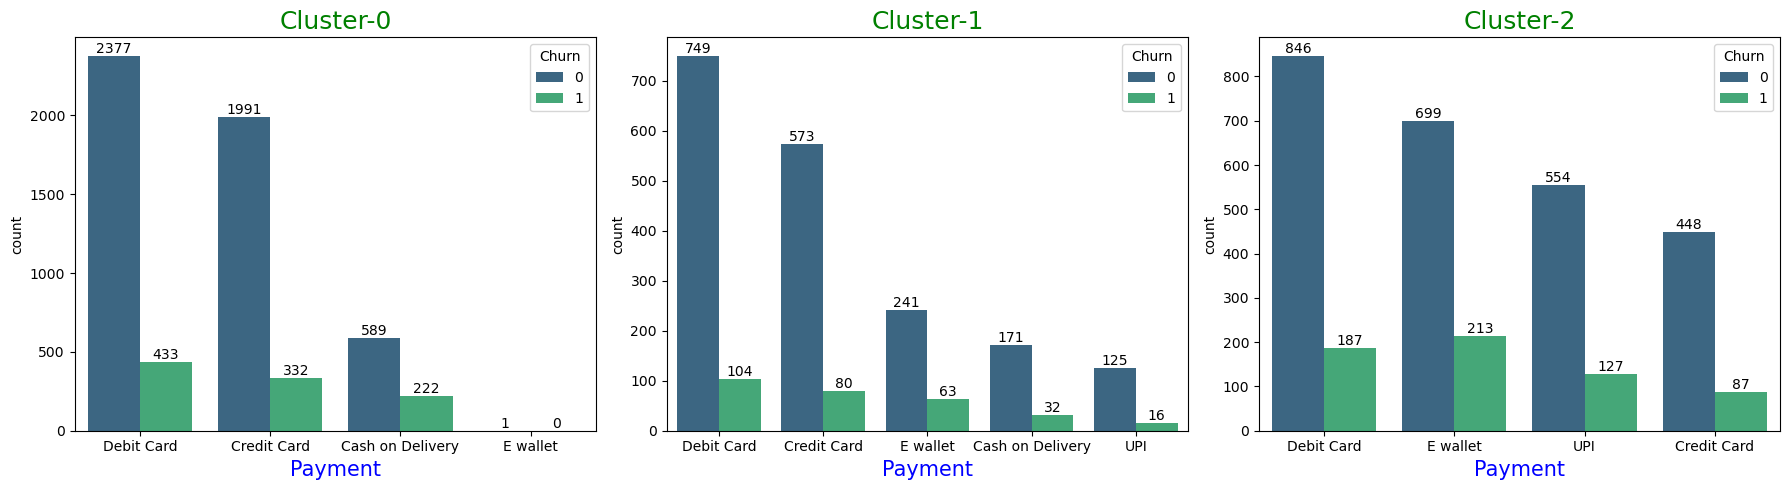

In [106]:
plt.figure(figsize=(5,3))
fig,axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax=sns.countplot(x=clust_0_df['Payment'],data=clust_0_df,order=clust_0_df['Payment'].value_counts().index,hue='Churn',palette='viridis',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("Cluster-0",color='green',fontsize=18)
ax.set_xlabel("Payment",color='blue',fontsize=15)

ax1=sns.countplot(x=clust_1_df['Payment'],data=clust_1_df,order=clust_1_df['Payment'].value_counts().index,hue='Churn',palette='viridis',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars)
ax1.set_title("Cluster-1",color='green',fontsize=18)
ax1.set_xlabel("Payment",color='blue',fontsize=15)

ax2=sns.countplot(x=clust_2_df['Payment'],data=clust_2_df,order=clust_2_df['Payment'].value_counts().index,hue='Churn',palette='viridis',ax=axes[2])
for bars in ax2.containers:
        ax2.bar_label(bars)
ax2.set_title("Cluster-2",color='green',fontsize=18)
ax2.set_xlabel("Payment",color='blue',fontsize=15)

fig.tight_layout()
plt.show()

* E-wallet payment mode is mostly used by Cluster-0 customers as compared to other clusters.
* Debit Card payment mode is used by all three clusters customer.
* E-wallet is Rearely used in cluster-2.
* Maximum churners use Debit card as payment mode across clusters.

<Figure size 500x300 with 0 Axes>

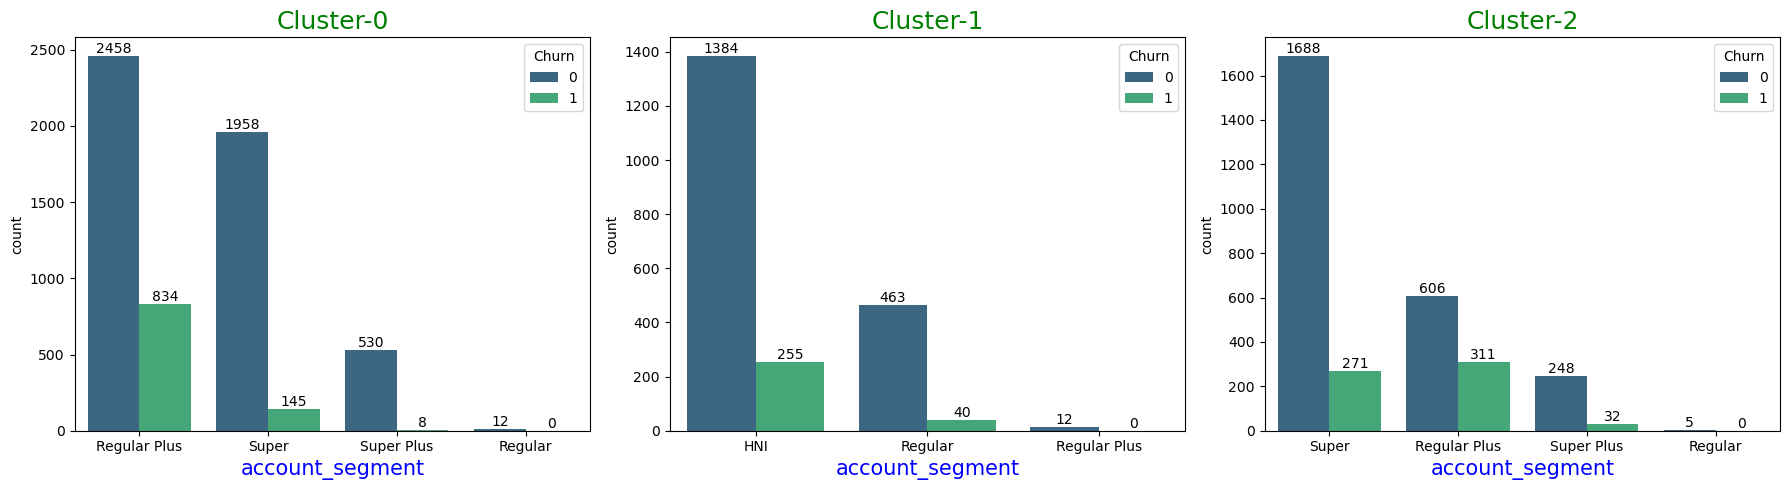

In [107]:
plt.figure(figsize=(5,3))
fig,axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax=sns.countplot(x=clust_0_df['account_segment'],data=clust_0_df,order=clust_0_df['account_segment'].value_counts().index,hue='Churn',palette='viridis',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("Cluster-0",color='green',fontsize=18)
ax.set_xlabel("account_segment",color='blue',fontsize=15)

ax1=sns.countplot(x=clust_1_df['account_segment'],data=clust_1_df,order=clust_1_df['account_segment'].value_counts().index,hue='Churn',palette='viridis',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars)
ax1.set_title("Cluster-1",color='green',fontsize=18)
ax1.set_xlabel("account_segment",color='blue',fontsize=15)

ax2=sns.countplot(x=clust_2_df['account_segment'],data=clust_2_df,order=clust_2_df['account_segment'].value_counts().index,hue='Churn',palette='viridis',ax=axes[2])
for bars in ax2.containers:
        ax2.bar_label(bars)
ax2.set_title("Cluster-2",color='green',fontsize=18)
ax2.set_xlabel("account_segment",color='blue',fontsize=15)

fig.tight_layout()
plt.show()

* Super account holder are more in Cluster-2 followed by Cluster-0
* Maximum Regular Plus account holders belongs to Cluster-0 and Cluster-2.
* In cluster-2 more churners belong to Regular plus account.
* More Churners belong to Regular plus account.

<Figure size 500x300 with 0 Axes>

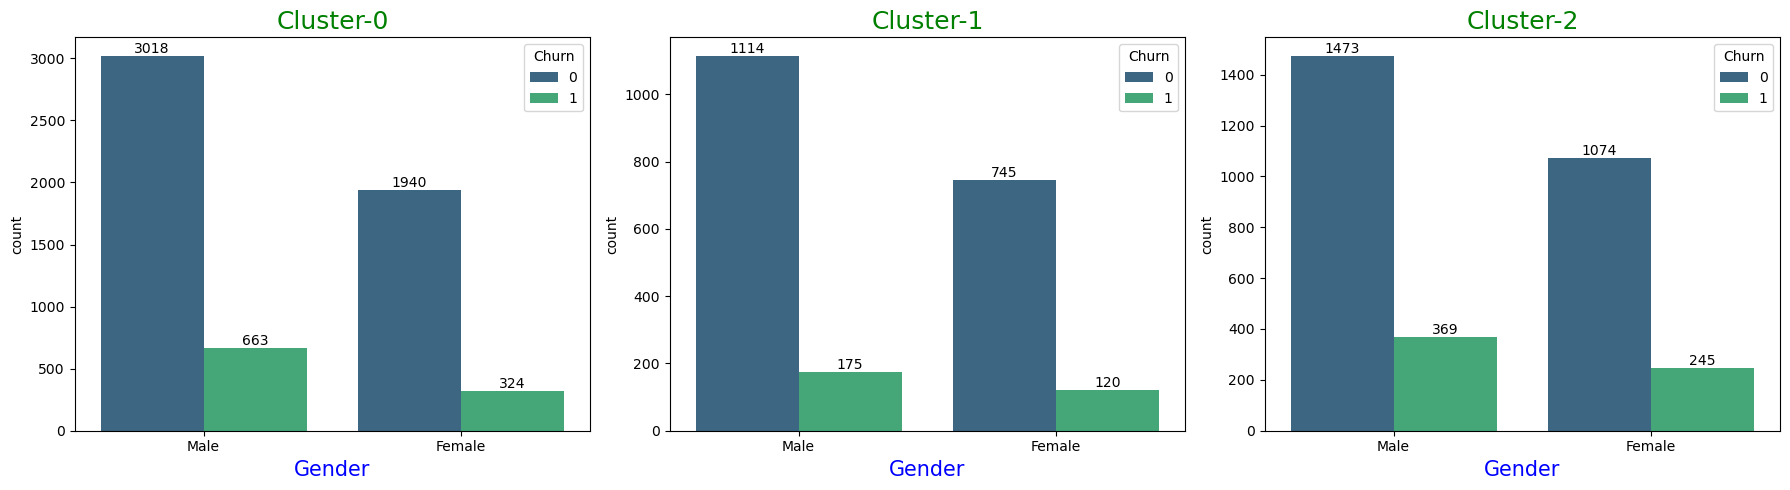

In [108]:
plt.figure(figsize=(5,3))
fig,axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax=sns.countplot(x=clust_0_df['Gender'],data=clust_0_df,order=clust_0_df['Gender'].value_counts().index,hue='Churn',palette='viridis',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("Cluster-0",color='green',fontsize=18)
ax.set_xlabel("Gender",color='blue',fontsize=15)

ax1=sns.countplot(x=clust_1_df['Gender'],data=clust_1_df,order=clust_1_df['Gender'].value_counts().index,hue='Churn',palette='viridis',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars)
ax1.set_title("Cluster-1",color='green',fontsize=18)
ax1.set_xlabel("Gender",color='blue',fontsize=15)

ax2=sns.countplot(x=clust_2_df['Gender'],data=clust_2_df,order=clust_2_df['Gender'].value_counts().index,hue='Churn',palette='viridis',ax=axes[2])
for bars in ax2.containers:
        ax2.bar_label(bars)
ax2.set_title("Cluster-2",color='green',fontsize=18)
ax2.set_xlabel("Gender",color='blue',fontsize=15)

fig.tight_layout()
plt.show()

* Females are slightly more in Cluster-2 as compared to other clusters.
* Male Churners are more as compared to Female across clusters.

<Figure size 500x300 with 0 Axes>

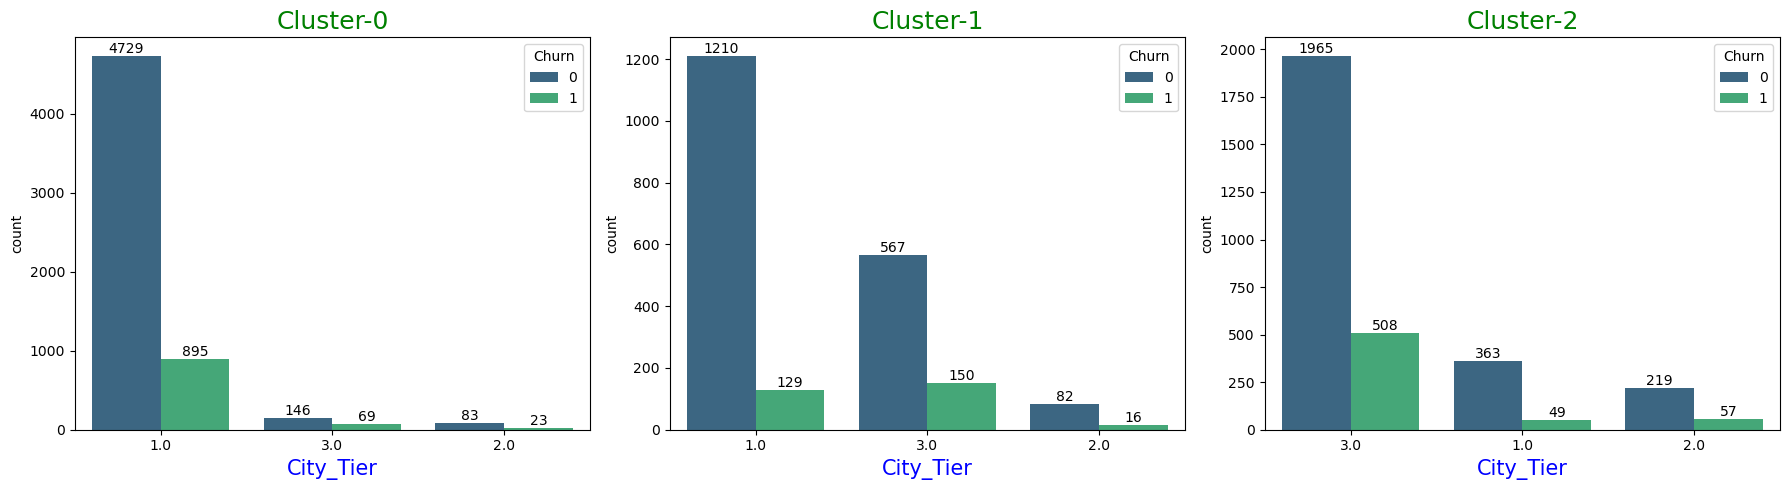

In [109]:
plt.figure(figsize=(5,3))
fig,axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax=sns.countplot(x=clust_0_df['City_Tier'],data=clust_0_df,order=clust_0_df['City_Tier'].value_counts().index,hue='Churn',palette='viridis',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("Cluster-0",color='green',fontsize=18)
ax.set_xlabel("City_Tier",color='blue',fontsize=15)

ax1=sns.countplot(x=clust_1_df['City_Tier'],data=clust_1_df,order=clust_1_df['City_Tier'].value_counts().index,hue='Churn',palette='viridis',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars)
ax1.set_title("Cluster-1",color='green',fontsize=18)
ax1.set_xlabel("City_Tier",color='blue',fontsize=15)

ax2=sns.countplot(x=clust_2_df['City_Tier'],data=clust_2_df,order=clust_2_df['City_Tier'].value_counts().index,hue='Churn',palette='viridis',ax=axes[2])
for bars in ax2.containers:
        ax2.bar_label(bars)
ax2.set_title("Cluster-2",color='green',fontsize=18)
ax2.set_xlabel("City_Tier",color='blue',fontsize=15)

fig.tight_layout()
plt.show()

* Cluster-2 has most number of customers in Tier-1 than in Tier 2 and 3 cities
* The same goes with Cluster 0 and 1.It has more number of customers from Tier 1 city than in Tier 2 and 3 cities.
* More churners belong to cluster-2.

<Figure size 500x300 with 0 Axes>

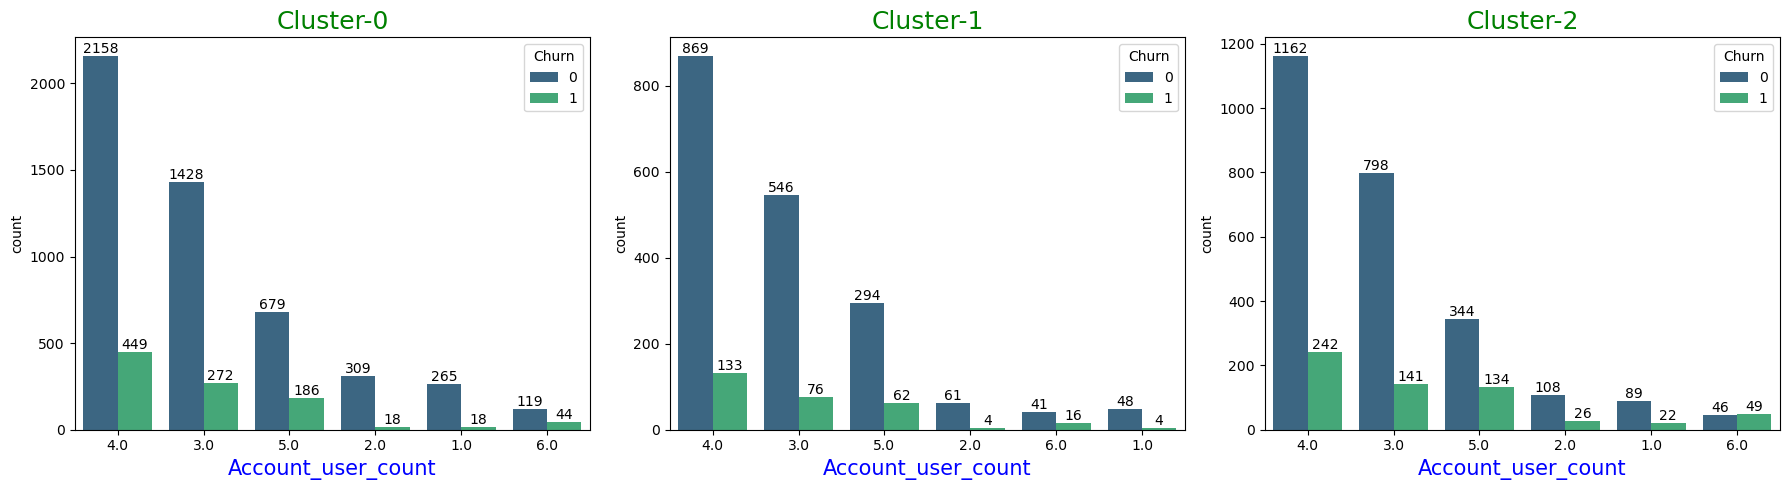

In [110]:
plt.figure(figsize=(5,3))
fig,axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax=sns.countplot(x=clust_0_df['Account_user_count'],data=clust_0_df,order=clust_0_df['Account_user_count'].value_counts().index,hue='Churn',palette='viridis',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("Cluster-0",color='green',fontsize=18)
ax.set_xlabel("Account_user_count",color='blue',fontsize=15)

ax1=sns.countplot(x=clust_1_df['Account_user_count'],data=clust_1_df,order=clust_1_df['Account_user_count'].value_counts().index,hue='Churn',palette='viridis',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars)
ax1.set_title("Cluster-1",color='green',fontsize=18)
ax1.set_xlabel("Account_user_count",color='blue',fontsize=15)

ax2=sns.countplot(x=clust_2_df['Account_user_count'],data=clust_2_df,order=clust_2_df['Account_user_count'].value_counts().index,hue='Churn',palette='viridis',ax=axes[2])
for bars in ax2.containers:
        ax2.bar_label(bars)
ax2.set_title("Cluster-2",color='green',fontsize=18)
ax2.set_xlabel("Account_user_count",color='blue',fontsize=15)

fig.tight_layout()
plt.show()

* More churners belong to account tagged with 3 or 4 or 5 users in all clusters.

<Figure size 500x300 with 0 Axes>

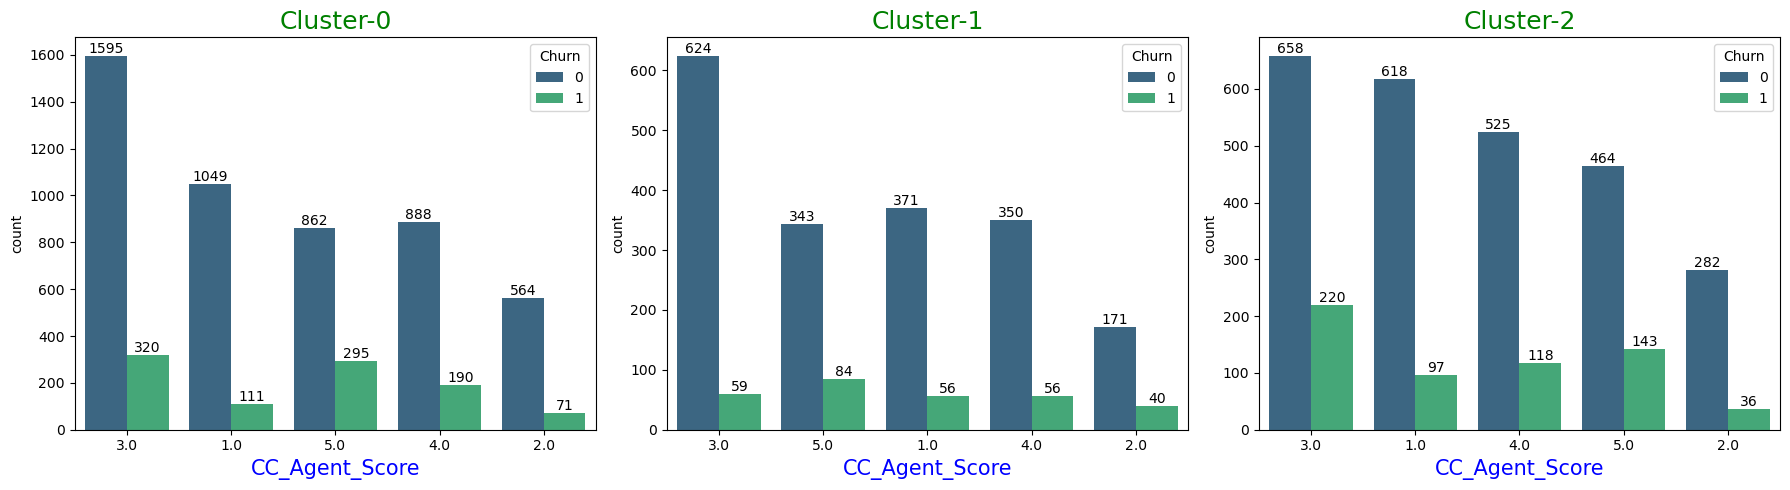

In [111]:
plt.figure(figsize=(5,3))
fig,axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax=sns.countplot(x=clust_0_df['CC_Agent_Score'],data=clust_0_df,order=clust_0_df['CC_Agent_Score'].value_counts().index,hue='Churn',palette='viridis',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("Cluster-0",color='green',fontsize=18)
ax.set_xlabel("CC_Agent_Score",color='blue',fontsize=15)

ax1=sns.countplot(x=clust_1_df['CC_Agent_Score'],data=clust_1_df,order=clust_1_df['CC_Agent_Score'].value_counts().index,hue='Churn',palette='viridis',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars)
ax1.set_title("Cluster-1",color='green',fontsize=18)
ax1.set_xlabel("CC_Agent_Score",color='blue',fontsize=15)

ax2=sns.countplot(x=clust_2_df['CC_Agent_Score'],data=clust_2_df,order=clust_2_df['CC_Agent_Score'].value_counts().index,hue='Churn',palette='viridis',ax=axes[2])
for bars in ax2.containers:
        ax2.bar_label(bars)
ax2.set_title("Cluster-2",color='green',fontsize=18)
ax2.set_xlabel("CC_Agent_Score",color='blue',fontsize=15)

fig.tight_layout()
plt.show();

* In cluster-0,1 and 2,satisfaction score given by maximum customers is 3.


<Figure size 500x300 with 0 Axes>

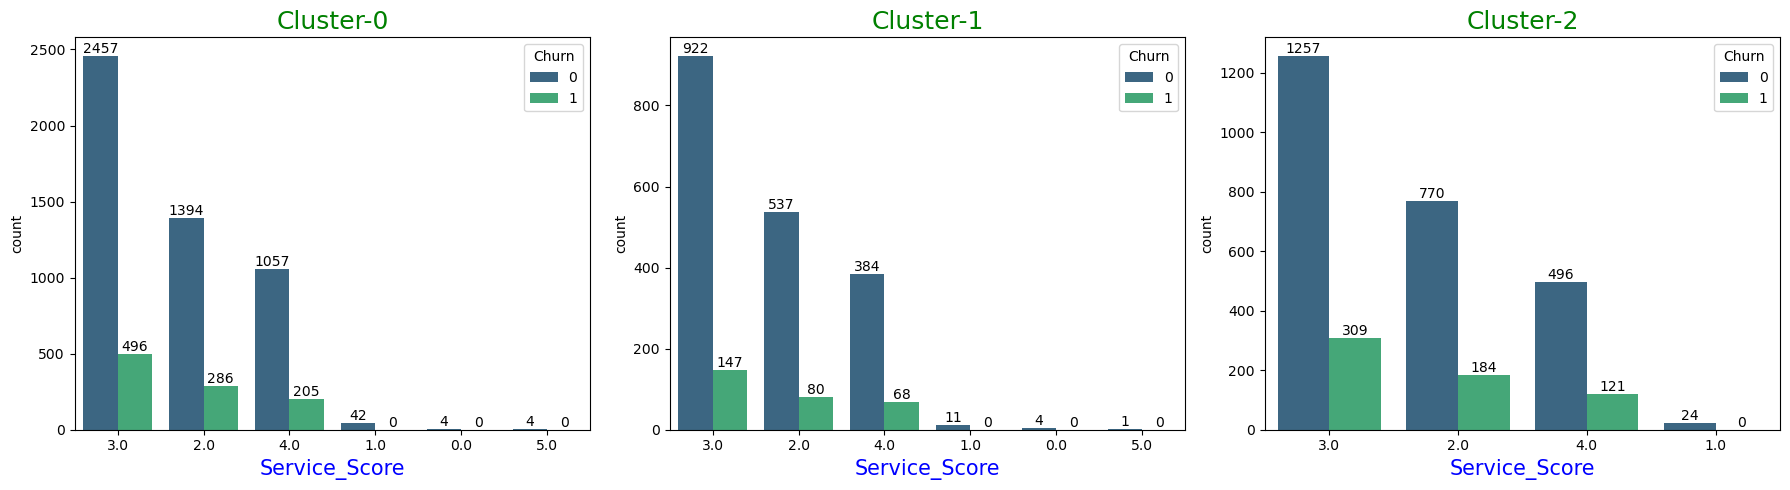

In [112]:
plt.figure(figsize=(5,3))
fig,axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax=sns.countplot(x=clust_0_df['Service_Score'],data=clust_0_df,order=clust_0_df['Service_Score'].value_counts().index,hue='Churn',palette='viridis',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars)
ax.set_title("Cluster-0",color='green',fontsize=18)
ax.set_xlabel("Service_Score",color='blue',fontsize=15)

ax1=sns.countplot(x=clust_1_df['Service_Score'],data=clust_1_df,order=clust_1_df['Service_Score'].value_counts().index,hue='Churn',palette='viridis',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars)
ax1.set_title("Cluster-1",color='green',fontsize=18)
ax1.set_xlabel("Service_Score",color='blue',fontsize=15)

ax2=sns.countplot(x=clust_2_df['Service_Score'],data=clust_2_df,order=clust_2_df['Service_Score'].value_counts().index,hue='Churn',palette='viridis',ax=axes[2])
for bars in ax2.containers:
        ax2.bar_label(bars)
ax2.set_title("Cluster-2",color='green',fontsize=18)
ax2.set_xlabel("Service_Score",color='blue',fontsize=15)

fig.tight_layout()
plt.show();

* In all the Clusters maximum customers have given a score of 3,2 and 4 respectively.

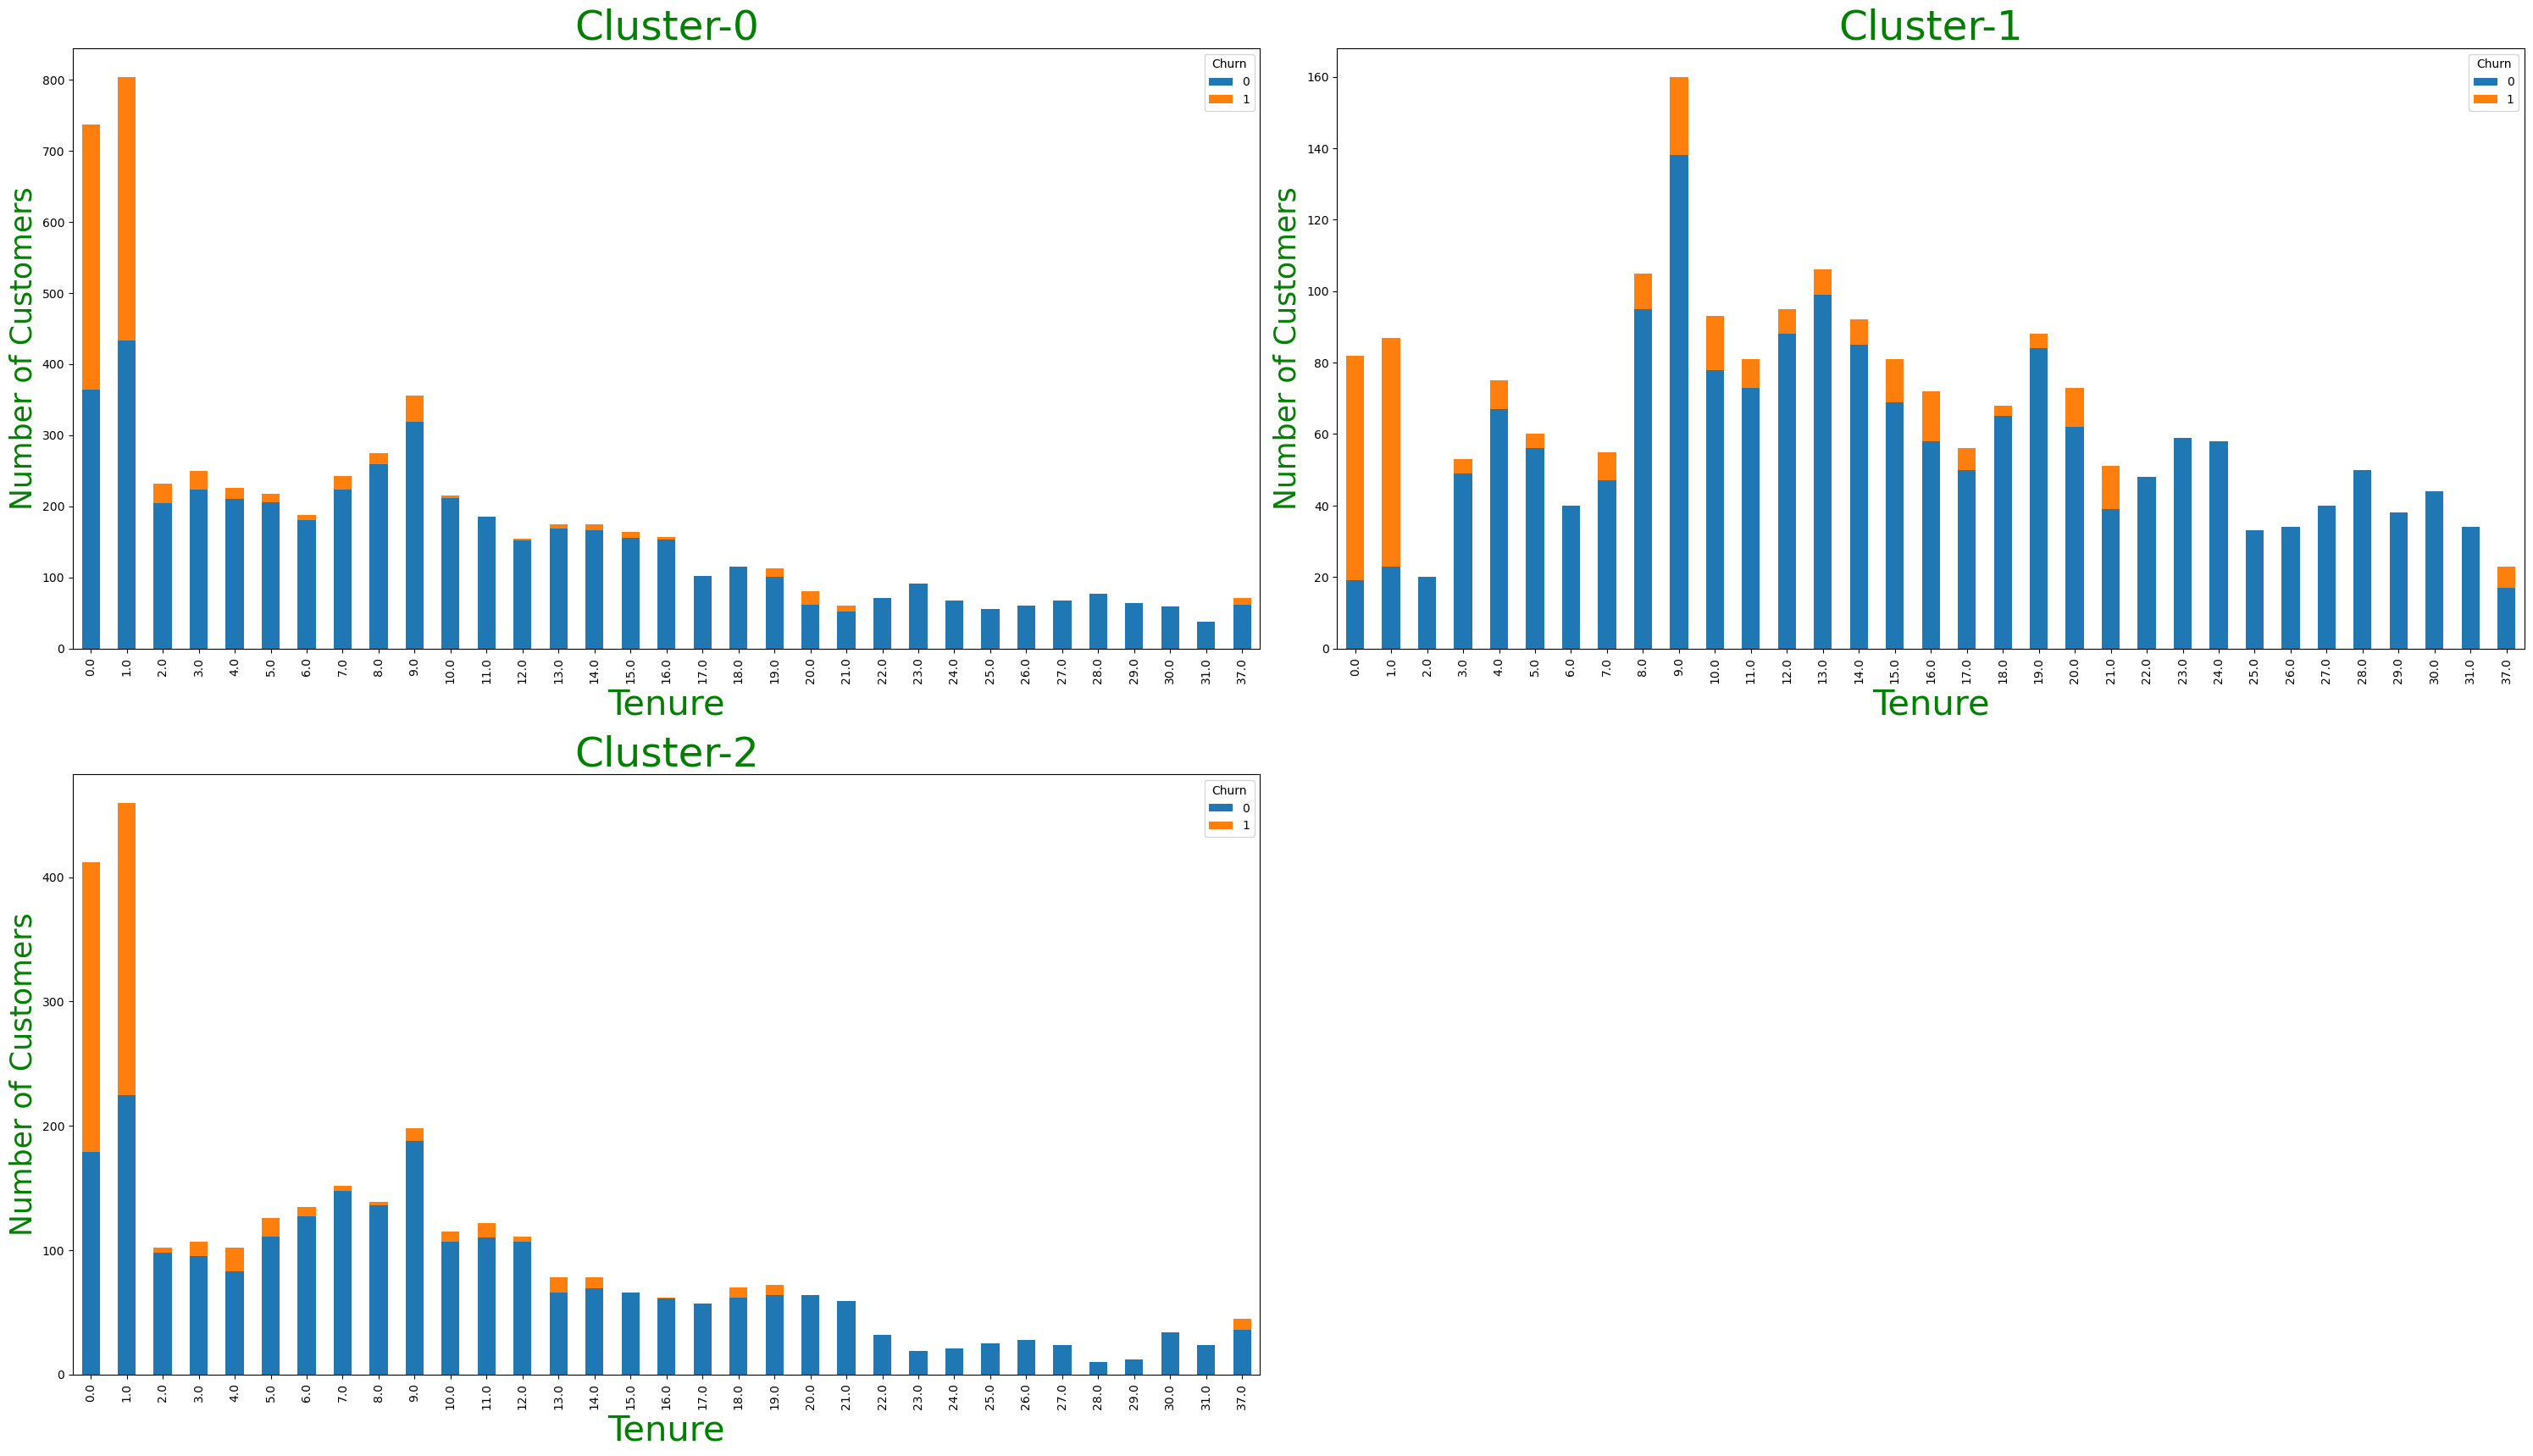

In [113]:
p1 = clust_0_df.groupby("Tenure")['Churn'].value_counts(normalize=False).unstack()
p2 = clust_1_df.groupby("Tenure")['Churn'].value_counts(normalize=False).unstack()
p3 = clust_2_df.groupby("Tenure")['Churn'].value_counts(normalize=False).unstack()


fig = plt.figure(figsize=(20,10)) # create figure
fig.set_size_inches(30,25)

ax0 = fig.add_subplot(321) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(322) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(323) # add subplot 2 (1 row, 2 columns, third plot).

# Subplot 1
p1.plot(kind='bar', stacked='False', ax=ax0) # add to subplot 1
ax0.set_title('Cluster-0',fontsize=35,color='green')
ax0.set_xlabel('Tenure',fontsize=30,color='green')
ax0.set_ylabel('Number of Customers',fontsize=25,color='green')

# Subplot 2
p2.plot(kind='bar', stacked='False', ax=ax1) # add to subplot 2
ax1.set_title('Cluster-1',fontsize=35,color='green')
ax1.set_xlabel('Tenure',fontsize=30,color='green')
ax1.set_ylabel('Number of Customers',fontsize=25,color='green')

# Subplot 3
p3.plot(kind='bar', stacked='False', ax=ax2) # add to subplot 2
ax2.set_title('Cluster-2',fontsize=35,color='green')
ax2.set_xlabel('Tenure',fontsize=30,color='green')
ax2.set_ylabel('Number of Customers',fontsize=25,color='green')

fig.tight_layout()
plt.show()


* It is observed that the newly joined customers having low Tenure Churns most,so more concern should be given to the newly joined customers and their cause of churning should be figured out.
* Most of the customers who Churns, customers with less than 2 tenures are classified as new customers.

## Feature Selection


 We will use Variance Inflation Factor to Select the Important features using the VIF value.

How to check for Multicollinearity
There are different ways of detecting (or testing) multicollinearity. One such way is Variation Inflation Factor.

Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient  𝛽𝑘
  is "inflated" by the existence of correlation among the predictor variables in the model.

General Rule of Thumb:

If VIF is 1, then there is no correlation among the  𝑘
 th predictor and the remaining predictor variables, and hence, the variance of  𝛽𝑘
  is not inflated at all.
If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
The purpose of the analysis should dictate which threshold to use.

**We will drop the features for VIF > 5.**

In [114]:
X = df_scaled.drop('Churn',axis=1)
X.shape

(11260, 17)

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
# Function to Calculate VIF 

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [117]:
# X = sc_churn_df.drop('Default',axis=1)
calculate_vif(X).sort_values(by = 'VIF',ascending = False)

Features        VIF
3             Service_Score  17.484729
9            rev_growth_yoy  10.127597
4        Account_user_count   9.070012
14              Revenue_Cat   5.558331
12               Tenure_Cat   5.106951
5           account_segment   4.975312
16        cashback_category   4.689346
0                 City_Tier   4.413725
1                   Payment   4.244796
7            Marital_Status   3.945187
11             Login_device   3.562286
10  coupon_used_for_payment   3.251547
6            CC_Agent_Score   3.151207
13      CC_Contacted_LY_cat   2.730843
2                    Gender   2.461667
8               Complain_ly   1.373440
15      CC_connect_category   1.137847

In [118]:
# Dropping the Feature with Highest VIF value

X = X.drop('Service_Score',axis=1)

# Re-calculating the VIF value again

calculate_vif(X).sort_values(by = 'VIF',ascending = False)

Features       VIF
8            rev_growth_yoy  9.469890
3        Account_user_count  7.752405
13              Revenue_Cat  5.446654
11               Tenure_Cat  5.009223
4           account_segment  4.943209
15        cashback_category  4.632788
0                 City_Tier  4.396043
1                   Payment  4.234857
6            Marital_Status  3.935611
10             Login_device  3.513116
5            CC_Agent_Score  3.098279
9   coupon_used_for_payment  3.040742
12      CC_Contacted_LY_cat  2.727466
2                    Gender  2.449102
7               Complain_ly  1.370299
14      CC_connect_category  1.137835

In [119]:
# Dropping the Feature with Highest VIF value

X = X.drop('rev_growth_yoy',axis=1)

# Re-calculating the VIF value again

calculate_vif(X).sort_values(by = 'VIF',ascending = False)

Features       VIF
3        Account_user_count  7.335958
12              Revenue_Cat  5.296937
10               Tenure_Cat  4.934350
4           account_segment  4.869584
14        cashback_category  4.573363
0                 City_Tier  4.381743
1                   Payment  4.204197
6            Marital_Status  3.867137
9              Login_device  3.469039
5            CC_Agent_Score  3.072270
8   coupon_used_for_payment  3.001459
11      CC_Contacted_LY_cat  2.708864
2                    Gender  2.426313
7               Complain_ly  1.366908
13      CC_connect_category  1.137764

In [120]:
# Dropping the Feature with Highest VIF value

X = X.drop('Account_user_count',axis=1)

# Re-calculating the VIF value again

calculate_vif(X).sort_values(by = 'VIF',ascending = False)

Features       VIF
11              Revenue_Cat  5.130846
9                Tenure_Cat  4.873794
3           account_segment  4.846889
13        cashback_category  4.535244
0                 City_Tier  4.334182
1                   Payment  4.164719
5            Marital_Status  3.758275
8              Login_device  3.430159
4            CC_Agent_Score  3.046708
7   coupon_used_for_payment  2.758152
10      CC_Contacted_LY_cat  2.694389
2                    Gender  2.411772
6               Complain_ly  1.362925
12      CC_connect_category  1.137254

In [121]:
X.shape

(11260, 14)

In [122]:
X.columns

Index(['City_Tier', 'Payment', 'Gender', 'account_segment', 'CC_Agent_Score',
       'Marital_Status', 'Complain_ly', 'coupon_used_for_payment',
       'Login_device', 'Tenure_Cat', 'CC_Contacted_LY_cat', 'Revenue_Cat',
       'CC_connect_category', 'cashback_category'],
      dtype='object')

In [123]:
df_features=df_scaled.drop(['Service_Score','Account_user_count','rev_growth_yoy'],axis=1)

In [124]:
df_features.head()

Churn  City_Tier  Payment  Gender  account_segment  CC_Agent_Score  \
0      1        3.0        2       0                3            0.25   
1      1        1.0        4       1                2            0.50   
2      1        1.0        2       1                2            0.50   
3      1        3.0        2       1                3            1.00   
4      1        1.0        1       1                2            1.00   

   Marital_Status  Complain_ly  coupon_used_for_payment  Login_device  \
0               2          1.0                 0.285714             1   
1               2          1.0                 0.000000             1   
2               2          1.0                 0.000000             1   
3               2          0.0                 0.000000             1   
4               2          0.0                 0.285714             1   

   Tenure_Cat  CC_Contacted_LY_cat  Revenue_Cat  CC_connect_category  \
0           1                    1            2                    0   
1           1                    1            2                    0   
2           1                    0            2                    0   
3           1                    2            2                    0   
4           1                    2            1                    0   

   cashback_category  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2

In [125]:
df_features.shape

(11260, 15)

##                     --------------------**Capstone Project Notes - 2**---------------------

### 1). Model building and interpretation
- a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)
- b. Test your predictive model against the test set using various appropriate performance metrics
- c.Interpretation of the model(s)
### 2). Model Tuning and business implication
- a.Ensemble modelling, wherever applicable
- b. Any other model tuning measures(if applicable)
- c. Interpretation of the most optimum model and its implication on the business

In [126]:
df_features.head()

Churn  City_Tier  Payment  Gender  account_segment  CC_Agent_Score  \
0      1        3.0        2       0                3            0.25   
1      1        1.0        4       1                2            0.50   
2      1        1.0        2       1                2            0.50   
3      1        3.0        2       1                3            1.00   
4      1        1.0        1       1                2            1.00   

   Marital_Status  Complain_ly  coupon_used_for_payment  Login_device  \
0               2          1.0                 0.285714             1   
1               2          1.0                 0.000000             1   
2               2          1.0                 0.000000             1   
3               2          0.0                 0.000000             1   
4               2          0.0                 0.285714             1   

   Tenure_Cat  CC_Contacted_LY_cat  Revenue_Cat  CC_connect_category  \
0           1                    1            2                    0   
1           1                    1            2                    0   
2           1                    0            2                    0   
3           1                    2            2                    0   
4           1                    2            1                    0   

   cashback_category  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2

### Splitting the data into Train Test Split:

In [127]:
X = df_features.drop('Churn',axis=1)
y = df_features['Churn']

**Train-Test Split**

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=df_features['Churn'])


In [130]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train : (7882, 14)
Shape of X_test : (3378, 14)
Shape of y_train : (7882,)
Shape of y_test : (3378,)


In [131]:
y_train.value_counts(normalize=True) # percentage of two categories in target columns 

0    0.831642
1    0.168358
Name: Churn, dtype: float64

In [132]:
y_test.value_counts(normalize=True)

0    0.831557
1    0.168443
Name: Churn, dtype: float64

### Treating target imbalance using SMOTE

In [133]:
pip install --upgrade scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ff/91/609961972f694cb9520c4c3d201e377a26583e1eb83bc5a334c893729214/scikit_learn-1.5.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached scikit_learn-1.5.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-macosx_10_9_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [134]:
pip check


tables 3.8.0 requires blosc2, which is not installed.
tables 3.8.0 requires cython, which is not installed.
conda-repo-cli 1.0.41 requires requests-mock, which is not installed.
spyder 5.4.3 requires pyqt5, which is not installed.
spyder 5.4.3 requires pyqtwebengine, which is not installed.
gensim 4.3.0 requires fuzzytm, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
conda-repo-cli 1.0.41 has requirement clyent==1.2.1, but you have clyent 1.2.2.
conda-repo-cli 1.0.41 has requirement nbformat==5.4.0, but you have nbformat 5.7.0.
conda-repo-cli 1.0.41 has requirement requests==2.28.1, but you have requests 2.31.0.
python-lsp-black 1.2.1 has requirement black>=22.3.0, but you have black 0.0.
Note: you may need to restart the kernel to use updated packages.


In [135]:
from sklearn.utils import _param_validation


In [136]:
pip install scikit-learn==1.2.2


  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/27/4a/1afe473760b07663710a75437b795ef37362aebb8bf513ff3bbf78fbd0c6/scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl (9.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
Note: you may need to restart the kernel to use updated packages.


In [137]:
from imblearn.over_sampling import SMOTE 

In [138]:
sm = SMOTE(random_state=42, sampling_strategy = .75)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [139]:
y_train_smote.value_counts(1)

0    0.571441
1    0.428559
Name: Churn, dtype: float64

#### Model evaluation criterion
Model can make wrong predictions as:

  * No Churn actually, but model predicted Churn
  * Churn actually, but model predicted no churn

Which case is more important?

Both are important to correctly estimate the number of churners

How to reduce the losses?

F1 Score can be used as the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
We will use SMOTE so that model focuses equally on both classes.

Note :
Precison : tells us how many predictions are actually positive out of all the total positive predicted.
Recall   : tells us how many observations of positive class are actually predicted as positive.                                                                                                                            

In [140]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [141]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

## Logistic Regression Model


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [143]:
lgt_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty=None,verbose=True,n_jobs=-1,random_state=42)
lgt_model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.8s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=42,
                   solver='newton-cg', verbose=True)

**Accuracy of Training and Test Data.**

In [144]:
print("Accuracy of the Training Data: ",lgt_model.score(X_train,y_train))
print("Accuracy of the Test Data: ",lgt_model.score(X_test,y_test))

Accuracy of the Training Data:  0.84128393808678
Accuracy of the Test Data:  0.8493191237418591


**Dataset Validation (over fitting or under fitting)**
* The Accuracy of both the Train data and Test data are almost same.Hence our model is Neither Overfit nor Underfit.

### Predicting on Training and Test dataset:

In [145]:
ytrain_pred = lgt_model.predict(X_train)
ytest_pred = lgt_model.predict(X_test)

**Classification Report**

In [146]:
print("Classification Report of the Training data:\n\n",metrics.classification_report(y_train,ytrain_pred),'\n')
print("Classification Report of the Test data:\n\n",metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.86      0.97      0.91      6555
           1       0.59      0.19      0.28      1327

    accuracy                           0.84      7882
   macro avg       0.72      0.58      0.60      7882
weighted avg       0.81      0.84      0.80      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.86      0.98      0.91      2809
           1       0.65      0.23      0.34       569

    accuracy                           0.85      3378
   macro avg       0.76      0.60      0.63      3378
weighted avg       0.83      0.85      0.82      3378



In [147]:
logistic_regression_model_train_perf = model_performance_classification_sklearn(
    lgt_model, X_train, y_train
)
logistic_regression_model_train_perf

Accuracy    Recall  Precision        F1
0  0.841284  0.185381   0.591346  0.282272

**Confusion Matrix : Train dataset**

In [148]:
from sklearn.metrics import confusion_matrix

In [149]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Actuals")
    plt.xlabel("Predicted")

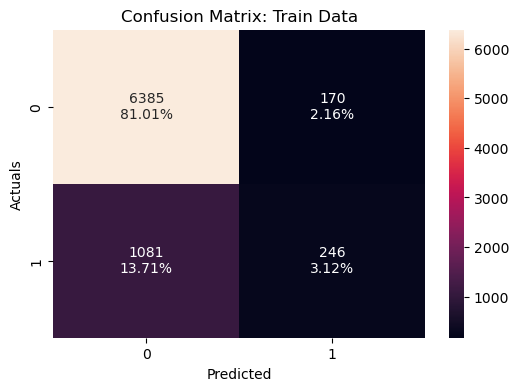

In [150]:
confusion_matrix_sklearn(lgt_model, X_train, y_train)
plt.title("Confusion Matrix: Train Data");

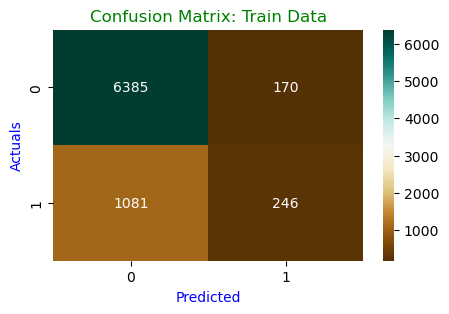

In [151]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Matrix: Train Data",color='green');

#### Checking model performance on test set

In [152]:
logistic_regression_model_train_perf = model_performance_classification_sklearn(lgt_model, X_test, y_test) ## Complete the code to check performance for test data
logistic_regression_model_train_perf

Accuracy    Recall  Precision        F1
0  0.849319  0.228471       0.65  0.338101

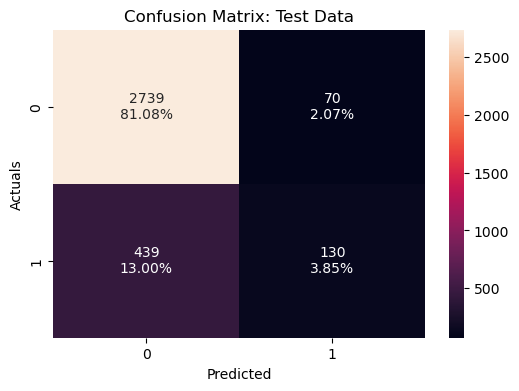

In [153]:
confusion_matrix_sklearn(lgt_model, X_test, y_test)
plt.title("Confusion Matrix: Test Data");

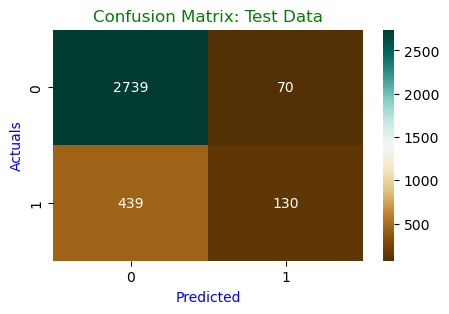

In [154]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Matrix: Test Data",color='green');

**AUC and ROC Curve : Training data:**

In [155]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.791


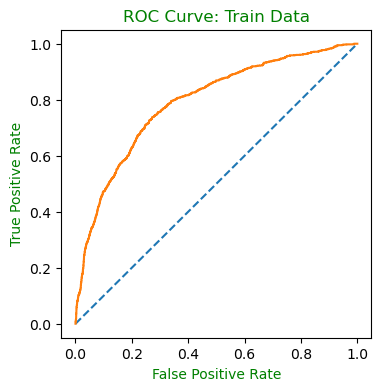

In [156]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lgt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve: Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

AUC: 0.785


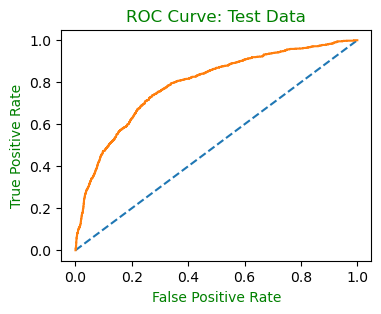

In [157]:
plt.figure(figsize=(4,3))
# predict probabilities
probs = lgt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve: Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.plot(train_fpr,train_tpr);

### Comparison Table

In [158]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train,lgt_model.predict_proba(X_train)[:,1]),
                          'auc_Test':roc_auc_score(y_test,lgt_model.predict_proba(X_test)[:,1])},index=['Logistic Regression'])
resultsDf

Train_Accuracy  Test_Accuracy  recall_Train  recall_Test  \
Logistic Regression        0.841284       0.849319      0.185381     0.228471   

                     precision_Train  precision_Test  f1_Train   f1_Test  \
Logistic Regression         0.591346            0.65  0.282272  0.338101   

                     auc_Train  auc_Test  
Logistic Regression    0.79064  0.784972

# Building Logistic regression model on Balanced dataset using SMOTE

In [159]:
lgt_smote = LogisticRegression(random_state=42)
lgt_smote.fit(X_train_smote,y_train_smote)

LogisticRegression(random_state=42)

**Accuracy of Training and Test Data.**

In [160]:
print("Accuracy of the Training Data: ",lgt_smote.score(X_train_smote,y_train_smote))
print("Accuracy of the Test Data: ",lgt_smote.score(X_test,y_test))

Accuracy of the Training Data:  0.741957980995554
Accuracy of the Test Data:  0.7729425695677916


**Data Validation (over fitting or under fitting):**

* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Predictions**

In [161]:
ytrain_pred = lgt_smote.predict(X_train_smote)
ytest_pred = lgt_smote.predict(X_test)

**Classification Report**

In [162]:
print("Classification Report of the Training data:\n\n",metrics.classification_report(y_train_smote,ytrain_pred),'\n')
print("Classification Report of the Test data:\n\n",metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.76      0.79      0.78      6555
           1       0.71      0.67      0.69      4916

    accuracy                           0.74     11471
   macro avg       0.74      0.73      0.73     11471
weighted avg       0.74      0.74      0.74     11471
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.92      0.80      0.85      2809
           1       0.39      0.65      0.49       569

    accuracy                           0.77      3378
   macro avg       0.66      0.72      0.67      3378
weighted avg       0.83      0.77      0.79      3378



**Confusion Matrix**

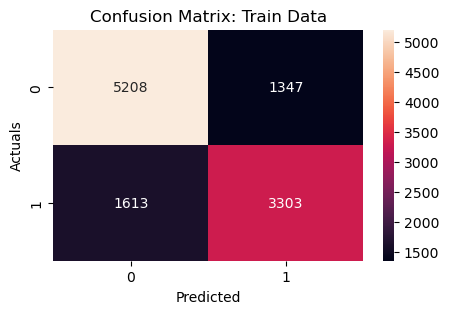

In [163]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_train_smote,ytrain_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals');
plt.title("Confusion Matrix: Train Data");

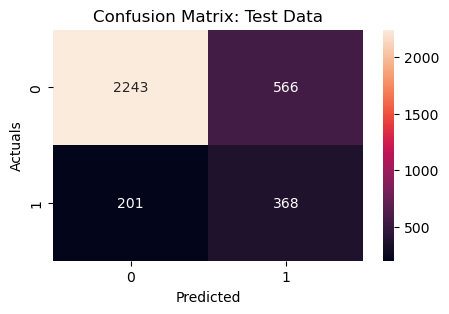

In [164]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals');
plt.title("Confusion Matrix: Test Data");

### Measuring and Plotting AUC-ROC Curve

AUC for the Training Data: 0.804
AUC for the Test Data: 0.782


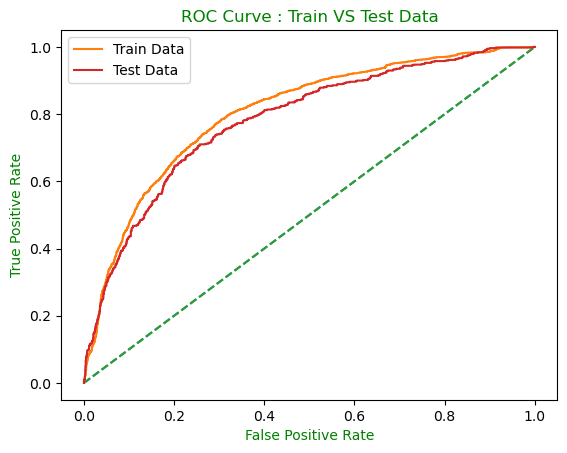

In [165]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = lgt_smote.predict_proba(X_train_smote)[:,1]
auc = metrics.roc_auc_score(y_train_smote,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data')

# AUC and ROC for the test data

# calculate AUC
probs1 = lgt_smote.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label='Test Data')

plt.title("ROC Curve : Train VS Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

Observations:

AUC for Train data is 81% and AUC for Test data is 79%.
The AUC & ROC curve shows that is covering almost the same area for Train and Test data. Therefore, this can be considered a good Generalized model.

In [166]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train_smote,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train_smote,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train_smote, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train_smote,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train_smote,lgt_smote.predict_proba(X_train_smote)[:,1]),
                          'auc_Test':roc_auc_score(y_test,lgt_smote.predict_proba(X_test)[:,1])},index=['Logistic Regression Smote' ])
Metrices_table = pd.concat([resultsDf,resultsDf1],axis=0)
Metrices_table
#resultsDf1

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907

## Hyperparameter Tuning

### Applying GridSearchCV for Logistic Regression:

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
grid = {'penalty':['l2'],
        'solver':['newton-cg','liblinear','lbfgs','sag'],
        'tol':[0.0001,0.00001]}

In [169]:
grid_search = GridSearchCV(estimator=lgt_model,param_grid=grid,cv=5,n_jobs=-1,scoring='f1',verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Users/kirubashankar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/kirubashankar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


iter  1 act 1.443e+03 pre 1.347e+03 delta 2.980e-01 f 4.370e+03 |g| 9.738e+03 CG   1
cg reaches trust region boundary
iter  2 act 1.773e+02 pre 1.712e+02 delta 5.841e-01 f 2.927e+03 |g| 1.393e+03 CG   2
cg reaches trust region boundary
iter  3 act 1.867e+02 pre 1.833e+02 delta 1.217e+00 f 2.750e+03 |g| 4.206e+02 CG   1
cg reaches trust region boundary
iter  4 act 1.544e+02 pre 1.487e+02 delta 1.341e+00 f 2.563e+03 |g| 2.403e+02 CG   3
cg reaches trust region boundary
iter  5 act 4.889e+01 pre 4.617e+01 delta 1.581e+00 f 2.409e+03 |g| 2.734e+02 CG   3
iter  6 act 2.274e+01 pre 2.224e+01 delta 1.581e+00 f 2.360e+03 |g| 9.934e+01 CG   8
iter  7 act 3.045e-01 pre 3.021e-01 delta 1.581e+00 f 2.337e+03 |g| 4.547e+01 CG   4
iter  8 act 7.137e-02 pre 7.122e-02 delta 1.581e+00 f 2.337e+03 |g| 3.041e+00 CG   9
iter  9 act 9.363e-05 pre 9.362e-05 delta 1.581e+00 f 2.337e+03 |g| 1.848e-01 CG  10
iter  1 act 1.433e+03 pre 1.338e+03 delta 2.970e-01 f 4.370e+03 |g| 9.702e+03 CG   1
cg reaches trust r

/Users/kirubashankar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/kirubashankar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/kirubashankar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/kirubashankar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Usin

|g| 1.060e+02 CG   8
iter  3 act 1.764e+02 pre 1.718e+02 delta 1.152e+00 f 2.761e+03 |g| 4.076e+02 CG   1
iter  7 act 1.577e-01 pre 1.570e-01 delta 1.508e+00 f 2.339e+03 |g| 4.726e+01 CG   2
cg reaches trust region boundary
iter  4 act 1.359e+02 pre 1.329e+02 delta 1.240e+00 f 2.585e+03 |g| 2.690e+02 CG   3
cg reaches trust region boundary
iter  5 act 4.125e+01 pre 3.946e+01 delta 1.366e+00 f 2.449e+03 |g| 2.561e+02 CG   3
iter  8 act 1.381e-01 pre 1.376e-01 delta 1.508e+00 f 2.339e+03 |g| 4.536e+00 CG   9
iter  6 act 2.417e+01 pre 2.323e+01 delta 1.366e+00 f 2.408e+03 |g| 1.028e+02 CG   8
iter  9 act 4.362e-05 pre 4.361e-05 delta 1.508e+00 f 2.339e+03 |g| 3.382e-01 CG   6
iter  7 act 2.608e-01 pre 2.587e-01 delta 1.366e+00 f 2.384e+03 |g| 4.764e+01 CG   4
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.37029D+03    |proj g|=  4.72700D+03
iter

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, n_jobs=-1,
                                          penalty=None, random_state=42,
                                          solver='newton-cg', verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['l2'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1', verbose=1)

In [170]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, random_state=42,
                   solver='newton-cg', verbose=True)


### Building model on Best parameters

In [171]:
best_model_lgt = grid_search.best_estimator_
best_model_lgt.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=-1, random_state=42,
                   solver='newton-cg', verbose=True)

**Accuracy of Train and Test data**

In [172]:
print("Accuracy on Train Data: ",best_model_lgt.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_lgt.score(X_test,y_test))

Accuracy on Train Data:  0.8409033240294341
Accuracy on Test Data:  0.8490230905861457


**Data Validation (over fitting or under fitting):**
* The Accuracy of both the Train data and Test data are almost same.Hence the model is neither Overfit nor Underfit.

**Predictions**

In [173]:
ytrain_pred = best_model_lgt.predict(X_train)
ytest_pred = best_model_lgt.predict(X_test)

**Classification Report**

In [174]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.85      0.97      0.91      6555
           1       0.59      0.18      0.28      1327

    accuracy                           0.84      7882
   macro avg       0.72      0.58      0.59      7882
weighted avg       0.81      0.84      0.80      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.86      0.98      0.91      2809
           1       0.65      0.22      0.33       569

    accuracy                           0.85      3378
   macro avg       0.76      0.60      0.62      3378
weighted avg       0.83      0.85      0.82      3378



### Confusion Matrix

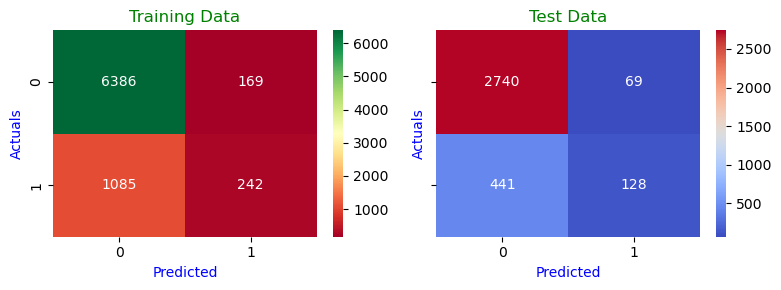

In [175]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 0.791
AUC for the Test Data: 0.785


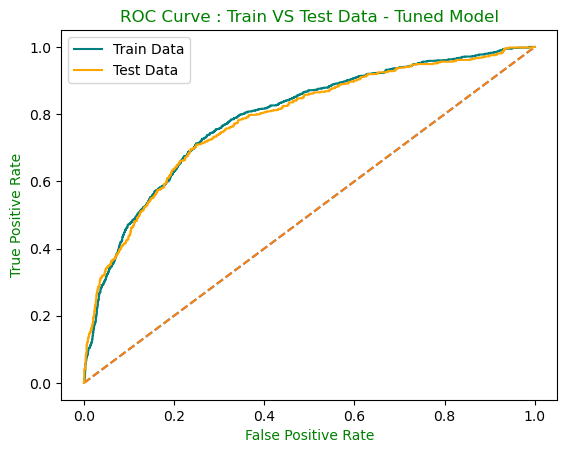

In [176]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = best_model_lgt.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = best_model_lgt.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data - Tuned Model",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Comparison Table**

In [177]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train,best_model_lgt.predict_proba(X_train)[:,1]),
                          'auc_Test':roc_auc_score(y_test,best_model_lgt.predict_proba(X_test)[:,1])},index=['Logistic Regression Tuned'])
#resultsDf
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232

## Linear Discriminant Analysis

In [178]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [179]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

**Accuracy of Train and Test data:**

In [180]:
print("Accuracy of the Training Data: ",lda_model.score(X_train,y_train))
print("Accuracy of the Test Data: ",lda_model.score(X_test,y_test))

Accuracy of the Training Data:  0.8467394062420706
Accuracy of the Test Data:  0.8549437537004144


**Data Validation (over fitting or under fitting)**
* The Accuracy of both the Train data and Test data are almost same .Hence the model is neither Overfit nor Underfit.


**Predictions on Train and Test dataset**

In [181]:
ytrain_pred = lda_model.predict(X_train)
ytest_pred = lda_model.predict(X_test)

**Classification Report**

In [182]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.86      0.97      0.91      6555
           1       0.62      0.23      0.33      1327

    accuracy                           0.85      7882
   macro avg       0.74      0.60      0.62      7882
weighted avg       0.82      0.85      0.82      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2809
           1       0.67      0.28      0.39       569

    accuracy                           0.85      3378
   macro avg       0.77      0.62      0.65      3378
weighted avg       0.84      0.85      0.83      3378



**Confusion Matrix**

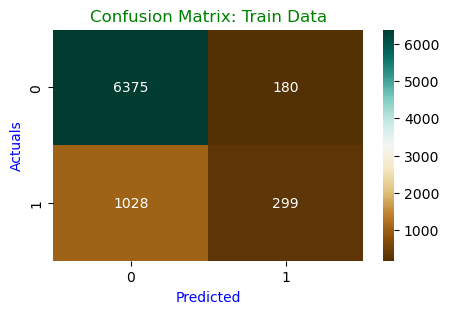

In [183]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.title("Confusion Matrix: Train Data",color='green')
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');

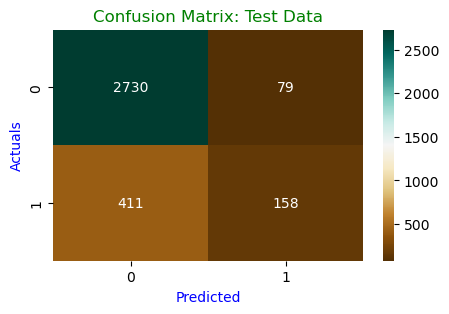

In [184]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.title("Confusion Matrix: Test Data",color='green')
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');

**AUC - ROC Curve : Train Data**

AUC: 0.785


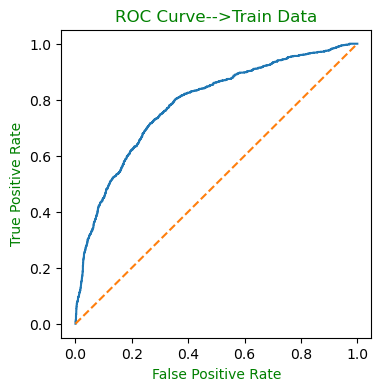

In [185]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**AUC - ROC Curve : Test Data**

AUC: 0.784


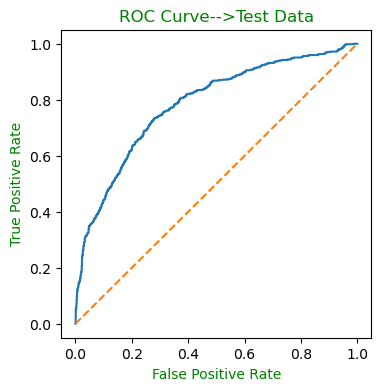

In [186]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_test,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**Comparison Table**

In [187]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1]),
                          'auc_Test':roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1])},index=['LDA' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table
#resultsDf1

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053

**Building LDA model on balanced dataset using SMOTE**

In [188]:
lda_smote = LinearDiscriminantAnalysis()
lda_smote.fit(X_train_smote,y_train_smote)

LinearDiscriminantAnalysis()

**Accuracy of Train and Test data:**

In [189]:
print("Accuracy of the Training Data: ",lda_smote.score(X_train_smote,y_train_smote))
print("Accuracy of the Test Data: ",lda_smote.score(X_test,y_test))

Accuracy of the Training Data:  0.738906808473542
Accuracy of the Test Data:  0.7687981053878035


**Data Validation (over fitting or under fitting)**
* The Accuracy of both the Train data and Test data are almost same .Hence the model is neither Overfit nor Underfit.


**Predictions**

In [190]:
ytrain_pred = lda_smote.predict(X_train_smote)
ytest_pred = lda_smote.predict(X_test)

**Classification Report**

In [191]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train_smote,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.76      0.79      0.78      6555
           1       0.71      0.67      0.69      4916

    accuracy                           0.74     11471
   macro avg       0.73      0.73      0.73     11471
weighted avg       0.74      0.74      0.74     11471
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.92      0.80      0.85      2809
           1       0.39      0.64      0.48       569

    accuracy                           0.77      3378
   macro avg       0.65      0.72      0.67      3378
weighted avg       0.83      0.77      0.79      3378



**Confusion Matrix : Train Data**

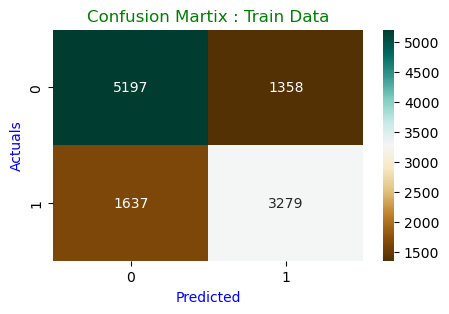

In [192]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_train_smote,ytrain_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Martix : Train Data",color='green');

**Confusion Matrix : Test Data**

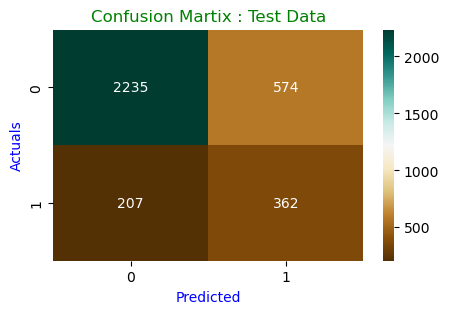

In [193]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Martix : Test Data",color='green');

**AUC - ROC Curve : Train Data**

AUC: 0.801


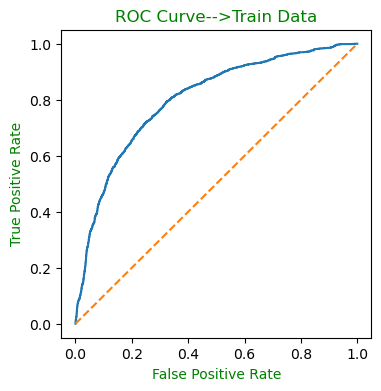

In [194]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lda_smote.predict_proba(X_train_smote)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train_smote,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_smote,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**AUC - ROC Curve : Test Data**

AUC: 0.784


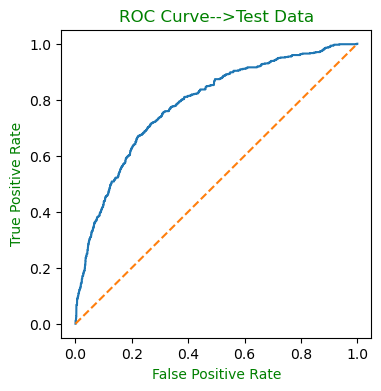

In [195]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = lda_smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_test,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**Comparison Table**

In [196]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train_smote,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train_smote,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train_smote, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train_smote,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train_smote,lda_smote.predict_proba(X_train_smote)[:,1]),
                          'auc_Test':roc_auc_score(y_test,lda_smote.predict_proba(X_test)[:,1])},index=['LDA Smote' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294

## Building LDA model using GridSearchCV

In [197]:
param_grid = { 'solver': [ 'lsqr', 'eigen'],
               'tol' : [0.0001,0.0002,0.0003],
               'shrinkage' : ['auto', 'None'],
    
              }    

In [198]:
grid_search = GridSearchCV(estimator = lda_model, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'None'],
                         'solver': ['lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='f1')

In [199]:
# getting best parameters used out of all the combinations given in grid search
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


**Building model on Best parameters**

In [200]:
best_model_lda = grid_search.best_estimator_
best_model_lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

**Accuracy of Train and Test Data**

In [201]:
print("Accuracy on Train Data: ",best_model_lda.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_lda.score(X_test,y_test))

Accuracy on Train Data:  0.8458513067749303
Accuracy on Test Data:  0.8537596210775606


**Data Validation (over fitting or under fitting)**
* The Accuracy of both the Train data and Test data are almost same .Hence the model is neither Overfit nor Underfit.



**Predictions**

In [202]:
ytrain_pred = best_model_lda.predict(X_train)
ytest_pred = best_model_lda.predict(X_test)

**Classification Report**

In [203]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.86      0.97      0.91      6555
           1       0.62      0.22      0.32      1327

    accuracy                           0.85      7882
   macro avg       0.74      0.60      0.62      7882
weighted avg       0.82      0.85      0.81      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2809
           1       0.66      0.27      0.38       569

    accuracy                           0.85      3378
   macro avg       0.77      0.62      0.65      3378
weighted avg       0.83      0.85      0.83      3378



**Confusion Matrix**

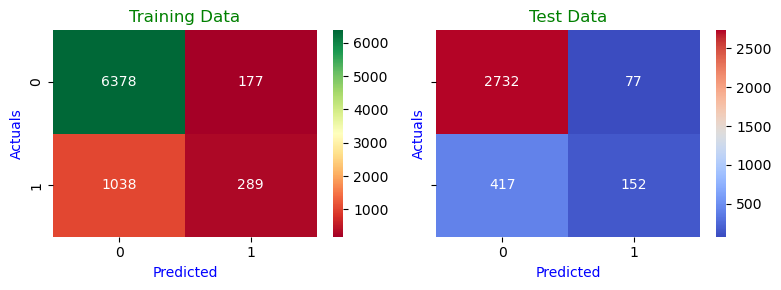

In [204]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 0.784
AUC for the Test Data: 0.784


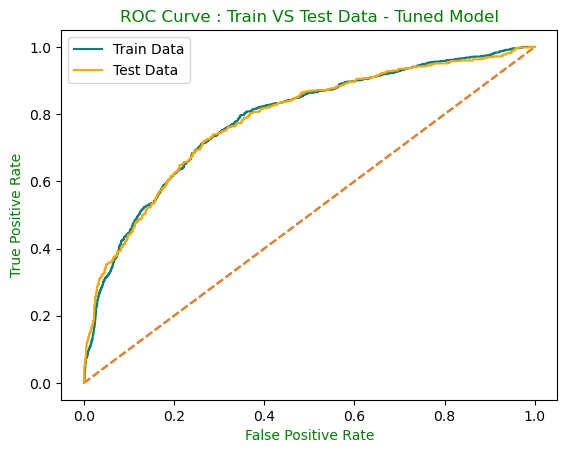

In [205]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = best_model_lda.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = best_model_lda.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data - Tuned Model",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Comparison Table**

In [206]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train,best_model_lda.predict_proba(X_train)[:,1]),
                          'auc_Test':roc_auc_score(y_test,best_model_lda.predict_proba(X_test)[:,1])},index=['LDA Tuned' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774

## K-nearest Neighbour (KNN Model)


In [207]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [208]:
# initiantiate learning model (k = 3)

knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
# fitting the model
knn_model3 = knn.fit(X_train,y_train)
# evaluate accuracy
print("For K = 3 -------> ")
print("Accuracy Score for Training Data is: ", knn_model3.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model3.score(X_test, y_test))


# initiantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
knn_model5 = knn.fit(X_train,y_train)
#print("Accuracy Score for K=5 is ", knn_model.score(X_test, y_test))
print("\nFor K = 5 -------> ")
print("Accuracy Score for Training Data is: ", knn_model5.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model5.score(X_test, y_test))


# initiantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors = 7,metric='euclidean')
knn_model7 =knn.fit(X_train,y_train)
#print("Accuracy Score for K=7 is ", knn_model.score(X_test, y_test))
print("\nFor K = 7 -------> ")
print("Accuracy Score for Training Data is: ", knn_model7.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model7.score(X_test, y_test))

# initiantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
knn_model9 = knn.fit(X_train,y_train)
print("\nFor K = 9 -------> ")
print("Accuracy Score for Training Data is: ", knn_model9.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_model9.score(X_test, y_test))

For K = 3 -------> 
Accuracy Score for Training Data is:  0.9662522202486679
Accuracy Score for Test Data is:  0.9174067495559503

For K = 5 -------> 
Accuracy Score for Training Data is:  0.9498858157827963
Accuracy Score for Test Data is:  0.9014209591474245

For K = 7 -------> 
Accuracy Score for Training Data is:  0.9364374524232428
Accuracy Score for Test Data is:  0.8919478981645944

For K = 9 -------> 
Accuracy Score for Training Data is:  0.9265414869322507
Accuracy Score for Test Data is:  0.8883955002960332


* Here K=3 is giving Better Accuracy.

**Building model with K=3 Neighbors.**

**Predictions**

In [209]:
ytrain_pred = knn_model3.predict(X_train)
ytest_pred = knn_model3.predict(X_test)

**Classification Report**

In [210]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6555
           1       0.92      0.88      0.90      1327

    accuracy                           0.97      7882
   macro avg       0.95      0.93      0.94      7882
weighted avg       0.97      0.97      0.97      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2809
           1       0.76      0.75      0.75       569

    accuracy                           0.92      3378
   macro avg       0.85      0.85      0.85      3378
weighted avg       0.92      0.92      0.92      3378



**Confusion Matrix**

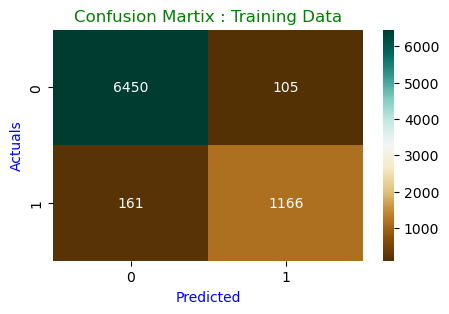

In [211]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Martix : Training Data",color='green');

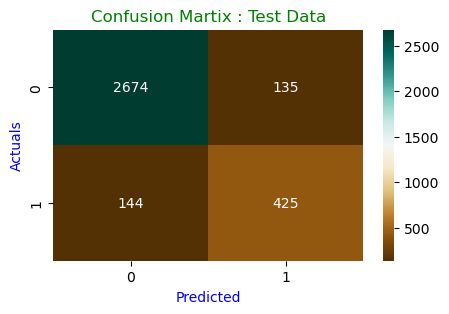

In [212]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Martix : Test Data",color='green');

**AUC - ROC Curve : Train Data**

AUC: 0.992


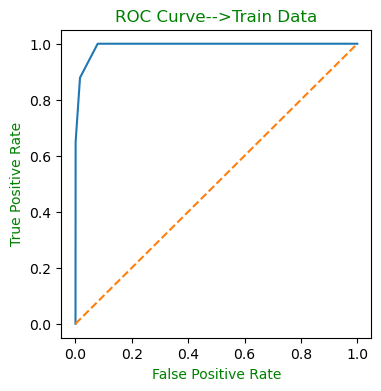

In [213]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = knn_model3.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**AUC - ROC Curve : Test Data**

AUC: 0.930


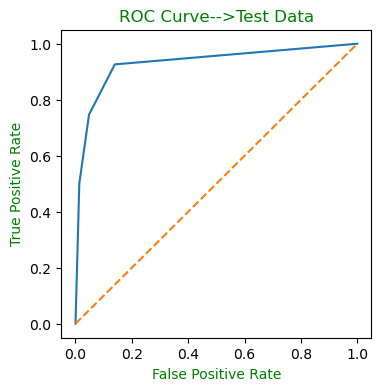

In [214]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = knn_model3.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_test,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**Comparison Table**

In [215]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train,knn_model3.predict_proba(X_train)[:,1]),
                          'auc_Test':roc_auc_score(y_test,knn_model3.predict_proba(X_test)[:,1])},index=['KNN_3' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162

**Cross Validation on KNN**

In [216]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print("Accuracy of each Fold  : \n ",scores)
print("\nAverage score : ",scores.mean())

Accuracy of each Fold  : 
  [0.95381883 0.94671403 0.95737123 0.95914742 0.96625222 0.94316163
 0.93694494 0.93161634 0.93516874 0.92273535]

Average score :  0.9452930728241562


In [217]:
k_range = list(range(1, 25))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9522202486678507, 0.9436056838365896, 0.9452930728241562, 0.9384547069271759, 0.9370337477797512, 0.9254884547069272, 0.9261101243339255, 0.9190053285968027, 0.921847246891652, 0.9126110124333927, 0.91145648312611, 0.9047957371225579, 0.9064831261101244, 0.8950266429840141, 0.8983126110124333, 0.8933392539964476, 0.8947602131438721, 0.8880994671403197, 0.8903197158081705, 0.8836589698046181, 0.886234458259325, 0.8821492007104796, 0.8828596802841918, 0.8785079928952042]


Text(0, 0.5, 'Cross-Validated-Accuracy')

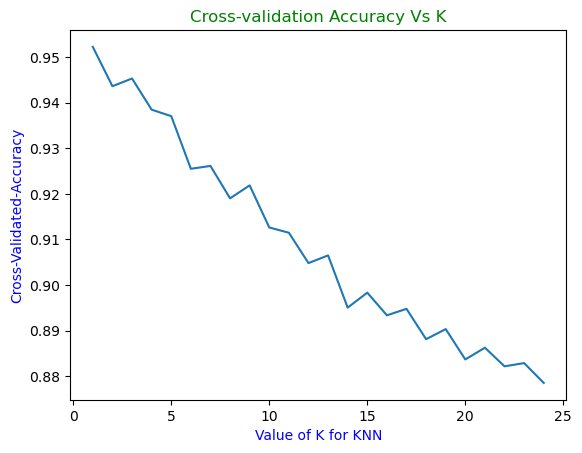

In [218]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)
plt.title("Cross-validation Accuracy Vs K",color='green')
plt.xlabel('Value of K for KNN',color='blue')
plt.ylabel('Cross-Validated-Accuracy',color='blue')

* The above visual representation helps us to understand the accuracy is ~96% for K=1 for KNN.

Let's Run the KNN with no of neighbours to be 1,3,5..29 and Find the optimal number of neighbours from K=1,3,5,7....29 using the Mis classification error


Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...29 and find the model with lowest MCE

In [219]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....29
for k in range(1,31,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
print("Misclassification Error")
MCE = [1 - x for x in ac_scores]
MCE

Misclassification Error


[0.06512729425695674,
 0.08259325044404975,
 0.09857904085257552,
 0.10805210183540559,
 0.1116044997039668,
 0.1181172291296625,
 0.1190053285968028,
 0.12078152753108351,
 0.12018946121965657,
 0.12611012433392543,
 0.1281823564239195,
 0.13351095322676143,
 0.13439905269390173,
 0.13587921847246887,
 0.1364712847838958]

**Plot misclassification error vs k (with k value on X-axis) using matplotlib**

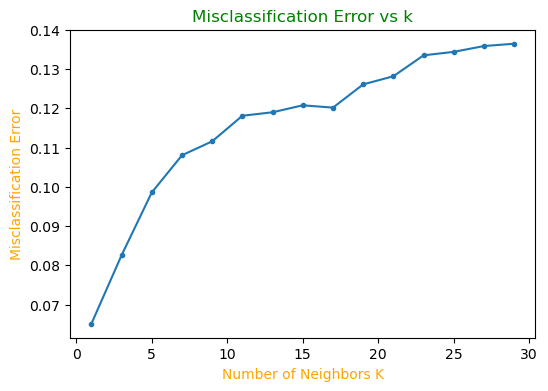

In [220]:
plt.figure(figsize=(6,4))
# plot misclassification error vs k
plt.plot(range(1,31,2), MCE,marker = '.')
plt.title("Misclassification Error vs k",color='green')
plt.xlabel('Number of Neighbors K',color = 'orange')
plt.ylabel('Misclassification Error',color='orange')
plt.show()

Observations

* MCE is low for K=1.

**Let's Build model on parameter K=1**

In [221]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

**Accuracy of Train and Test data**

In [222]:
print("Accuracy of Train data: ",knn_1.score(X_train,y_train))
print("Accuracy of Test data: ",knn_1.score(X_test,y_test))

Accuracy of Train data:  0.9914996193859427
Accuracy of Test data:  0.9348727057430433


**Data Validation (over fitting or under fitting)**

* The Accuracy of both the Train data and Test data are almost same .Hence the model is neither Overfit nor Underfit.

**Predictions**

In [223]:
ytrain_pred = knn_1.predict(X_train)
ytest_pred = knn_1.predict(X_test)

**Classification Report**

In [224]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred),'\n')

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      6555
           1       0.97      0.98      0.97      1327

    accuracy                           0.99      7882
   macro avg       0.98      0.99      0.98      7882
weighted avg       0.99      0.99      0.99      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2809
           1       0.80      0.83      0.81       569

    accuracy                           0.93      3378
   macro avg       0.88      0.89      0.89      3378
weighted avg       0.94      0.93      0.94      3378
 



**Confusion Matrix**

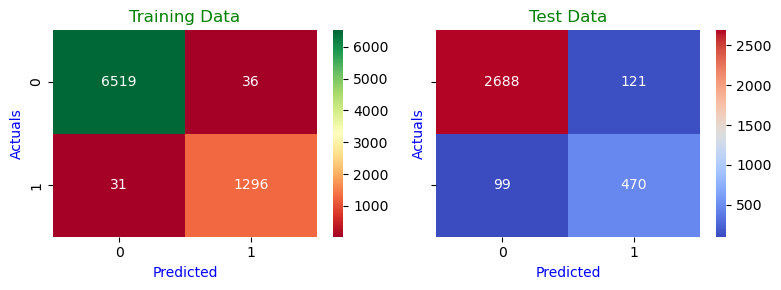

In [225]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')


#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Plotting AUC - ROC Curve**

AUC for the Training Data: 0.986
AUC for the Test Data: 0.891


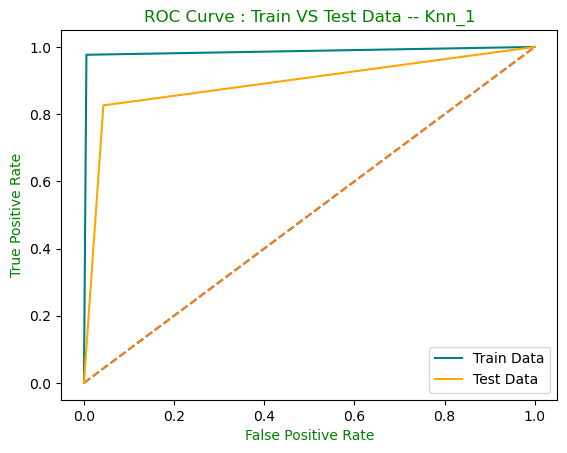

In [226]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = knn_1.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = knn_1.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data -- Knn_1",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Comparison Table**

In [227]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train,knn_1.predict_proba(X_train)[:,1]),
                          'auc_Test':roc_auc_score(y_test,knn_1.predict_proba(X_test)[:,1])},index=['KNN_1'])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467

## Building KNN model using SMOTE

In [228]:
# initiantiate learning model (k = 3)

knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
# fitting the model
knn_smote_3 = knn.fit(X_train_smote,y_train_smote)
# evaluate accuracy
print("For K = 3 -------> ")
print("Accuracy Score for Training Data is: ", knn_smote_3.score(X_train_smote, y_train_smote))
print("Accuracy Score for Test Data is: ", knn_smote_3.score(X_test, y_test))


# initiantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
knn_smote_5 = knn.fit(X_train_smote,y_train_smote)
#print("Accuracy Score for K=5 is ", knn_model.score(X_test, y_test))
print("\nFor K = 5 -------> ")
print("Accuracy Score for Training Data is: ", knn_smote_5.score(X_train_smote, y_train_smote))
print("Accuracy Score for Test Data is: ", knn_smote_5.score(X_test, y_test))


# initiantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors = 7,metric='euclidean')
knn_smote_7 =knn.fit(X_train_smote,y_train_smote)
#print("Accuracy Score for K=7 is ", knn_model.score(X_test, y_test))
print("\nFor K = 7 -------> ")
print("Accuracy Score for Training Data is: ", knn_smote_7.score(X_train_smote, y_train_smote))
print("Accuracy Score for Test Data is: ", knn_smote_7.score(X_test, y_test))

# initiantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
knn_smote_9 = knn.fit(X_train_smote,y_train_smote)
print("\nFor K = 9 -------> ")
print("Accuracy Score for Training Data is: ", knn_smote_9.score(X_train_smote, y_train_smote))
print("Accuracy Score for Test Data is: ", knn_smote_9.score(X_test, y_test))

For K = 3 -------> 
Accuracy Score for Training Data is:  0.9737599163106966
Accuracy Score for Test Data is:  0.9097098875074008

For K = 5 -------> 
Accuracy Score for Training Data is:  0.9601604044983001
Accuracy Score for Test Data is:  0.8937240970988751

For K = 7 -------> 
Accuracy Score for Training Data is:  0.9492633597768285
Accuracy Score for Test Data is:  0.87951450562463

For K = 9 -------> 
Accuracy Score for Training Data is:  0.9388893732019876
Accuracy Score for Test Data is:  0.8724097098875074


* Here theAccuracy is Good for K = 3.

**Building Model with K=3 neighbors.**

**Predictions**

In [229]:
ytrain_pred = knn_smote_3.predict(X_train_smote)
ytest_pred = knn_smote_3.predict(X_test)

**Classification Report**

In [230]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train_smote,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.99      0.97      0.98      6555
           1       0.96      0.98      0.97      4916

    accuracy                           0.97     11471
   macro avg       0.97      0.97      0.97     11471
weighted avg       0.97      0.97      0.97     11471
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.97      0.92      0.94      2809
           1       0.69      0.85      0.76       569

    accuracy                           0.91      3378
   macro avg       0.83      0.89      0.85      3378
weighted avg       0.92      0.91      0.91      3378



**Confusion Matrix**

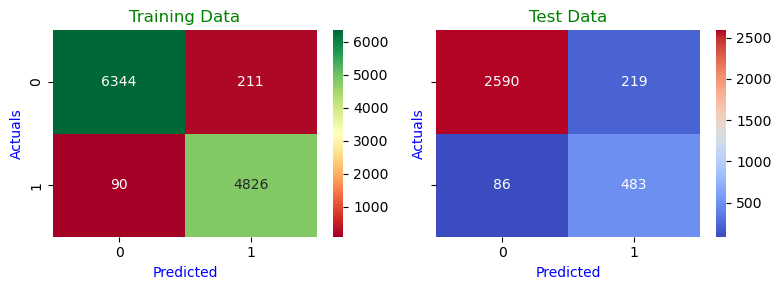

In [231]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#fig.figsize=(5,5)
#plt.figure(figsize=(5,5))
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train_smote,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**AUC - ROC Curve : Train data**

AUC for the Training Data: 0.998
AUC for the Test Data: 0.935


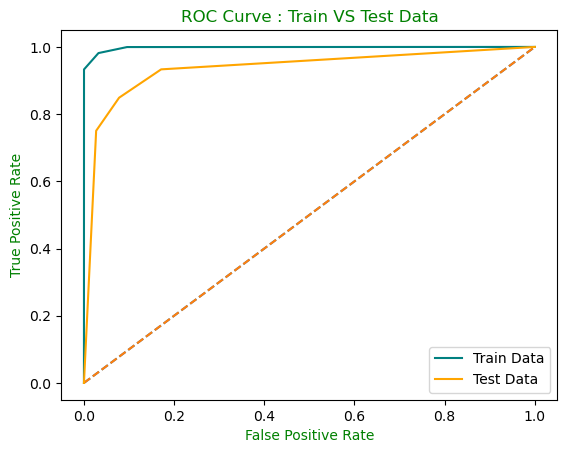

In [232]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = knn_smote_3.predict_proba(X_train_smote)[:,1]
auc = metrics.roc_auc_score(y_train_smote,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = knn_smote_3.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Comparison Table**

In [233]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train_smote,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train_smote,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train_smote, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train_smote,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train_smote,knn_smote_3.predict_proba(X_train_smote)[:,1]),
                          'auc_Test':roc_auc_score(y_test,knn_smote_3.predict_proba(X_test)[:,1])},index=['KNN_3 Smote' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   
KNN_3 Smote                      0.973760       0.909710      0.981692   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   
KNN_3 Smote                   0.848858         0.958110        0.688034   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                0.969758  0.760031   0.997777  0.935059

## GridSearchCV for KNearestNeighbours(KNN):


In [234]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [235]:
knn_grid = {'n_neighbors': list(range(1,10)),'weights':['uniform', 'distance'],
            'metric':['minkowski','euclidean','manhattan'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search = GridSearchCV(estimator=knn,param_grid=knn_grid,cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [236]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


**Building models on Best parametrs**

In [237]:
best_model_knn = grid_search.best_estimator_
best_model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

**Accuracy of Train and Test Data**

In [238]:
print("Accuracy Score for Training Data is: ", best_model_knn.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", best_model_knn.score(X_test, y_test))

Accuracy Score for Training Data is:  0.9925145902055316
Accuracy Score for Test Data is:  0.9378330373001776


**Data validation (over fitting or under fitting):**

* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Predictions**

In [239]:
ytrain_pred = best_model_knn.predict(X_train)
ytest_pred = best_model_knn.predict(X_test)

**Classification Report**

In [240]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6555
           1       0.99      0.96      0.98      1327

    accuracy                           0.99      7882
   macro avg       0.99      0.98      0.99      7882
weighted avg       0.99      0.99      0.99      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2809
           1       0.83      0.80      0.81       569

    accuracy                           0.94      3378
   macro avg       0.89      0.88      0.89      3378
weighted avg       0.94      0.94      0.94      3378



**Confusion Matrix**

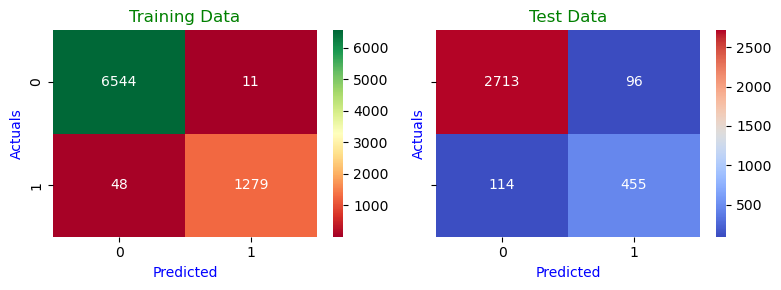

In [241]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 1.000
AUC for the Test Data: 0.948


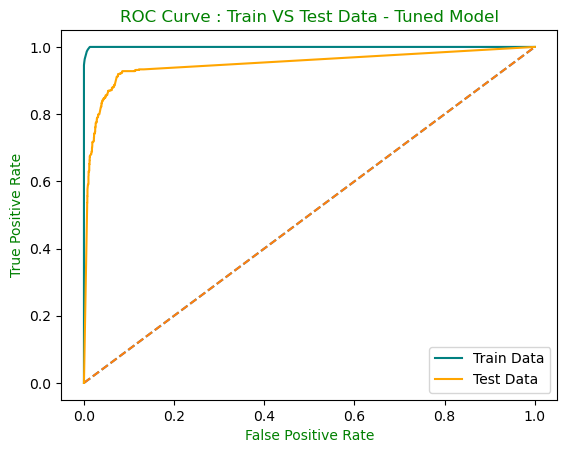

In [242]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = best_model_knn.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = best_model_knn.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data - Tuned Model",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Comparison Table**

In [243]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train,best_model_knn.predict(X_train)),
                          'auc_Test':roc_auc_score(y_test,best_model_knn.predict(X_test))},index=['KNN Tuned' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   
KNN_3 Smote                      0.973760       0.909710      0.981692   
KNN Tuned                        0.992515       0.937833      0.963828   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   
KNN_3 Smote                   0.848858         0.958110        0.688034   
KNN Tuned                     0.799649         0.991473        0.825771   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                0.969758  0.760031   0.997777  0.935059  
KNN Tuned                  0.977455  0.812500   0.981075  0.882736

## Naive Bayes Model

In [244]:
from sklearn.naive_bayes import GaussianNB

In [245]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

**Accuracy of the Train and Test data**

In [246]:
print("Accuracy Score for Training Data is: ", NB_model.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", NB_model.score(X_test, y_test))

Accuracy Score for Training Data is:  0.8563816290281654
Accuracy Score for Test Data is:  0.8475429248075784


* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Predictions**

In [247]:
ytrain_pred = NB_model.predict(X_train)
ytest_pred = NB_model.predict(X_test)

**Classification Report**

In [248]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.91      0.92      0.91      6555
           1       0.58      0.56      0.57      1327

    accuracy                           0.86      7882
   macro avg       0.74      0.74      0.74      7882
weighted avg       0.85      0.86      0.86      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2809
           1       0.55      0.55      0.55       569

    accuracy                           0.85      3378
   macro avg       0.73      0.73      0.73      3378
weighted avg       0.85      0.85      0.85      3378



**Confusion Matrix**

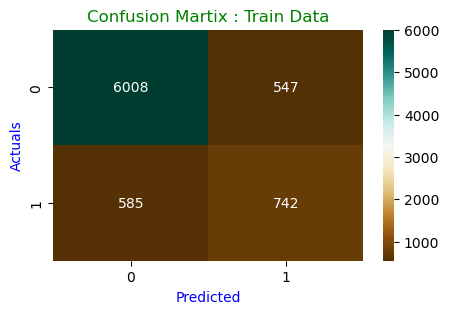

In [249]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Martix : Train Data",color='green');

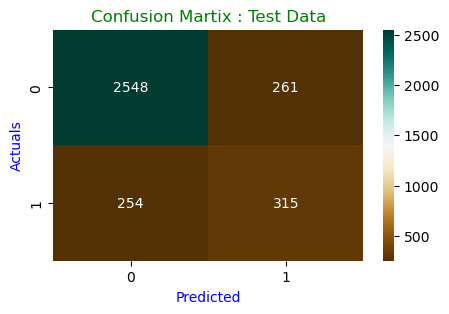

In [250]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Martix : Test Data",color='green');

**AUC - ROC Curve : Train Data**

AUC: 0.820


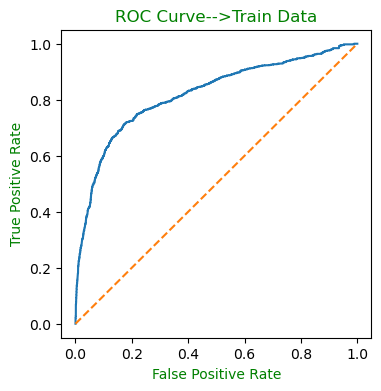

In [251]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**AUC - ROC Curve : Test Data**

AUC: 0.809


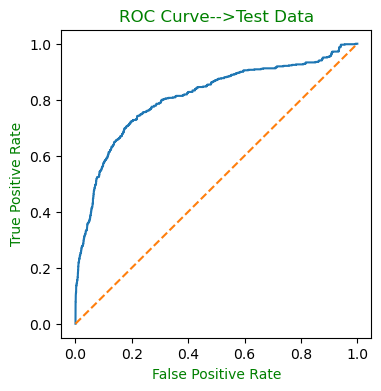

In [252]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_test,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**Comparison Table**

In [253]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train,NB_model.predict_proba(X_train)[:,1]),
                          'auc_Test':roc_auc_score(y_test,NB_model.predict_proba(X_test)[:,1])},index=['Naive Bayes Classifier' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   
KNN_3 Smote                      0.973760       0.909710      0.981692   
KNN Tuned                        0.992515       0.937833      0.963828   
Naive Bayes Classifier           0.856382       0.847543      0.559156   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   
KNN_3 Smote                   0.848858         0.958110        0.688034   
KNN Tuned                     0.799649         0.991473        0.825771   
Naive Bayes Classifier        0.553603         0.575640        0.546875   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                0.969758  0.760031   0.997777  0.935059  
KNN Tuned                  0.977455  0.812500   0.981075  0.882736  
Naive Bayes Classifier     0.567278  0.550218   0.819871  0.809155

## Building Naive Bayes model using SMOTE

In [254]:
NB_smote = GaussianNB()
NB_smote.fit(X_train_smote,y_train_smote)

GaussianNB()

**Accuracy of the Train and Test data**

In [255]:
print("Accuracy Score for Training Data is: ", NB_smote.score(X_train_smote, y_train_smote))
print("Accuracy Score for Test Data is: ", NB_smote.score(X_test, y_test))

Accuracy Score for Training Data is:  0.726614942027722
Accuracy Score for Test Data is:  0.6714031971580817


* The Accuracy of Train data is more than the Test data,Hence our model is slightly Overfit.

**Predictions**

In [256]:
ytrain_pred = NB_smote.predict(X_train_smote)
ytest_pred = NB_smote.predict(X_test)

**Classification Report**

In [257]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train_smote,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.83      0.65      0.73      6555
           1       0.64      0.83      0.72      4916

    accuracy                           0.73     11471
   macro avg       0.74      0.74      0.73     11471
weighted avg       0.75      0.73      0.73     11471
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.94      0.64      0.77      2809
           1       0.32      0.81      0.45       569

    accuracy                           0.67      3378
   macro avg       0.63      0.73      0.61      3378
weighted avg       0.84      0.67      0.71      3378



**Confusion Matrix**

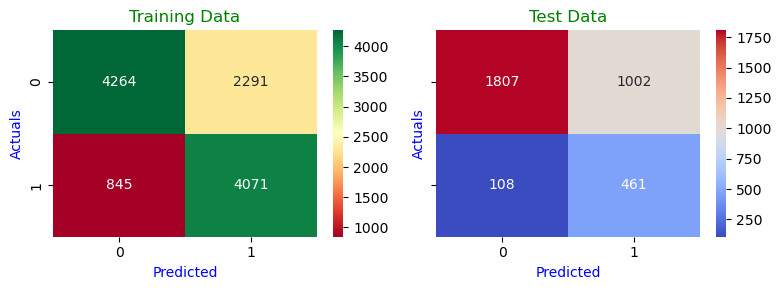

In [258]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train_smote,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 0.834
AUC for the Test Data: 0.804


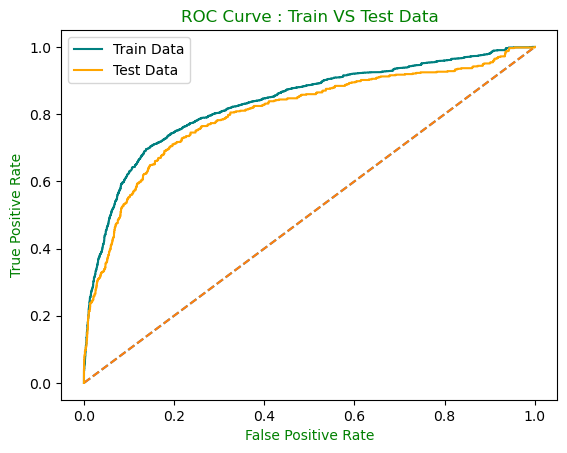

In [259]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = NB_smote.predict_proba(X_train_smote)[:,1]
auc = metrics.roc_auc_score(y_train_smote,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = NB_smote.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Comparison Table**

In [260]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train_smote,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train_smote,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train_smote, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train_smote,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train_smote,NB_smote.predict_proba(X_train_smote)[:,1]),
                          'auc_Test':roc_auc_score(y_test,NB_smote.predict_proba(X_test)[:,1])},index=['Naive Bayes Smote' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   
KNN_3 Smote                      0.973760       0.909710      0.981692   
KNN Tuned                        0.992515       0.937833      0.963828   
Naive Bayes Classifier           0.856382       0.847543      0.559156   
Naive Bayes Smote                0.726615       0.671403      0.828112   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   
KNN_3 Smote                   0.848858         0.958110        0.688034   
KNN Tuned                     0.799649         0.991473        0.825771   
Naive Bayes Classifier        0.553603         0.575640        0.546875   
Naive Bayes Smote             0.810193         0.639893        0.315106   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                0.969758  0.760031   0.997777  0.935059  
KNN Tuned                  0.977455  0.812500   0.981075  0.882736  
Naive Bayes Classifier     0.567278  0.550218   0.819871  0.809155  
Naive Bayes Smote          0.721937  0.453740   0.834328  0.803815

## Random Forest

In [261]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
RF_model = RandomForestClassifier(n_estimators=100,random_state=42)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

**Accuracy of Train and Test data**

In [263]:
print("Accuracy on Training data: ",RF_model.score(X_train,y_train))
print("Accuracy on Test data: ",RF_model.score(X_test,y_test))

Accuracy on Training data:  0.9926414615579802
Accuracy on Test data:  0.9484902309058615


**Predictions**

In [264]:
ytrain_pred = RF_model.predict(X_train)
ytest_pred = RF_model.predict(X_test)

**Classification Report**

In [265]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6555
           1       0.99      0.97      0.98      1327

    accuracy                           0.99      7882
   macro avg       0.99      0.98      0.99      7882
weighted avg       0.99      0.99      0.99      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.89      0.79      0.84       569

    accuracy                           0.95      3378
   macro avg       0.92      0.89      0.90      3378
weighted avg       0.95      0.95      0.95      3378



**Confusion Matrix**

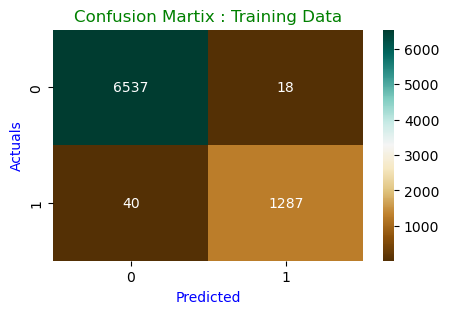

In [266]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Martix : Training Data",color='green');

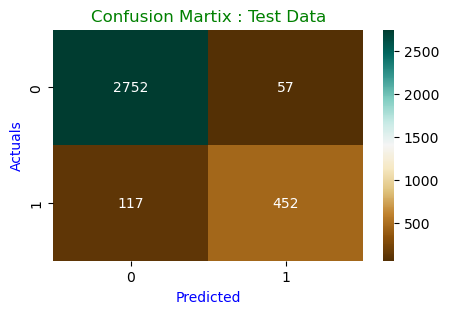

In [267]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Martix : Test Data",color='green');

**AUC - ROC Curve : Train Data**

AUC: 1.000


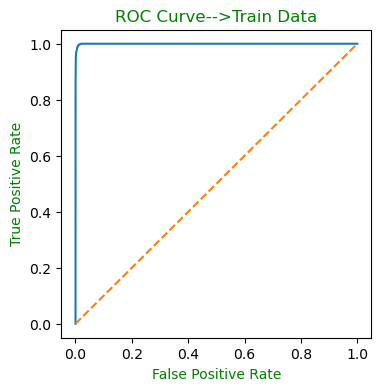

In [268]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**AUC - ROC Curve : Test Data**

AUC: 0.972


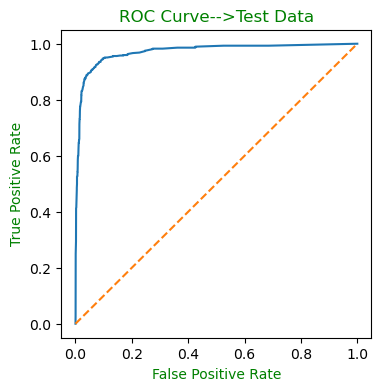

In [269]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_test,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**Feature importance of Random Forest**

In [270]:
imp = pd.DataFrame(RF_model.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
imp

Imp
CC_Agent_Score           0.128830
Tenure_Cat               0.122575
Payment                  0.121315
Complain_ly              0.086884
coupon_used_for_payment  0.084455
account_segment          0.081010
Marital_Status           0.072144
CC_Contacted_LY_cat      0.068848
Revenue_Cat              0.057093
Gender                   0.053288
City_Tier                0.049568
Login_device             0.044066
cashback_category        0.023288
CC_connect_category      0.006638

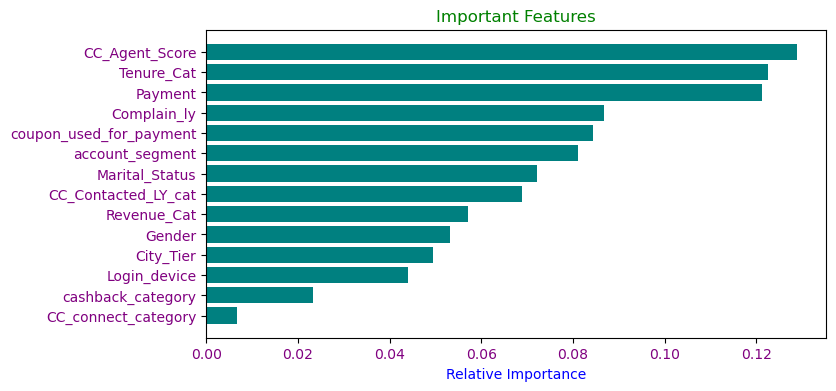

In [271]:
imp = RF_model.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))

plt.barh(range(len(indices)), imp[indices], color="teal")
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

* The 1st Five Important Features of Random Forest Model are:CC_Agent_Score,Tenure_Cat,Payment,Complain_ly and coupon_used_for_payment.

**Comparison Table**

In [272]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train,RF_model.predict_proba(X_train)[:,1]),
                          'auc_Test':roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1])},index=['Random Forest'])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   
KNN_3 Smote                      0.973760       0.909710      0.981692   
KNN Tuned                        0.992515       0.937833      0.963828   
Naive Bayes Classifier           0.856382       0.847543      0.559156   
Naive Bayes Smote                0.726615       0.671403      0.828112   
Random Forest                    0.992641       0.948490      0.969857   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   
KNN_3 Smote                   0.848858         0.958110        0.688034   
KNN Tuned                     0.799649         0.991473        0.825771   
Naive Bayes Classifier        0.553603         0.575640        0.546875   
Naive Bayes Smote             0.810193         0.639893        0.315106   
Random Forest                 0.794376         0.986207        0.888016   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                0.969758  0.760031   0.997777  0.935059  
KNN Tuned                  0.977455  0.812500   0.981075  0.882736  
Naive Bayes Classifier     0.567278  0.550218   0.819871  0.809155  
Naive Bayes Smote          0.721937  0.453740   0.834328  0.803815  
Random Forest              0.977964  0.838590   0.999685  0.972175

**Cross Validation**

In [273]:
scores = cross_val_score(RF_model, X, y, cv=10, scoring='accuracy')
print("Accuracy of Each Fold: \n",scores)
print("\nAverage Accuracy : ",scores.mean())

Accuracy of Each Fold: 
 [0.96447602 0.96536412 0.97158082 0.96536412 0.96714032 0.96714032
 0.95914742 0.94937833 0.96269982 0.95115453]

Average Accuracy :  0.9623445825932505


## Building Random forest model over balanced dataset


In [274]:
rf_smote = RandomForestClassifier(n_estimators=500,random_state=42)
rf_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier(n_estimators=500, random_state=42)

**Accuracy of Train and Test data**

In [275]:
print("Accuracy on Train data: ",rf_smote.score(X_train_smote,y_train_smote))
print("Accuracy on Test data: ",rf_smote.score(X_test,y_test))

Accuracy on Train data:  0.9940720076715195
Accuracy on Test data:  0.9473060982830077


**model validation (over fitting or under fitting):**

* There is not much difference between Train and Test Accuracy, Hence our model is Neither Overfit nor Underfit.

**Predictions**

In [276]:
ytrain_pred = rf_smote.predict(X_train_smote)
ytest_pred = rf_smote.predict(X_test)

**Classification Report**

In [277]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train_smote,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      6555
           1       0.99      0.99      0.99      4916

    accuracy                           0.99     11471
   macro avg       0.99      0.99      0.99     11471
weighted avg       0.99      0.99      0.99     11471
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.96      0.97      0.97      2809
           1       0.86      0.82      0.84       569

    accuracy                           0.95      3378
   macro avg       0.91      0.90      0.90      3378
weighted avg       0.95      0.95      0.95      3378



**Confusion Matrix**

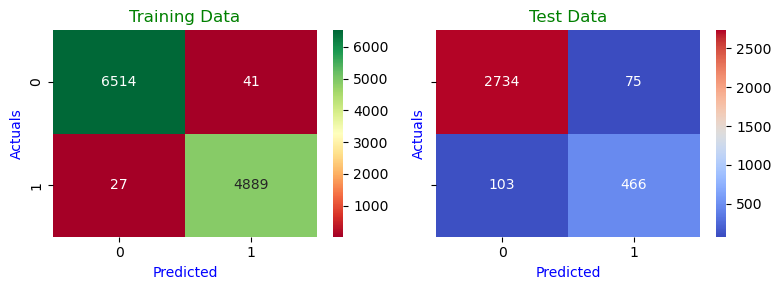

In [278]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train_smote,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 1.000
AUC for the Test Data: 0.970


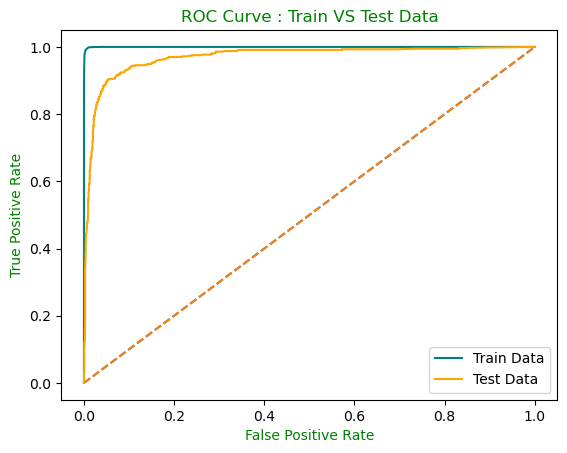

In [279]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = rf_smote.predict_proba(X_train_smote)[:,1]
auc = metrics.roc_auc_score(y_train_smote,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = rf_smote.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Comparison Table**

In [280]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train_smote,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train_smote,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train_smote, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train_smote,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train_smote,rf_smote.predict_proba(X_train_smote)[:,1]),
                          'auc_Test':roc_auc_score(y_test,rf_smote.predict_proba(X_test)[:,1])},index=['Random Forest Smote' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   
KNN_3 Smote                      0.973760       0.909710      0.981692   
KNN Tuned                        0.992515       0.937833      0.963828   
Naive Bayes Classifier           0.856382       0.847543      0.559156   
Naive Bayes Smote                0.726615       0.671403      0.828112   
Random Forest                    0.992641       0.948490      0.969857   
Random Forest Smote              0.994072       0.947306      0.994508   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   
KNN_3 Smote                   0.848858         0.958110        0.688034   
KNN Tuned                     0.799649         0.991473        0.825771   
Naive Bayes Classifier        0.553603         0.575640        0.546875   
Naive Bayes Smote             0.810193         0.639893        0.315106   
Random Forest                 0.794376         0.986207        0.888016   
Random Forest Smote           0.818981         0.991684        0.861368   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                0.969758  0.760031   0.997777  0.935059  
KNN Tuned                  0.977455  0.812500   0.981075  0.882736  
Naive Bayes Classifier     0.567278  0.550218   0.819871  0.809155  
Naive Bayes Smote          0.721937  0.453740   0.834328  0.803815  
Random Forest              0.977964  0.838590   0.999685  0.972175  
Random Forest Smote        0.993094  0.839640   0.999839  0.969926

## Applying GridSearchCV on Random Forest

In [281]:
Param_grid = {
              'min_samples_split' : [10,20,30],
              'min_samples_leaf':[5,10,15],
              'max_depth':[5,10,15,20],'max_features' : ["sqrt", "log2"],
              'n_estimators':[50,100,150]
             }

In [282]:
grid_search = GridSearchCV(estimator=RF_model,param_grid=Param_grid,cv=5)
grid_search.fit(X_train,y_train)

convergence after 38 epochs took 0 seconds
Epoch 1, change: 1.00000000
Epoch 2, change: 0.52988153
Epoch 3, change: 0.50588160
Epoch 4, change: 0.38998404
Epoch 5, change: 0.67000002
Epoch 6, change: 0.29271290
Epoch 7, change: 0.33858218
Epoch 8, change: 0.32235095
Epoch 9, change: 0.12621871
Epoch 10, change: 0.07690584
Epoch 11, change: 0.03634888
Epoch 12, change: 0.02704882
Epoch 13, change: 0.01833496
Epoch 14, change: 0.01595690
Epoch 15, change: 0.01366303
Epoch 16, change: 0.01215189
Epoch 17, change: 0.00790703
Epoch 18, change: 0.00369525
Epoch 19, change: 0.00242696
Epoch 20, change: 0.00132413
Epoch 21, change: 0.00064870
Epoch 22, change: 0.00061804
Epoch 23, change: 0.00076268
Epoch 24, change: 0.00055455
Epoch 25, change: 0.00040658
Epoch 26, change: 0.00027330
Epoch 27, change: 0.00025009
Epoch 28, change: 0.00017897
Epoch 29, change: 0.00016600
Epoch 30, change: 0.00015564
Epoch 31, change: 0.00008973
Epoch 32, change: 0.00007010
Epoch 33, change: 0.00004562
Epoch 34,

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [50, 100, 150]})

In [283]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150} 

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=150, random_state=42)


**Building model on best parameters**

In [284]:
best_modelRF = grid_search.best_estimator_
best_modelRF.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=150, random_state=42)

**Accuracy of Train and Test Data**

In [285]:
print("Accuracy on Train data: ",best_modelRF.score(X_train,y_train))
print("Accuracy on Test data: ",best_modelRF.score(X_test,y_test))

Accuracy on Train data:  0.9248921593504187
Accuracy on Test data:  0.8975725281231498


**model validation (over fitting or under fitting):**

* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Predictions**

In [286]:
ytrain_pred = best_modelRF.predict(X_train)
ytest_pred = best_modelRF.predict(X_test)

**Classification Report**

In [287]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.92      0.99      0.96      6555
           1       0.93      0.60      0.73      1327

    accuracy                           0.92      7882
   macro avg       0.93      0.79      0.84      7882
weighted avg       0.93      0.92      0.92      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2809
           1       0.83      0.49      0.62       569

    accuracy                           0.90      3378
   macro avg       0.87      0.73      0.78      3378
weighted avg       0.89      0.90      0.89      3378



**Confusion Matrix**

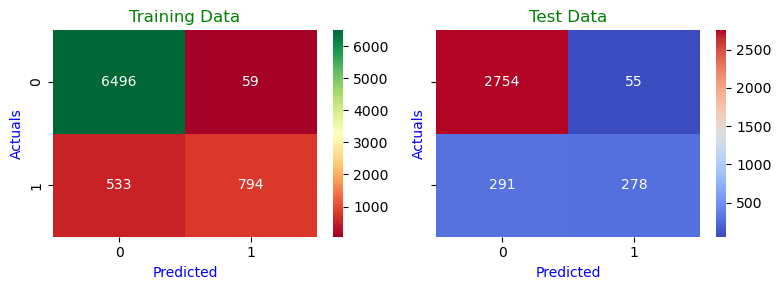

In [288]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 0.981
AUC for the Test Data: 0.952


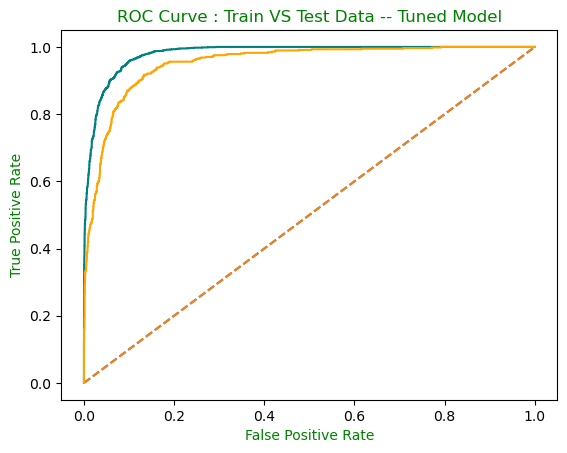

In [289]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = best_modelRF.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = best_modelRF.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data -- Tuned Model",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.show()

**Feature Importance**

In [290]:
best_modelRF.feature_importances_

array([0.04659598, 0.08773611, 0.03981875, 0.09880408, 0.10721524,
       0.08938932, 0.13849345, 0.04653974, 0.03498042, 0.19578376,
       0.05103655, 0.03562397, 0.00390318, 0.02407945])

In [291]:
imp = pd.DataFrame(best_modelRF.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
imp

Imp
Tenure_Cat               0.195784
Complain_ly              0.138493
CC_Agent_Score           0.107215
account_segment          0.098804
Marital_Status           0.089389
Payment                  0.087736
CC_Contacted_LY_cat      0.051037
City_Tier                0.046596
coupon_used_for_payment  0.046540
Gender                   0.039819
Revenue_Cat              0.035624
Login_device             0.034980
cashback_category        0.024079
CC_connect_category      0.003903

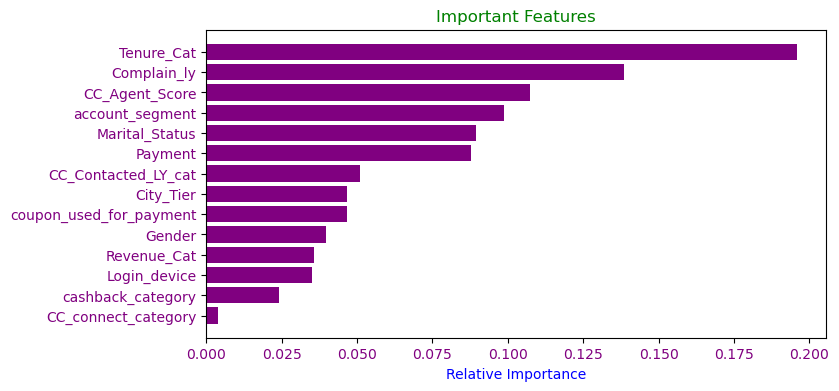

In [292]:
imp = best_modelRF.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))

plt.barh(range(len(indices)), imp[indices], color="purple")
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

**Comparison Table**

In [293]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                           'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                           'recall_Train':recall_score(y_train,ytrain_pred),
                           'recall_Test':recall_score(y_test,ytest_pred),
                           'precision_Train': precision_score(y_train, ytrain_pred),
                           'precision_Test': precision_score(y_test, ytest_pred),  
                           'f1_Train': f1_score(y_train,ytrain_pred),
                           'f1_Test': f1_score(y_test,ytest_pred),
                           'auc_Train':roc_auc_score(y_train,best_modelRF.predict_proba(X_train)[:,1]),
                           'auc_Test':roc_auc_score(y_test,best_modelRF.predict_proba(X_test)[:,1])},index=['Random Forest Tuned'])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   
KNN_3 Smote                      0.973760       0.909710      0.981692   
KNN Tuned                        0.992515       0.937833      0.963828   
Naive Bayes Classifier           0.856382       0.847543      0.559156   
Naive Bayes Smote                0.726615       0.671403      0.828112   
Random Forest                    0.992641       0.948490      0.969857   
Random Forest Smote              0.994072       0.947306      0.994508   
Random Forest Tuned              0.924892       0.897573      0.598342   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   
KNN_3 Smote                   0.848858         0.958110        0.688034   
KNN Tuned                     0.799649         0.991473        0.825771   
Naive Bayes Classifier        0.553603         0.575640        0.546875   
Naive Bayes Smote             0.810193         0.639893        0.315106   
Random Forest                 0.794376         0.986207        0.888016   
Random Forest Smote           0.818981         0.991684        0.861368   
Random Forest Tuned           0.488576         0.930832        0.834835   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                0.969758  0.760031   0.997777  0.935059  
KNN Tuned                  0.977455  0.812500   0.981075  0.882736  
Naive Bayes Classifier     0.567278  0.550218   0.819871  0.809155  
Naive Bayes Smote          0.721937  0.453740   0.834328  0.803815  
Random Forest              0.977964  0.838590   0.999685  0.972175  
Random Forest Smote        0.993094  0.839640   0.999839  0.969926  
Random Forest Tuned        0.728440  0.616408   0.980577  0.951711

## Bagging Classifier

In [294]:
from sklearn.ensemble import BaggingClassifier

In [295]:
bgcl = BaggingClassifier(random_state=42)
bgcl.fit(X_train, y_train)

BaggingClassifier(random_state=42)

**Accuracy of Train and Test Dataset**

In [296]:
print("Accuracy of Train Data  : ",bgcl.score(X_train,y_train))
print("Accuracy of Test Data  : ",bgcl.score(X_test,y_test))

Accuracy of Train Data  :  0.9888353209845216
Accuracy of Test Data  :  0.9464179988158674


* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Predictions**

In [297]:
ytrain_pred = bgcl.predict(X_train)
ytest_pred = bgcl.predict(X_test)

**Classification Report**

In [298]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred),'\n')

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6555
           1       0.98      0.95      0.97      1327

    accuracy                           0.99      7882
   macro avg       0.99      0.97      0.98      7882
weighted avg       0.99      0.99      0.99      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.96      0.97      0.97      2809
           1       0.86      0.81      0.84       569

    accuracy                           0.95      3378
   macro avg       0.91      0.89      0.90      3378
weighted avg       0.95      0.95      0.95      3378
 



**Confusion Matrix**

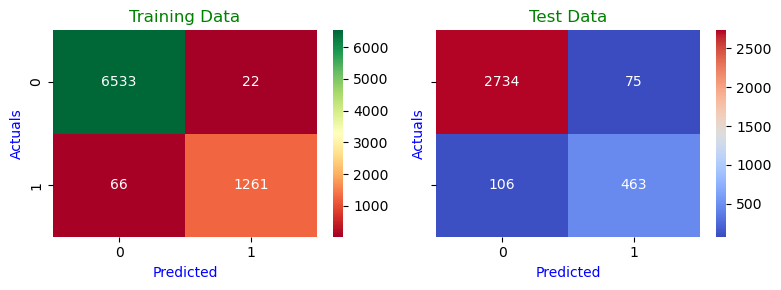

In [299]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**AUC -ROC Curve : Train Data**

AUC: 0.999


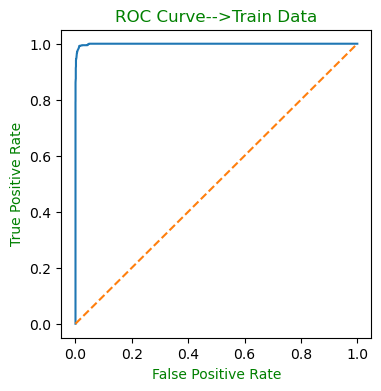

In [300]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**AUC - ROC Curve : Test data**

AUC: 0.956


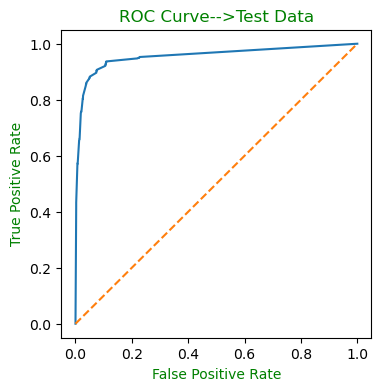

In [301]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_test,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**Comparison Table**

In [302]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                           'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                           'recall_Train':recall_score(y_train,ytrain_pred),
                           'recall_Test':recall_score(y_test,ytest_pred),
                           'precision_Train': precision_score(y_train, ytrain_pred),
                           'precision_Test': precision_score(y_test, ytest_pred),  
                           'f1_Train': f1_score(y_train,ytrain_pred),
                           'f1_Test': f1_score(y_test,ytest_pred),
                           'auc_Train':roc_auc_score(y_train,bgcl.predict_proba(X_train)[:,1]),
                           'auc_Test':roc_auc_score(y_test,bgcl.predict_proba(X_test)[:,1])},index=['Bagging Classifier'])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   
KNN_3 Smote                      0.973760       0.909710      0.981692   
KNN Tuned                        0.992515       0.937833      0.963828   
Naive Bayes Classifier           0.856382       0.847543      0.559156   
Naive Bayes Smote                0.726615       0.671403      0.828112   
Random Forest                    0.992641       0.948490      0.969857   
Random Forest Smote              0.994072       0.947306      0.994508   
Random Forest Tuned              0.924892       0.897573      0.598342   
Bagging Classifier               0.988835       0.946418      0.950264   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   
KNN_3 Smote                   0.848858         0.958110        0.688034   
KNN Tuned                     0.799649         0.991473        0.825771   
Naive Bayes Classifier        0.553603         0.575640        0.546875   
Naive Bayes Smote             0.810193         0.639893        0.315106   
Random Forest                 0.794376         0.986207        0.888016   
Random Forest Smote           0.818981         0.991684        0.861368   
Random Forest Tuned           0.488576         0.930832        0.834835   
Bagging Classifier            0.813708         0.982853        0.860595   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                0.969758  0.760031   0.997777  0.935059  
KNN Tuned                  0.977455  0.812500   0.981075  0.882736  
Naive Bayes Classifier     0.567278  0.550218   0.819871  0.809155  
Naive Bayes Smote          0.721937  0.453740   0.834328  0.803815  
Random Forest              0.977964  0.838590   0.999685  0.972175  
Random Forest Smote        0.993094  0.839640   0.999839  0.969926  
Random Forest Tuned        0.728440  0.616408   0.980577  0.951711  
Bagging Classifier         0.966284  0.836495   0.999283  0.955695

In [303]:
# Fitting the model with RF_model as base_estimator

bgcl_rf = BaggingClassifier(estimator=RF_model,random_state=42)
bgcl_rf.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [304]:
print("Accuracy of Train Data : ",bgcl_rf.score(X_train,y_train))
print("Accuracy of Test Data : ",bgcl_rf.score(X_test,y_test))

Accuracy of Train Data :  0.9850291804110631
Accuracy of Test Data :  0.9363528715216104


## Bagging on Smote dataset


In [305]:
bgcl_smote = BaggingClassifier(random_state=42)
bgcl_smote.fit(X_train_smote,y_train_smote)

BaggingClassifier(random_state=42)

**Accuracy of Train and Test Dataset**

In [306]:
print("Accuracy of Train Data : ",bgcl_smote.score(X_train_smote,y_train_smote))
print("Accuracy of Test Data : ",bgcl_smote.score(X_test,y_test))

Accuracy of Train Data :  0.9915438932961381
Accuracy of Test Data :  0.9437537004144464


* There is not much difference between Tain and Test Accuracy, hence our model is Neither Overfit nor Underfit.

**Predictions**

In [307]:
ytrain_pred = bgcl_smote.predict(X_train_smote)
ytest_pred = bgcl_smote.predict(X_test)

**Classification Report**

In [308]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train_smote,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred),'\n')

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6555
           1       0.99      0.99      0.99      4916

    accuracy                           0.99     11471
   macro avg       0.99      0.99      0.99     11471
weighted avg       0.99      0.99      0.99     11471
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.96      0.97      0.97      2809
           1       0.84      0.82      0.83       569

    accuracy                           0.94      3378
   macro avg       0.90      0.89      0.90      3378
weighted avg       0.94      0.94      0.94      3378
 



**Confusion Matrix**

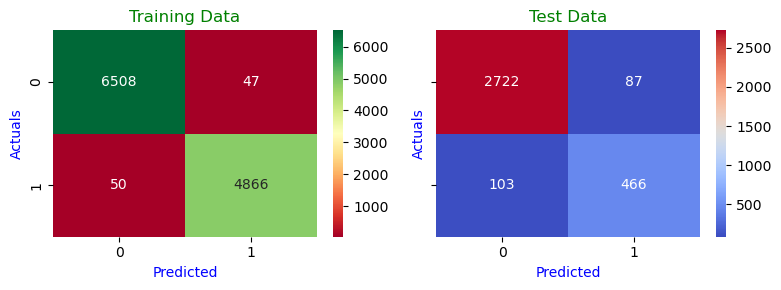

In [309]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train_smote,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 1.000
AUC for the Test Data: 0.961


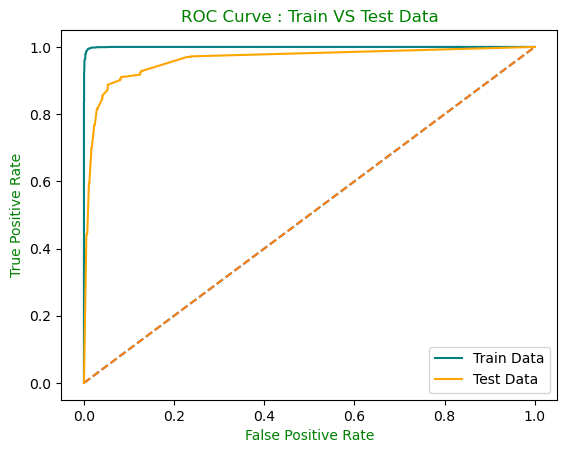

In [310]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = bgcl_smote.predict_proba(X_train_smote)[:,1]
auc = metrics.roc_auc_score(y_train_smote,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = bgcl_smote.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Comparison Table**

In [311]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train_smote,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train_smote,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train_smote, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train_smote,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train_smote,bgcl_smote.predict_proba(X_train_smote)[:,1]),
                          'auc_Test':roc_auc_score(y_test,bgcl_smote.predict_proba(X_test)[:,1])},index=['Bagging Classifier Smote' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   
KNN_3 Smote                      0.973760       0.909710      0.981692   
KNN Tuned                        0.992515       0.937833      0.963828   
Naive Bayes Classifier           0.856382       0.847543      0.559156   
Naive Bayes Smote                0.726615       0.671403      0.828112   
Random Forest                    0.992641       0.948490      0.969857   
Random Forest Smote              0.994072       0.947306      0.994508   
Random Forest Tuned              0.924892       0.897573      0.598342   
Bagging Classifier               0.988835       0.946418      0.950264   
Bagging Classifier Smote         0.991544       0.943754      0.989829   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   
KNN_3 Smote                   0.848858         0.958110        0.688034   
KNN Tuned                     0.799649         0.991473        0.825771   
Naive Bayes Classifier        0.553603         0.575640        0.546875   
Naive Bayes Smote             0.810193         0.639893        0.315106   
Random Forest                 0.794376         0.986207        0.888016   
Random Forest Smote           0.818981         0.991684        0.861368   
Random Forest Tuned           0.488576         0.930832        0.834835   
Bagging Classifier            0.813708         0.982853        0.860595   
Bagging Classifier Smote      0.818981         0.990434        0.842676   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                0.969758  0.760031   0.997777  0.935059  
KNN Tuned                  0.977455  0.812500   0.981075  0.882736  
Naive Bayes Classifier     0.567278  0.550218   0.819871  0.809155  
Naive Bayes Smote          0.721937  0.453740   0.834328  0.803815  
Random Forest              0.977964  0.838590   0.999685  0.972175  
Random Forest Smote        0.993094  0.839640   0.999839  0.969926  
Random Forest Tuned        0.728440  0.616408   0.980577  0.951711  
Bagging Classifier         0.966284  0.836495   0.999283  0.955695  
Bagging Classifier Smote   0.990131  0.830660   0.999676  0.961208

In [312]:
bgcl_rf_sm = BaggingClassifier(estimator=RF_model,n_estimators=100,random_state=42)
bgcl_rf_sm.fit(X_train_smote, y_train_smote)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [313]:
print("Accuracy of Train Data : ",bgcl_rf_sm.score(X_train_smote,y_train_smote))
print("Accuracy of Test Data : ",bgcl_rf_sm.score(X_test,y_test))

Accuracy of Train Data :  0.992328480516084
Accuracy of Test Data :  0.9443457667258733


## Applying GridsearchCV on Bagging


In [314]:
param_grid = {
              "max_samples": np.arange(0.2, 1, 0.1),
              "n_estimators": [40, 50, 60],
              "max_features": np.arange(0.2, 1, 0.1),
             }

In [315]:
grid_search = GridSearchCV(estimator=bgcl,param_grid=param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=42),
             param_grid={'max_features': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_samples': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': [40, 50, 60]})

In [316]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'max_features': 0.9000000000000001, 'max_samples': 0.8000000000000003, 'n_estimators': 60} 

BaggingClassifier(max_features=0.9000000000000001,
                  max_samples=0.8000000000000003, n_estimators=60,
                  random_state=42)


**Building Model on Best Parameter**

In [317]:
best_model_bagging = grid_search.best_estimator_
best_model_bagging.fit(X_train,y_train)

BaggingClassifier(max_features=0.9000000000000001,
                  max_samples=0.8000000000000003, n_estimators=60,
                  random_state=42)

**Accuracy of Train and Test Data**

In [318]:
print("Accuracy on Train Data: ",best_model_bagging.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_bagging.score(X_test,y_test))

Accuracy on Train Data:  0.9892159350418676
Accuracy on Test Data:  0.9499703966844286


**Predictions**

In [319]:
ytrain_pred = best_model_bagging.predict(X_train)
ytest_pred = best_model_bagging.predict(X_test)

**Classification Report**

In [320]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6555
           1       0.99      0.95      0.97      1327

    accuracy                           0.99      7882
   macro avg       0.99      0.97      0.98      7882
weighted avg       0.99      0.99      0.99      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.90      0.79      0.84       569

    accuracy                           0.95      3378
   macro avg       0.93      0.89      0.91      3378
weighted avg       0.95      0.95      0.95      3378



**Confusion Matrix**

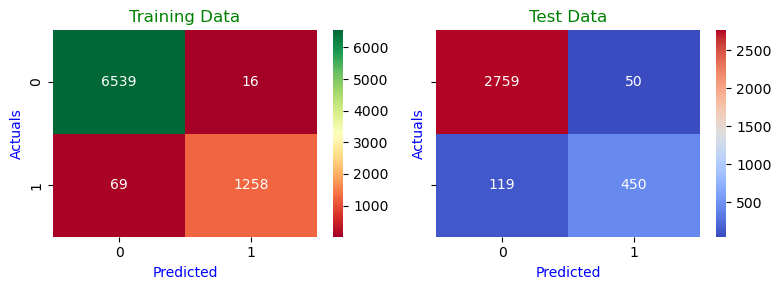

In [321]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 0.999
AUC for the Test Data: 0.977


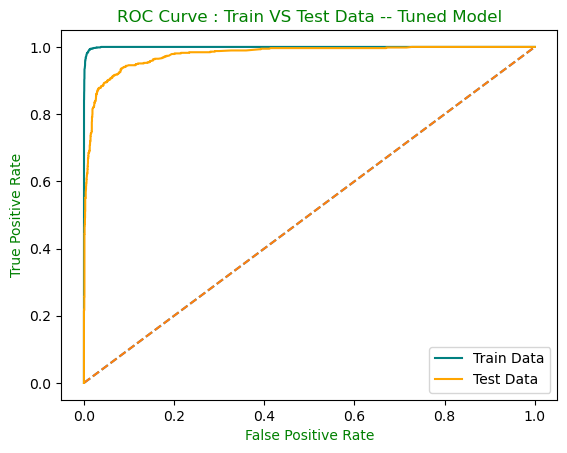

In [322]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = best_model_bagging.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = best_model_bagging.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data -- Tuned Model",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Comparison Table**

In [323]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                           'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                           'recall_Train':recall_score(y_train,ytrain_pred),
                           'recall_Test':recall_score(y_test,ytest_pred),
                           'precision_Train': precision_score(y_train, ytrain_pred),
                           'precision_Test': precision_score(y_test, ytest_pred),  
                           'f1_Train': f1_score(y_train,ytrain_pred),
                           'f1_Test': f1_score(y_test,ytest_pred),
                           'auc_Train':roc_auc_score(y_train,best_model_bagging.predict_proba(X_train)[:,1]),
                           'auc_Test':roc_auc_score(y_test,best_model_bagging.predict_proba(X_test)[:,1])},index=['Bagging Classifier Tuned'])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   
KNN_3 Smote                      0.973760       0.909710      0.981692   
KNN Tuned                        0.992515       0.937833      0.963828   
Naive Bayes Classifier           0.856382       0.847543      0.559156   
Naive Bayes Smote                0.726615       0.671403      0.828112   
Random Forest                    0.992641       0.948490      0.969857   
Random Forest Smote              0.994072       0.947306      0.994508   
Random Forest Tuned              0.924892       0.897573      0.598342   
Bagging Classifier               0.988835       0.946418      0.950264   
Bagging Classifier Smote         0.991544       0.943754      0.989829   
Bagging Classifier Tuned         0.989216       0.949970      0.948003   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   
KNN_3 Smote                   0.848858         0.958110        0.688034   
KNN Tuned                     0.799649         0.991473        0.825771   
Naive Bayes Classifier        0.553603         0.575640        0.546875   
Naive Bayes Smote             0.810193         0.639893        0.315106   
Random Forest                 0.794376         0.986207        0.888016   
Random Forest Smote           0.818981         0.991684        0.861368   
Random Forest Tuned           0.488576         0.930832        0.834835   
Bagging Classifier            0.813708         0.982853        0.860595   
Bagging Classifier Smote      0.818981         0.990434        0.842676   
Bagging Classifier Tuned      0.790861         0.987441        0.900000   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                0.969758  0.760031   0.997777  0.935059  
KNN Tuned                  0.977455  0.812500   0.981075  0.882736  
Naive Bayes Classifier     0.567278  0.550218   0.819871  0.809155  
Naive Bayes Smote          0.721937  0.453740   0.834328  0.803815  
Random Forest              0.977964  0.838590   0.999685  0.972175  
Random Forest Smote        0.993094  0.839640   0.999839  0.969926  
Random Forest Tuned        0.728440  0.616408   0.980577  0.951711  
Bagging Classifier         0.966284  0.836495   0.999283  0.955695  
Bagging Classifier Sm

## AdaBoost Classifier

In [324]:
from sklearn.ensemble import AdaBoostClassifier

In [325]:
ADB_model = AdaBoostClassifier(n_estimators=500,random_state=42)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

**Accuracy of Train and Test data**

In [326]:
print("Accuracy on Train Data: ",ADB_model.score(X_train,y_train))
print("Accuracy on Test Data: ",ADB_model.score(X_test,y_test))

Accuracy on Train Data:  0.86881502156813
Accuracy on Test Data:  0.8756660746003553


* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Predictions**

In [327]:
ytrain_pred = ADB_model.predict(X_train)
ytest_pred = ADB_model.predict(X_test)

**Classification Report**

In [328]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.89      0.96      0.92      6555
           1       0.69      0.40      0.51      1327

    accuracy                           0.87      7882
   macro avg       0.79      0.68      0.72      7882
weighted avg       0.85      0.87      0.85      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.72      0.43      0.54       569

    accuracy                           0.88      3378
   macro avg       0.81      0.70      0.73      3378
weighted avg       0.86      0.88      0.86      3378



**Confusion Matrix**

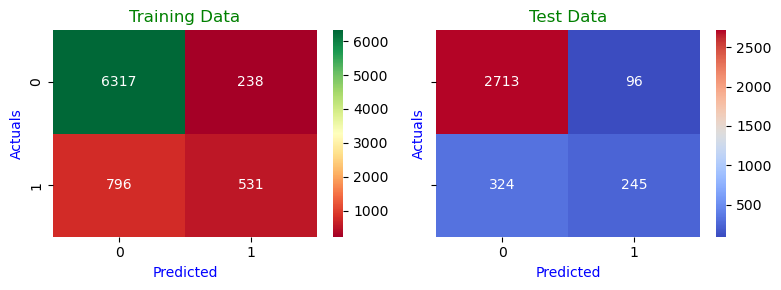

In [329]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**AUC - ROC Curve : Train Data**

AUC: 0.867


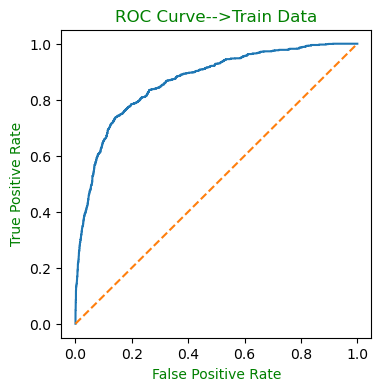

In [330]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**AUC - ROC Curve : Test Data**

AUC: 0.868


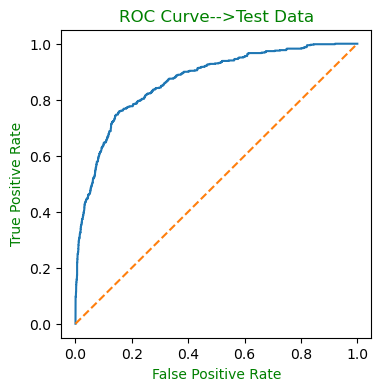

In [331]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_test,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**Comparison Table**

In [332]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                           'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                           'recall_Train':recall_score(y_train,ytrain_pred),
                           'recall_Test':recall_score(y_test,ytest_pred),
                           'precision_Train': precision_score(y_train, ytrain_pred),
                           'precision_Test': precision_score(y_test, ytest_pred),  
                           'f1_Train': f1_score(y_train,ytrain_pred),
                           'f1_Test': f1_score(y_test,ytest_pred),
                           'auc_Train':roc_auc_score(y_train,ADB_model.predict_proba(X_train)[:,1]),
                           'auc_Test':roc_auc_score(y_test,ADB_model.predict_proba(X_test)[:,1])},index=['Ada Boost Classifier'])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression              0.841284       0.849319      0.185381   
Logistic Regression Smote        0.741958       0.772943      0.671888   
Logistic Regression Tuned        0.840903       0.849023      0.182366   
LDA                              0.846739       0.854944      0.225320   
LDA Smote                        0.738907       0.768798      0.667006   
LDA Tuned                        0.845851       0.853760      0.217784   
KNN_3                            0.966252       0.917407      0.878674   
KNN_1                            0.991500       0.934873      0.976639   
KNN_3 Smote                      0.973760       0.909710      0.981692   
KNN Tuned                        0.992515       0.937833      0.963828   
Naive Bayes Classifier           0.856382       0.847543      0.559156   
Naive Bayes Smote                0.726615       0.671403      0.828112   
Random Forest                    0.992641       0.948490      0.969857   
Random Forest Smote              0.994072       0.947306      0.994508   
Random Forest Tuned              0.924892       0.897573      0.598342   
Bagging Classifier               0.988835       0.946418      0.950264   
Bagging Classifier Smote         0.991544       0.943754      0.989829   
Bagging Classifier Tuned         0.989216       0.949970      0.948003   
Ada Boost Classifier             0.868815       0.875666      0.400151   

                           recall_Test  precision_Train  precision_Test  \
Logistic Regression           0.228471         0.591346        0.650000   
Logistic Regression Smote     0.646749         0.710323        0.394004   
Logistic Regression Tuned     0.224956         0.588808        0.649746   
LDA                           0.277680         0.624217        0.666667   
LDA Smote                     0.636204         0.707138        0.386752   
LDA Tuned                     0.267135         0.620172        0.663755   
KNN_3                         0.746924         0.917388        0.758929   
KNN_1                         0.826011         0.972973        0.795262   
KNN_3 Smote                   0.848858         0.958110        0.688034   
KNN Tuned                     0.799649         0.991473        0.825771   
Naive Bayes Classifier        0.553603         0.575640        0.546875   
Naive Bayes Smote             0.810193         0.639893        0.315106   
Random Forest                 0.794376         0.986207        0.888016   
Random Forest Smote           0.818981         0.991684        0.861368   
Random Forest Tuned           0.488576         0.930832        0.834835   
Bagging Classifier            0.813708         0.982853        0.860595   
Bagging Classifier Smote      0.818981         0.990434        0.842676   
Bagging Classifier Tuned      0.790861         0.987441        0.900000   
Ada Boost Classifier          0.430580         0.690507        0.718475   

                           f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression        0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote  0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned  0.278481  0.334204   0.790679  0.785232  
LDA                        0.331118  0.392060   0.784839  0.784053  
LDA Smote                  0.686486  0.481063   0.801479  0.784294  
LDA Tuned                  0.322365  0.380952   0.784453  0.783774  
KNN_3                      0.897614  0.752879   0.992211  0.930162  
KNN_1                      0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                0.969758  0.760031   0.997777  0.935059  
KNN Tuned                  0.977455  0.812500   0.981075  0.882736  
Naive Bayes Classifier     0.567278  0.550218   0.819871  0.809155  
Naive Bayes Smote          0.721937  0.453740   0.834328  0.803815  
Random Forest              0.977964  0.838590   0.999685  0.972175  
Random Forest Smote        0.993094  0.839640   0.999839  0.969926  
Random For

**Feature Importance**

In [333]:
ADB_model.feature_importances_

array([0.006, 0.034, 0.004, 0.118, 0.026, 0.01 , 0.006, 0.034, 0.006,
       0.012, 0.01 , 0.016, 0.006, 0.712])

In [334]:
imp = pd.DataFrame(ADB_model.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
imp

Imp
cashback_category        0.712
account_segment          0.118
Payment                  0.034
coupon_used_for_payment  0.034
CC_Agent_Score           0.026
Revenue_Cat              0.016
Tenure_Cat               0.012
Marital_Status           0.010
CC_Contacted_LY_cat      0.010
City_Tier                0.006
Complain_ly              0.006
Login_device             0.006
CC_connect_category      0.006
Gender                   0.004

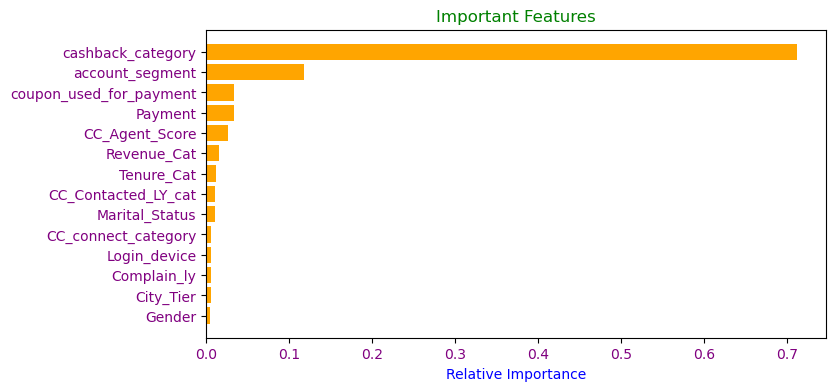

In [335]:
imp = ADB_model.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='orange')
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

In [336]:
ADB_rf = AdaBoostClassifier(estimator=RF_model,n_estimators=100,random_state=42)
ADB_rf.fit(X_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42),
                   n_estimators=100, random_state=42)

In [337]:
print("Accuracy on Train Data: ",ADB_rf.score(X_train,y_train))
print("Accuracy on Test Data: ",ADB_rf.score(X_test,y_test))

Accuracy on Train Data:  0.9926414615579802
Accuracy on Test Data:  0.9363528715216104


## Ada Boost on Smote Dataset

In [338]:
ADB_smote = AdaBoostClassifier(n_estimators=1000,random_state=42)
ADB_smote.fit(X_train_smote,y_train_smote)

AdaBoostClassifier(n_estimators=1000, random_state=42)

**Accuracy of the Training and Test data**

In [339]:
print("Accuracy on Train Data: ",ADB_smote.score(X_train_smote,y_train_smote))
print("Accuracy on Test Data: ",ADB_smote.score(X_test,y_test))

Accuracy on Train Data:  0.8735071048731584
Accuracy on Test Data:  0.8602723505032563


* There is not much defference between Accuracy of the Train data and Test data, hence our model is Neither Overfit nor Underfit.

**Predictions**

In [340]:
ytrain_pred = ADB_smote.predict(X_train_smote)
ytest_pred = ADB_smote.predict(X_test)

**Classification Report**

In [341]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train_smote,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.87      0.92      0.89      6555
           1       0.88      0.81      0.85      4916

    accuracy                           0.87     11471
   macro avg       0.88      0.87      0.87     11471
weighted avg       0.87      0.87      0.87     11471
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.92      0.91      0.92      2809
           1       0.58      0.63      0.60       569

    accuracy                           0.86      3378
   macro avg       0.75      0.77      0.76      3378
weighted avg       0.86      0.86      0.86      3378



**Confusion Matrix**

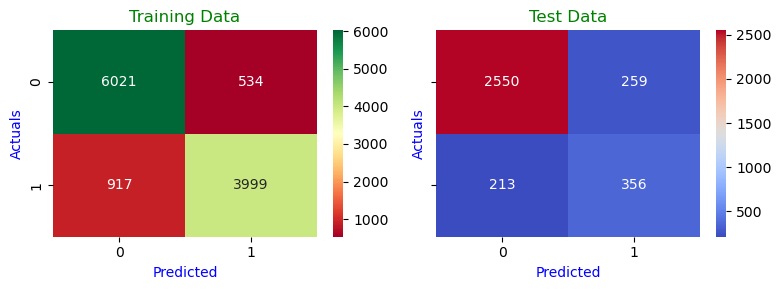

In [342]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train_smote,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 0.938
AUC for the Test Data: 0.866


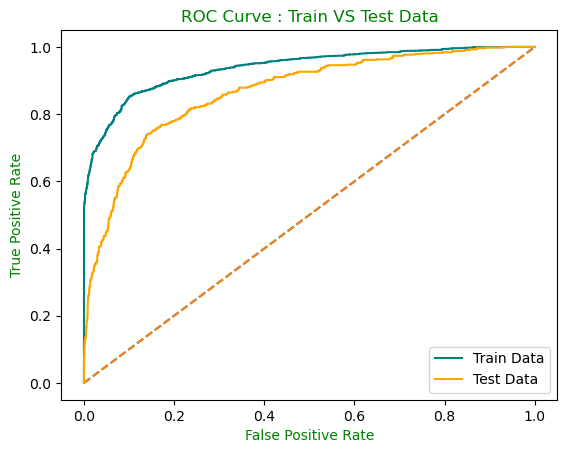

In [343]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = ADB_smote.predict_proba(X_train_smote)[:,1]
auc = metrics.roc_auc_score(y_train_smote,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = ADB_smote.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Comparison Table**

In [344]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train_smote,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train_smote,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train_smote, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train_smote,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train_smote,ADB_smote.predict_proba(X_train_smote)[:,1]),
                          'auc_Test':roc_auc_score(y_test,ADB_smote.predict_proba(X_test)[:,1])},index=['Ada Boost Classifier Smote' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression               0.841284       0.849319      0.185381   
Logistic Regression Smote         0.741958       0.772943      0.671888   
Logistic Regression Tuned         0.840903       0.849023      0.182366   
LDA                               0.846739       0.854944      0.225320   
LDA Smote                         0.738907       0.768798      0.667006   
LDA Tuned                         0.845851       0.853760      0.217784   
KNN_3                             0.966252       0.917407      0.878674   
KNN_1                             0.991500       0.934873      0.976639   
KNN_3 Smote                       0.973760       0.909710      0.981692   
KNN Tuned                         0.992515       0.937833      0.963828   
Naive Bayes Classifier            0.856382       0.847543      0.559156   
Naive Bayes Smote                 0.726615       0.671403      0.828112   
Random Forest                     0.992641       0.948490      0.969857   
Random Forest Smote               0.994072       0.947306      0.994508   
Random Forest Tuned               0.924892       0.897573      0.598342   
Bagging Classifier                0.988835       0.946418      0.950264   
Bagging Classifier Smote          0.991544       0.943754      0.989829   
Bagging Classifier Tuned          0.989216       0.949970      0.948003   
Ada Boost Classifier              0.868815       0.875666      0.400151   
Ada Boost Classifier Smote        0.873507       0.860272      0.813466   

                            recall_Test  precision_Train  precision_Test  \
Logistic Regression            0.228471         0.591346        0.650000   
Logistic Regression Smote      0.646749         0.710323        0.394004   
Logistic Regression Tuned      0.224956         0.588808        0.649746   
LDA                            0.277680         0.624217        0.666667   
LDA Smote                      0.636204         0.707138        0.386752   
LDA Tuned                      0.267135         0.620172        0.663755   
KNN_3                          0.746924         0.917388        0.758929   
KNN_1                          0.826011         0.972973        0.795262   
KNN_3 Smote                    0.848858         0.958110        0.688034   
KNN Tuned                      0.799649         0.991473        0.825771   
Naive Bayes Classifier         0.553603         0.575640        0.546875   
Naive Bayes Smote              0.810193         0.639893        0.315106   
Random Forest                  0.794376         0.986207        0.888016   
Random Forest Smote            0.818981         0.991684        0.861368   
Random Forest Tuned            0.488576         0.930832        0.834835   
Bagging Classifier             0.813708         0.982853        0.860595   
Bagging Classifier Smote       0.818981         0.990434        0.842676   
Bagging Classifier Tuned       0.790861         0.987441        0.900000   
Ada Boost Classifier           0.430580         0.690507        0.718475   
Ada Boost Classifier Smote     0.625659         0.882197        0.578862   

                            f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression         0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote   0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned   0.278481  0.334204   0.790679  0.785232  
LDA                         0.331118  0.392060   0.784839  0.784053  
LDA Smote                   0.686486  0.481063   0.801479  0.784294  
LDA Tuned                   0.322365  0.380952   0.784453  0.783774  
KNN_3                       0.897614  0.752879   0.992211  0.930162  
KNN_1                       0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                 0.969758  0.760031   0.997777  0.935059  
KNN Tuned                   0.977455  0.812500   0.981075  0.882736  
Naive Bayes Classifier      0.567278  0.550218   0.819871  0.809155  
Naive Bayes Smo

In [345]:
imp = pd.DataFrame(ADB_smote.feature_importances_, columns=["Imp"], index=X_train_smote.columns).sort_values(by="Imp", ascending=False)
imp

Imp
coupon_used_for_payment  0.460
CC_Agent_Score           0.407
Complain_ly              0.081
account_segment          0.017
Payment                  0.006
Marital_Status           0.006
Revenue_Cat              0.005
CC_Contacted_LY_cat      0.004
City_Tier                0.003
Gender                   0.003
Login_device             0.002
Tenure_Cat               0.002
CC_connect_category      0.002
cashback_category        0.002

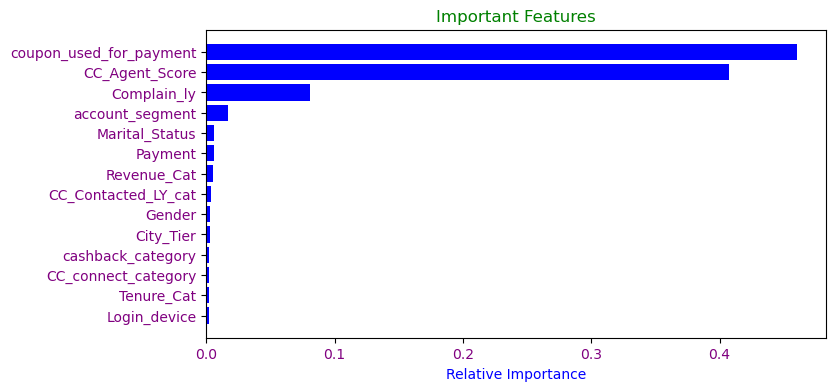

In [346]:
imp = ADB_smote.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train_smote.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='blue')
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

In [347]:
ADB_rf_sm = AdaBoostClassifier(estimator=rf_smote,n_estimators=500,random_state=42)
ADB_rf_sm.fit(X_train_smote,y_train_smote)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=500,
                                                    random_state=42),
                   n_estimators=500, random_state=42)

In [348]:
print("Accuracy on Train Data: ",ADB_rf_sm.score(X_train_smote,y_train_smote))
print("Accuracy on Test Data: ",ADB_rf_sm.score(X_test,y_test))

Accuracy on Train Data:  0.9940720076715195
Accuracy on Test Data:  0.9443457667258733


In [349]:
## GridSearchCV on ADA Boost:

In [350]:
Param_grid = { 'n_estimators' : [50,100,500,1000],
               'learning_rate' : [0.1,0.01,0.001,1.0],
               'algorithm' : ['SAMME', 'SAMME.R']
             }

In [351]:
grid_search = GridSearchCV(estimator=ADB_model,param_grid=Param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(n_estimators=500, random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001, 1.0],
                         'n_estimators': [50, 100, 500, 1000]})

In [352]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 1000} 

AdaBoostClassifier(algorithm='SAMME', n_estimators=1000, random_state=42)


**Building Model on Best Parameter**

In [353]:
best_model_Adb = grid_search.best_estimator_
best_model_Adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=1000, random_state=42)

**Accuracy of Train and Test Data**

In [354]:
print("Accuracy on Train Data: ",best_model_Adb.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_Adb.score(X_test,y_test))

Accuracy on Train Data:  0.8686881502156814
Accuracy on Test Data:  0.8756660746003553


* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Predictions**

In [355]:
ytrain_pred = best_model_Adb.predict(X_train)
ytest_pred = best_model_Adb.predict(X_test)

**Classification Report**

In [356]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.89      0.96      0.92      6555
           1       0.69      0.40      0.51      1327

    accuracy                           0.87      7882
   macro avg       0.79      0.68      0.71      7882
weighted avg       0.85      0.87      0.85      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.72      0.43      0.54       569

    accuracy                           0.88      3378
   macro avg       0.81      0.70      0.73      3378
weighted avg       0.86      0.88      0.86      3378



**Confusion Matrix**

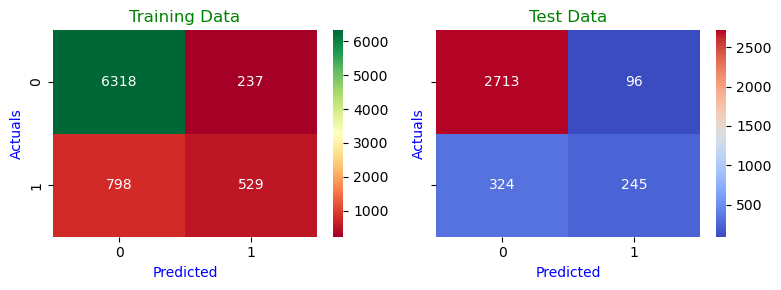

In [357]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 0.867
AUC for the Test Data: 0.868


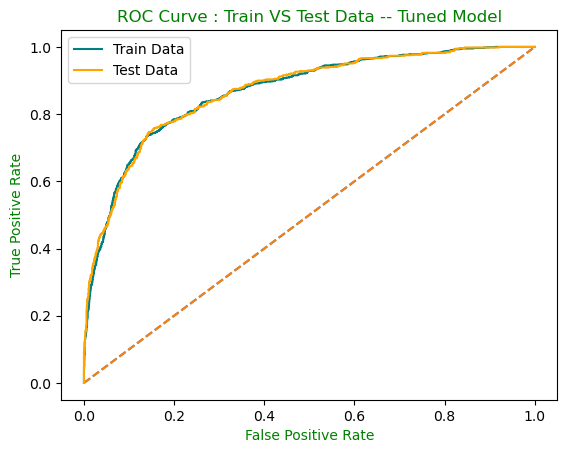

In [358]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = best_model_Adb.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = best_model_Adb.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data -- Tuned Model",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Feature Importance**

In [359]:
best_model_Adb.feature_importances_

array([0.03279515, 0.05100684, 0.01060353, 0.11462493, 0.03929932,
       0.04546916, 0.05068142, 0.0454281 , 0.01238407, 0.34463179,
       0.0224928 , 0.05751831, 0.04159466, 0.13146992])

In [360]:
imp = pd.DataFrame(best_model_Adb.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
imp

Imp
Tenure_Cat               0.344632
cashback_category        0.131470
account_segment          0.114625
Revenue_Cat              0.057518
Payment                  0.051007
Complain_ly              0.050681
Marital_Status           0.045469
coupon_used_for_payment  0.045428
CC_connect_category      0.041595
CC_Agent_Score           0.039299
City_Tier                0.032795
CC_Contacted_LY_cat      0.022493
Login_device             0.012384
Gender                   0.010604

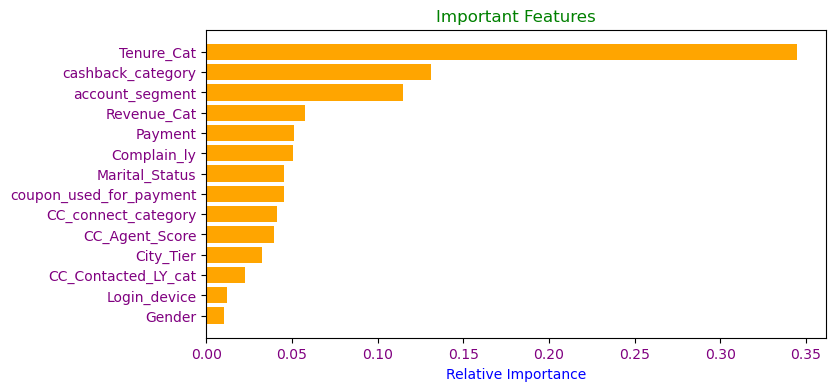

In [361]:
imp = best_model_Adb.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='orange')
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.xticks(color='purple')
plt.show()

**Comparison Table**

In [362]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                           'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                           'recall_Train':recall_score(y_train,ytrain_pred),
                           'recall_Test':recall_score(y_test,ytest_pred),
                           'precision_Train': precision_score(y_train, ytrain_pred),
                           'precision_Test': precision_score(y_test, ytest_pred),  
                           'f1_Train': f1_score(y_train,ytrain_pred),
                           'f1_Test': f1_score(y_test,ytest_pred),
                           'auc_Train':roc_auc_score(y_train,best_model_Adb.predict_proba(X_train)[:,1]),
                           'auc_Test':roc_auc_score(y_test,best_model_Adb.predict_proba(X_test)[:,1])},index=['ADA Boost Tuned'])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression               0.841284       0.849319      0.185381   
Logistic Regression Smote         0.741958       0.772943      0.671888   
Logistic Regression Tuned         0.840903       0.849023      0.182366   
LDA                               0.846739       0.854944      0.225320   
LDA Smote                         0.738907       0.768798      0.667006   
LDA Tuned                         0.845851       0.853760      0.217784   
KNN_3                             0.966252       0.917407      0.878674   
KNN_1                             0.991500       0.934873      0.976639   
KNN_3 Smote                       0.973760       0.909710      0.981692   
KNN Tuned                         0.992515       0.937833      0.963828   
Naive Bayes Classifier            0.856382       0.847543      0.559156   
Naive Bayes Smote                 0.726615       0.671403      0.828112   
Random Forest                     0.992641       0.948490      0.969857   
Random Forest Smote               0.994072       0.947306      0.994508   
Random Forest Tuned               0.924892       0.897573      0.598342   
Bagging Classifier                0.988835       0.946418      0.950264   
Bagging Classifier Smote          0.991544       0.943754      0.989829   
Bagging Classifier Tuned          0.989216       0.949970      0.948003   
Ada Boost Classifier              0.868815       0.875666      0.400151   
Ada Boost Classifier Smote        0.873507       0.860272      0.813466   
ADA Boost Tuned                   0.868688       0.875666      0.398644   

                            recall_Test  precision_Train  precision_Test  \
Logistic Regression            0.228471         0.591346        0.650000   
Logistic Regression Smote      0.646749         0.710323        0.394004   
Logistic Regression Tuned      0.224956         0.588808        0.649746   
LDA                            0.277680         0.624217        0.666667   
LDA Smote                      0.636204         0.707138        0.386752   
LDA Tuned                      0.267135         0.620172        0.663755   
KNN_3                          0.746924         0.917388        0.758929   
KNN_1                          0.826011         0.972973        0.795262   
KNN_3 Smote                    0.848858         0.958110        0.688034   
KNN Tuned                      0.799649         0.991473        0.825771   
Naive Bayes Classifier         0.553603         0.575640        0.546875   
Naive Bayes Smote              0.810193         0.639893        0.315106   
Random Forest                  0.794376         0.986207        0.888016   
Random Forest Smote            0.818981         0.991684        0.861368   
Random Forest Tuned            0.488576         0.930832        0.834835   
Bagging Classifier             0.813708         0.982853        0.860595   
Bagging Classifier Smote       0.818981         0.990434        0.842676   
Bagging Classifier Tuned       0.790861         0.987441        0.900000   
Ada Boost Classifier           0.430580         0.690507        0.718475   
Ada Boost Classifier Smote     0.625659         0.882197        0.578862   
ADA Boost Tuned                0.430580         0.690601        0.718475   

                            f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression         0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote   0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned   0.278481  0.334204   0.790679  0.785232  
LDA                         0.331118  0.392060   0.784839  0.784053  
LDA Smote                   0.686486  0.481063   0.801479  0.784294  
LDA Tuned                   0.322365  0.380952   0.784453  0.783774  
KNN_3                       0.897614  0.752879   0.992211  0.930162  
KNN_1                       0.974803  0.810345   0.985574  0.891467  
KNN_3 Smote                 0.969758  0.760031   0.997777  0.935059  
KNN 

## XGBoost Classifier

In [363]:
# import xgboost
from xgboost import XGBClassifier

In [364]:
xgb = XGBClassifier(eval_metric="logloss",random_state=42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

**Accuracy of Train and Test data**

In [365]:
print("Accuracy on Train Data: ",xgb.score(X_train,y_train))
print("Accuracy on Test Data: ",xgb.score(X_test,y_test))

Accuracy on Train Data:  0.9798274549606699
Accuracy on Test Data:  0.9399052693901717


**validness of models (over fitting or under fitting):**

* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Predictions**

In [366]:
ytrain_pred = xgb.predict(X_train)
ytest_pred = xgb.predict(X_test)

**Classification Report**

In [367]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      6555
           1       0.97      0.91      0.94      1327

    accuracy                           0.98      7882
   macro avg       0.98      0.95      0.96      7882
weighted avg       0.98      0.98      0.98      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.95      0.98      0.96      2809
           1       0.86      0.76      0.81       569

    accuracy                           0.94      3378
   macro avg       0.91      0.87      0.89      3378
weighted avg       0.94      0.94      0.94      3378



**Confusion Matrix**

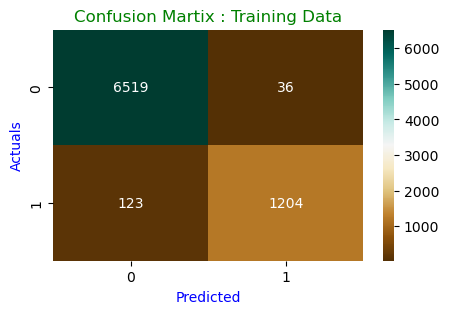

In [368]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Martix : Training Data",color='green');

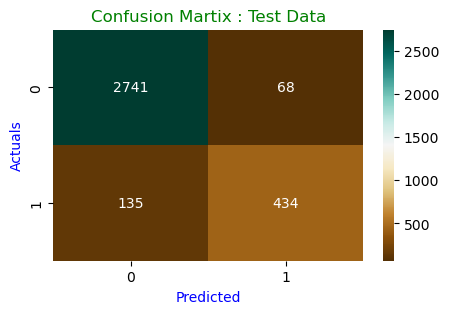

In [369]:
plt.figure(figsize=(5,3))
sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)),annot=True,fmt='.5g'
            ,cmap='BrBG');
plt.xlabel('Predicted',color='blue');
plt.ylabel('Actuals',color='blue');
plt.title("Confusion Martix : Test Data",color='green');

**AUC - ROC Curve : Train Data**

AUC: 0.997


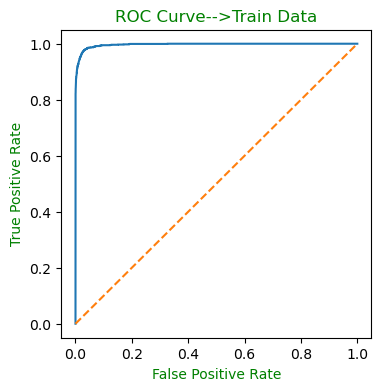

In [370]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = xgb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_train,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Train Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**AUC - ROC Curve : Test Data**

AUC: 0.972


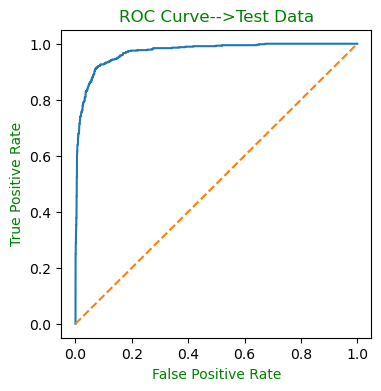

In [371]:
plt.figure(figsize=(4,4))
# predict probabilities
probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(y_test,probs)
print("AUC: %.3f" %auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test,probs)
plt.plot(train_fpr,train_tpr);
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.title("ROC Curve-->Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
plt.show()

**Feature Importance**

In [372]:
xgb.feature_importances_

array([0.0507143 , 0.05070036, 0.05330373, 0.06414363, 0.0559811 ,
       0.06298529, 0.13311917, 0.03172503, 0.05042301, 0.28846136,
       0.04637928, 0.04157775, 0.0386493 , 0.0318368 ], dtype=float32)

In [373]:
imp = pd.DataFrame(xgb.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
imp

Imp
Tenure_Cat               0.288461
Complain_ly              0.133119
account_segment          0.064144
Marital_Status           0.062985
CC_Agent_Score           0.055981
Gender                   0.053304
City_Tier                0.050714
Payment                  0.050700
Login_device             0.050423
CC_Contacted_LY_cat      0.046379
Revenue_Cat              0.041578
CC_connect_category      0.038649
cashback_category        0.031837
coupon_used_for_payment  0.031725

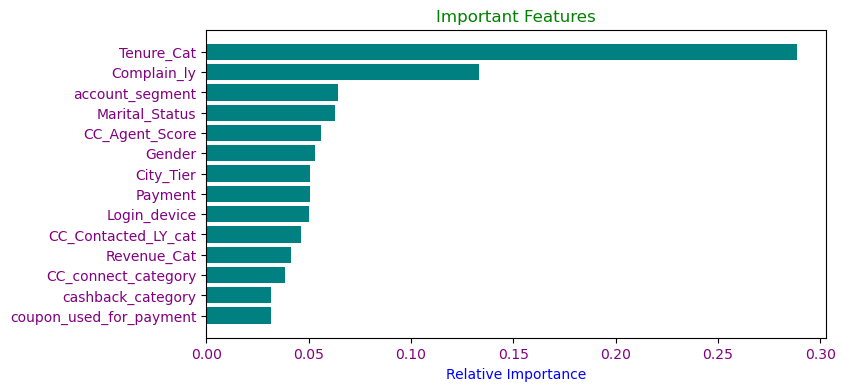

In [374]:
imp = xgb.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='teal')
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

* The 1st five important feature of XGBoost model are: Tenure_Cat, Complain_ly, account_segment, Marital_Status and City_Tier.

**Comparison Table**

In [375]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                           'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                           'recall_Train':recall_score(y_train,ytrain_pred),
                           'recall_Test':recall_score(y_test,ytest_pred),
                           'precision_Train': precision_score(y_train, ytrain_pred),
                           'precision_Test': precision_score(y_test, ytest_pred),  
                           'f1_Train': f1_score(y_train,ytrain_pred),
                           'f1_Test': f1_score(y_test,ytest_pred),
                           'auc_Train':roc_auc_score(y_train,xgb.predict_proba(X_train)[:,1]),
                           'auc_Test':roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1])},index=['XGBoost Classifier'])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression               0.841284       0.849319      0.185381   
Logistic Regression Smote         0.741958       0.772943      0.671888   
Logistic Regression Tuned         0.840903       0.849023      0.182366   
LDA                               0.846739       0.854944      0.225320   
LDA Smote                         0.738907       0.768798      0.667006   
LDA Tuned                         0.845851       0.853760      0.217784   
KNN_3                             0.966252       0.917407      0.878674   
KNN_1                             0.991500       0.934873      0.976639   
KNN_3 Smote                       0.973760       0.909710      0.981692   
KNN Tuned                         0.992515       0.937833      0.963828   
Naive Bayes Classifier            0.856382       0.847543      0.559156   
Naive Bayes Smote                 0.726615       0.671403      0.828112   
Random Forest                     0.992641       0.948490      0.969857   
Random Forest Smote               0.994072       0.947306      0.994508   
Random Forest Tuned               0.924892       0.897573      0.598342   
Bagging Classifier                0.988835       0.946418      0.950264   
Bagging Classifier Smote          0.991544       0.943754      0.989829   
Bagging Classifier Tuned          0.989216       0.949970      0.948003   
Ada Boost Classifier              0.868815       0.875666      0.400151   
Ada Boost Classifier Smote        0.873507       0.860272      0.813466   
ADA Boost Tuned                   0.868688       0.875666      0.398644   
XGBoost Classifier                0.979827       0.939905      0.907310   

                            recall_Test  precision_Train  precision_Test  \
Logistic Regression            0.228471         0.591346        0.650000   
Logistic Regression Smote      0.646749         0.710323        0.394004   
Logistic Regression Tuned      0.224956         0.588808        0.649746   
LDA                            0.277680         0.624217        0.666667   
LDA Smote                      0.636204         0.707138        0.386752   
LDA Tuned                      0.267135         0.620172        0.663755   
KNN_3                          0.746924         0.917388        0.758929   
KNN_1                          0.826011         0.972973        0.795262   
KNN_3 Smote                    0.848858         0.958110        0.688034   
KNN Tuned                      0.799649         0.991473        0.825771   
Naive Bayes Classifier         0.553603         0.575640        0.546875   
Naive Bayes Smote              0.810193         0.639893        0.315106   
Random Forest                  0.794376         0.986207        0.888016   
Random Forest Smote            0.818981         0.991684        0.861368   
Random Forest Tuned            0.488576         0.930832        0.834835   
Bagging Classifier             0.813708         0.982853        0.860595   
Bagging Classifier Smote       0.818981         0.990434        0.842676   
Bagging Classifier Tuned       0.790861         0.987441        0.900000   
Ada Boost Classifier           0.430580         0.690507        0.718475   
Ada Boost Classifier Smote     0.625659         0.882197        0.578862   
ADA Boost Tuned                0.430580         0.690601        0.718475   
XGBoost Classifier             0.762742         0.970968        0.864542   

                            f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression         0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote   0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned   0.278481  0.334204   0.790679  0.785232  
LDA                         0.331118  0.392060   0.784839  0.784053  
LDA Smote                   0.686486  0.481063   0.801479  0.784294  
LDA Tuned                   0.322365  0.380952   0.784453  0.783774  
KNN_3                       0.897614  0.752879   0.992211  0.93

## XGBoost on Smote dataset


In [376]:
xgb_smote = XGBClassifier(random_state=42, eval_metric="logloss")
xgb_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

**Accuracy of Train and Test set**

In [377]:
print("Accuracy on Train Data: ",xgb_smote.score(X_train_smote,y_train_smote))
print("Accuracy on Test Data: ",xgb_smote.score(X_test,y_test))

Accuracy on Train Data:  0.981605788510156
Accuracy on Test Data:  0.9387211367673179


**validness of models (over fitting or under fitting):**

* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Predictions**

In [378]:
ytrain_pred = xgb_smote.predict(X_train_smote)
ytest_pred = xgb_smote.predict(X_test)

**Classification Report**

In [379]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train_smote,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      6555
           1       0.98      0.98      0.98      4916

    accuracy                           0.98     11471
   macro avg       0.98      0.98      0.98     11471
weighted avg       0.98      0.98      0.98     11471
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2809
           1       0.82      0.81      0.82       569

    accuracy                           0.94      3378
   macro avg       0.89      0.89      0.89      3378
weighted avg       0.94      0.94      0.94      3378



### AUC and ROC for the training data

AUC for the Training Data: 0.999
AUC for the Test Data: 0.971


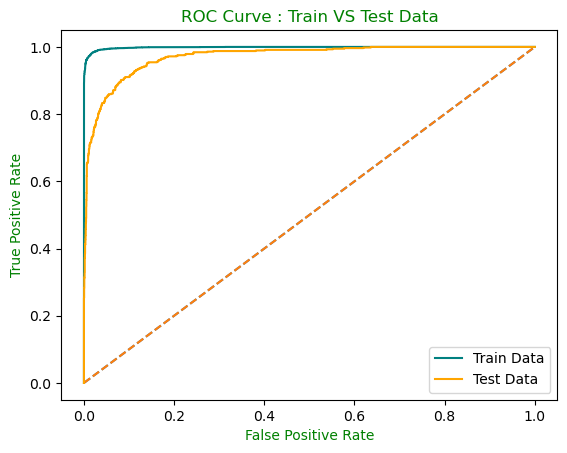

In [380]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = xgb_smote.predict_proba(X_train_smote)[:,1]
auc = metrics.roc_auc_score(y_train_smote,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = xgb_smote.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Feature Importance**

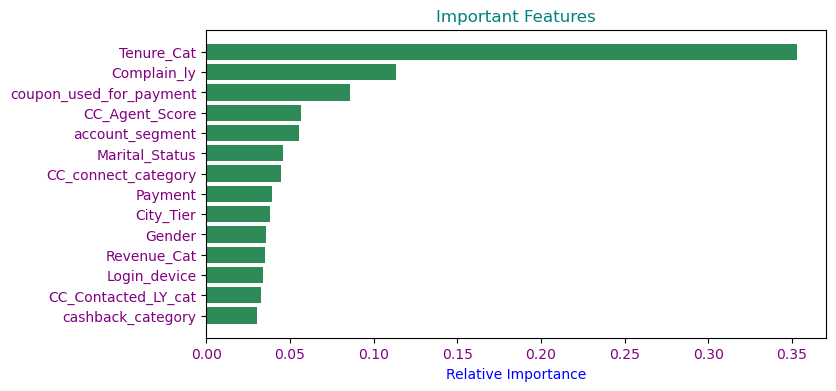

In [381]:
imp = xgb_smote.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train_smote.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='seagreen')
plt.title("Important Features",color='teal')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

**Comparison Table**

In [382]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train_smote,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train_smote,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train_smote, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train_smote,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train_smote,xgb_smote.predict_proba(X_train_smote)[:,1]),
                          'auc_Test':roc_auc_score(y_test,xgb_smote.predict_proba(X_test)[:,1])},index=['XGBoost Classifier Smote' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression               0.841284       0.849319      0.185381   
Logistic Regression Smote         0.741958       0.772943      0.671888   
Logistic Regression Tuned         0.840903       0.849023      0.182366   
LDA                               0.846739       0.854944      0.225320   
LDA Smote                         0.738907       0.768798      0.667006   
LDA Tuned                         0.845851       0.853760      0.217784   
KNN_3                             0.966252       0.917407      0.878674   
KNN_1                             0.991500       0.934873      0.976639   
KNN_3 Smote                       0.973760       0.909710      0.981692   
KNN Tuned                         0.992515       0.937833      0.963828   
Naive Bayes Classifier            0.856382       0.847543      0.559156   
Naive Bayes Smote                 0.726615       0.671403      0.828112   
Random Forest                     0.992641       0.948490      0.969857   
Random Forest Smote               0.994072       0.947306      0.994508   
Random Forest Tuned               0.924892       0.897573      0.598342   
Bagging Classifier                0.988835       0.946418      0.950264   
Bagging Classifier Smote          0.991544       0.943754      0.989829   
Bagging Classifier Tuned          0.989216       0.949970      0.948003   
Ada Boost Classifier              0.868815       0.875666      0.400151   
Ada Boost Classifier Smote        0.873507       0.860272      0.813466   
ADA Boost Tuned                   0.868688       0.875666      0.398644   
XGBoost Classifier                0.979827       0.939905      0.907310   
XGBoost Classifier Smote          0.981606       0.938721      0.975590   

                            recall_Test  precision_Train  precision_Test  \
Logistic Regression            0.228471         0.591346        0.650000   
Logistic Regression Smote      0.646749         0.710323        0.394004   
Logistic Regression Tuned      0.224956         0.588808        0.649746   
LDA                            0.277680         0.624217        0.666667   
LDA Smote                      0.636204         0.707138        0.386752   
LDA Tuned                      0.267135         0.620172        0.663755   
KNN_3                          0.746924         0.917388        0.758929   
KNN_1                          0.826011         0.972973        0.795262   
KNN_3 Smote                    0.848858         0.958110        0.688034   
KNN Tuned                      0.799649         0.991473        0.825771   
Naive Bayes Classifier         0.553603         0.575640        0.546875   
Naive Bayes Smote              0.810193         0.639893        0.315106   
Random Forest                  0.794376         0.986207        0.888016   
Random Forest Smote            0.818981         0.991684        0.861368   
Random Forest Tuned            0.488576         0.930832        0.834835   
Bagging Classifier             0.813708         0.982853        0.860595   
Bagging Classifier Smote       0.818981         0.990434        0.842676   
Bagging Classifier Tuned       0.790861         0.987441        0.900000   
Ada Boost Classifier           0.430580         0.690507        0.718475   
Ada Boost Classifier Smote     0.625659         0.882197        0.578862   
ADA Boost Tuned                0.430580         0.690601        0.718475   
XGBoost Classifier             0.762742         0.970968        0.864542   
XGBoost Classifier Smote       0.811951         0.981379        0.822064   

                            f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression         0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote   0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned   0.278481  0.334204   0.790679  0.785232  
LDA                         0.331118  0.392060   0.784839  0.784053  
LDA Smote                   0.686486  0.481063   0.8

## Applying GridsearchCV on XGBoost

In [383]:
param_grid = {
               "n_estimators": [50,100,200],  # np.arange(10, 100, 10),
               "scale_pos_weight": [5],  # [0, 1, 2, 5],
               "subsample": [0.5,1],  # [0.5, 0.7, 0.9, 1],
               "learning_rate": [0.01,0.2,0.2],  # [0.01, 0.1, 0.2, 0.05],
               "gamma": [1,3],  # [0, 1, 3],
               "colsample_bytree": [0.9,1],  # [0.5, 0.7, 0.9, 1],
               "colsample_bylevel": [0.5,1],  # [0.5, 0.7, 0.9, 1],
            }

In [384]:
grid_search = GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bylevel': [0.5, 1],
                         'colsample_bytree': [0.9, 1], 'gamma': [1, 3],
                         'learning_rate': [0.01, 0.2, 0.2],
                         'n_estimators': [50, 100, 200],
                         'scale_pos_weight': [5], 'subsample': [0.5, 1]})

In [385]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 1, 'learning_rate': 0.2, 'n_estimators': 200, 'scale_pos_weight': 5, 'subsample': 0.5} 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


**Building Model on Best Parameter**

In [386]:
best_model_xgb = grid_search.best_estimator_
best_model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**Accuracy of Train and Test Data**

In [387]:
print("Accuracy on Train Data: ",best_model_xgb.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_xgb.score(X_test,y_test))

Accuracy on Train Data:  0.971834559756407
Accuracy on Test Data:  0.9292480757844879


**validness of models (over fitting or under fitting):**

* The Accuracy of both the Train data and Test data are almost same ,Hence our model is Neither Overfit nor Underfit.

**Predictions**

In [388]:
ytrain_pred = best_model_xgb.predict(X_train)
ytest_pred = best_model_xgb.predict(X_test)

**Classification Report**

In [389]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98      6555
           1       0.86      0.99      0.92      1327

    accuracy                           0.97      7882
   macro avg       0.93      0.98      0.95      7882
weighted avg       0.98      0.97      0.97      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2809
           1       0.74      0.89      0.81       569

    accuracy                           0.93      3378
   macro avg       0.86      0.91      0.88      3378
weighted avg       0.94      0.93      0.93      3378



**Confusion Matrix**

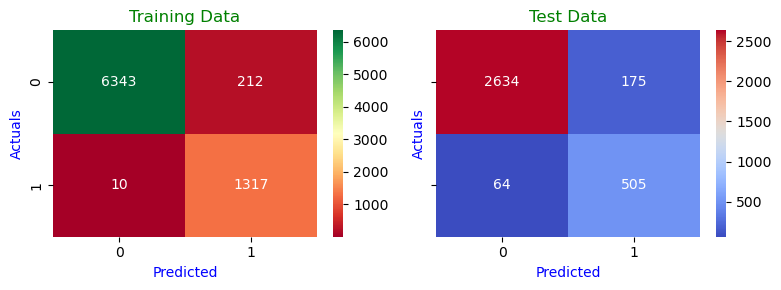

In [390]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 0.998
AUC for the Test Data: 0.969


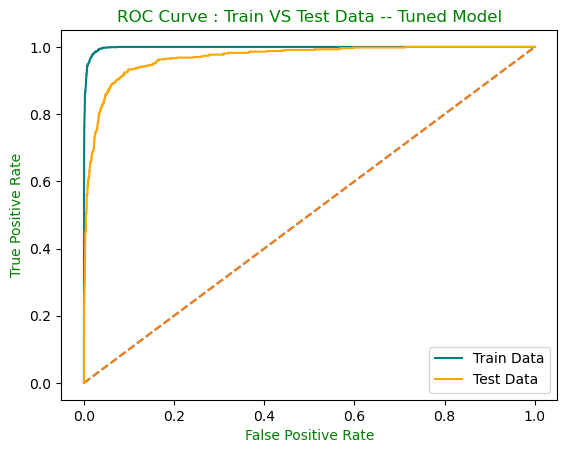

In [391]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = best_model_xgb.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = best_model_xgb.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data -- Tuned Model",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Feature Importance**

In [392]:
best_model_xgb.feature_importances_

array([0.06059014, 0.0560234 , 0.05476294, 0.06651263, 0.06513441,
       0.06291704, 0.09210896, 0.04416598, 0.05207847, 0.19598967,
       0.0525369 , 0.05229684, 0.09042593, 0.05445678], dtype=float32)

In [393]:
imp = pd.DataFrame(best_model_xgb.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
imp

Imp
Tenure_Cat               0.195990
Complain_ly              0.092109
CC_connect_category      0.090426
account_segment          0.066513
CC_Agent_Score           0.065134
Marital_Status           0.062917
City_Tier                0.060590
Payment                  0.056023
Gender                   0.054763
cashback_category        0.054457
CC_Contacted_LY_cat      0.052537
Revenue_Cat              0.052297
Login_device             0.052078
coupon_used_for_payment  0.044166

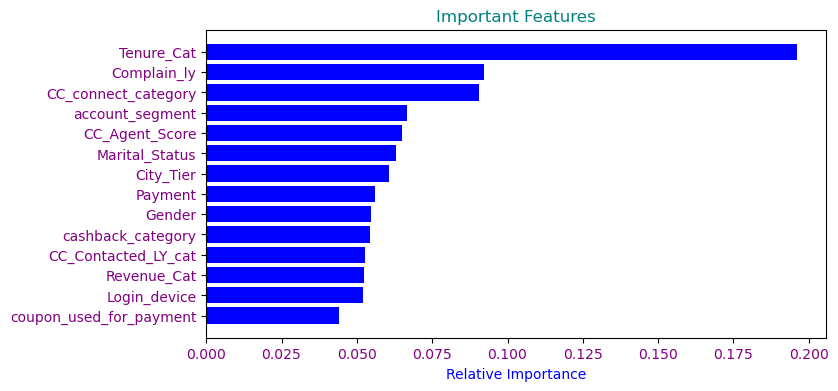

In [394]:
imp = best_model_xgb.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='blue')
plt.title("Important Features",color='teal')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

* The 1st five Important features of XGBoost Tuned model are: Tenure_Cat, Complain_ly, CC_connect_category, account_segment and Marital_Status.

**Comparison Table**

In [395]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                          'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                          'recall_Train':recall_score(y_train,ytrain_pred),
                          'recall_Test':recall_score(y_test,ytest_pred),
                          'precision_Train': precision_score(y_train, ytrain_pred),
                          'precision_Test': precision_score(y_test, ytest_pred),  
                          'f1_Train': f1_score(y_train,ytrain_pred),
                          'f1_Test': f1_score(y_test,ytest_pred),
                          'auc_Train':roc_auc_score(y_train,best_model_xgb.predict_proba(X_train)[:,1]),
                          'auc_Test':roc_auc_score(y_test,best_model_xgb.predict_proba(X_test)[:,1])},index=['XGBoost Classifier Tuned' ])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression               0.841284       0.849319      0.185381   
Logistic Regression Smote         0.741958       0.772943      0.671888   
Logistic Regression Tuned         0.840903       0.849023      0.182366   
LDA                               0.846739       0.854944      0.225320   
LDA Smote                         0.738907       0.768798      0.667006   
LDA Tuned                         0.845851       0.853760      0.217784   
KNN_3                             0.966252       0.917407      0.878674   
KNN_1                             0.991500       0.934873      0.976639   
KNN_3 Smote                       0.973760       0.909710      0.981692   
KNN Tuned                         0.992515       0.937833      0.963828   
Naive Bayes Classifier            0.856382       0.847543      0.559156   
Naive Bayes Smote                 0.726615       0.671403      0.828112   
Random Forest                     0.992641       0.948490      0.969857   
Random Forest Smote               0.994072       0.947306      0.994508   
Random Forest Tuned               0.924892       0.897573      0.598342   
Bagging Classifier                0.988835       0.946418      0.950264   
Bagging Classifier Smote          0.991544       0.943754      0.989829   
Bagging Classifier Tuned          0.989216       0.949970      0.948003   
Ada Boost Classifier              0.868815       0.875666      0.400151   
Ada Boost Classifier Smote        0.873507       0.860272      0.813466   
ADA Boost Tuned                   0.868688       0.875666      0.398644   
XGBoost Classifier                0.979827       0.939905      0.907310   
XGBoost Classifier Smote          0.981606       0.938721      0.975590   
XGBoost Classifier Tuned          0.971835       0.929248      0.992464   

                            recall_Test  precision_Train  precision_Test  \
Logistic Regression            0.228471         0.591346        0.650000   
Logistic Regression Smote      0.646749         0.710323        0.394004   
Logistic Regression Tuned      0.224956         0.588808        0.649746   
LDA                            0.277680         0.624217        0.666667   
LDA Smote                      0.636204         0.707138        0.386752   
LDA Tuned                      0.267135         0.620172        0.663755   
KNN_3                          0.746924         0.917388        0.758929   
KNN_1                          0.826011         0.972973        0.795262   
KNN_3 Smote                    0.848858         0.958110        0.688034   
KNN Tuned                      0.799649         0.991473        0.825771   
Naive Bayes Classifier         0.553603         0.575640        0.546875   
Naive Bayes Smote              0.810193         0.639893        0.315106   
Random Forest                  0.794376         0.986207        0.888016   
Random Forest Smote            0.818981         0.991684        0.861368   
Random Forest Tuned            0.488576         0.930832        0.834835   
Bagging Classifier             0.813708         0.982853        0.860595   
Bagging Classifier Smote       0.818981         0.990434        0.842676   
Bagging Classifier Tuned       0.790861         0.987441        0.900000   
Ada Boost Classifier           0.430580         0.690507        0.718475   
Ada Boost Classifier Smote     0.625659         0.882197        0.578862   
ADA Boost Tuned                0.430580         0.690601        0.718475   
XGBoost Classifier             0.762742         0.970968        0.864542   
XGBoost Classifier Smote       0.811951         0.981379        0.822064   
XGBoost Classifier Tuned       0.887522         0.861347        0.742647   

                            f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression         0.282272  0.338101   0.790640  0.784972  
Logistic Regression Smote   0.690571  0.489687   0.803797  0.781907  
Logistic Regression Tuned   0.278481  0.3

## LightGBM Classifier

In [396]:
 !pip install lightgbm

In [397]:
import lightgbm

In [398]:
lgbm_model = lightgbm.LGBMClassifier(n_estimators=4000,random_state=42)
lgbm_model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 1327, number of negative: 6555
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 7882, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168358 -> initscore=-1.597307
[LightGBM] [Info] Start training from score -1.597307


LGBMClassifier(n_estimators=4000, random_state=42)

**Accuracy of Train and Test set**

In [399]:
print("Accuracy on Train Data: ",lgbm_model.score(X_train,y_train))
print("Accuracy on Test Data: ",lgbm_model.score(X_test,y_test))

Accuracy on Train Data:  0.9926414615579802
Accuracy on Test Data:  0.9523386619301362


**Predictions**

In [400]:
ytrain_pred = lgbm_model.predict(X_train)
ytest_pred = lgbm_model.predict(X_test)

**Classification Report**

In [401]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ytrain_pred),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ytest_pred))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6555
           1       0.99      0.97      0.98      1327

    accuracy                           0.99      7882
   macro avg       0.99      0.98      0.99      7882
weighted avg       0.99      0.99      0.99      7882
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2809
           1       0.87      0.84      0.86       569

    accuracy                           0.95      3378
   macro avg       0.92      0.91      0.91      3378
weighted avg       0.95      0.95      0.95      3378



**Confusion Matrix**

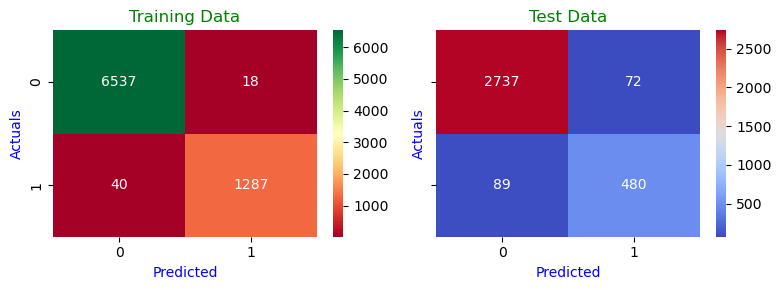

In [402]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')

#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**AUC - ROC Curve**

AUC for the Training Data: 1.000
AUC for the Test Data: 0.978


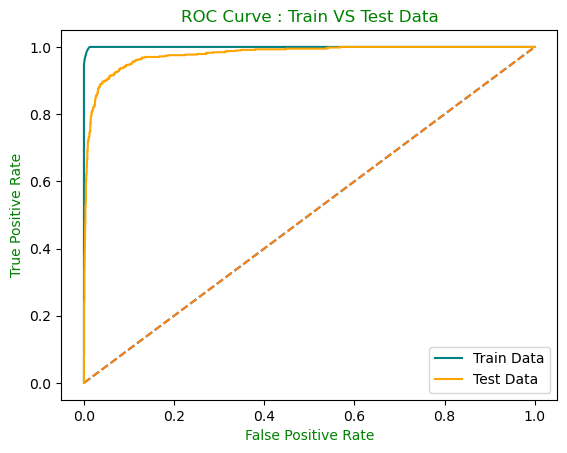

In [403]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = lgbm_model.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = lgbm_model.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Feature Importance**

In [404]:
lgbm_model.feature_importances_

array([ 6910, 15375,  7860,  7084, 20880,  9296,  7923, 14372,  3202,
        4586, 13318,  8189,    81,   924], dtype=int32)

**Feature Importance**

In [405]:
imp = pd.DataFrame(lgbm_model.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
imp

Imp
CC_Agent_Score           20880
Payment                  15375
coupon_used_for_payment  14372
CC_Contacted_LY_cat      13318
Marital_Status            9296
Revenue_Cat               8189
Complain_ly               7923
Gender                    7860
account_segment           7084
City_Tier                 6910
Tenure_Cat                4586
Login_device              3202
cashback_category          924
CC_connect_category         81

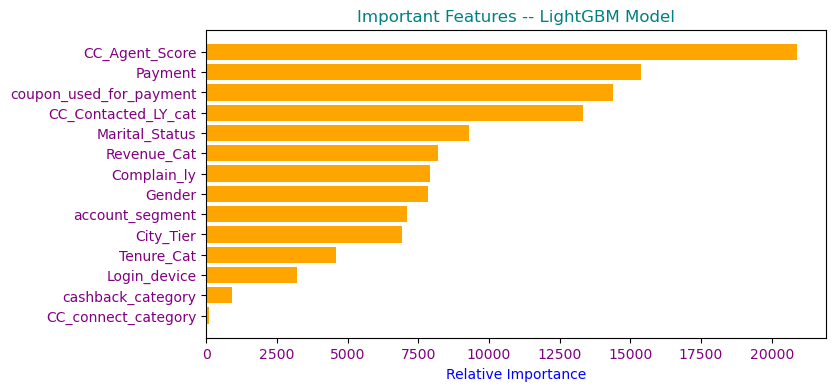

In [406]:
imp = lgbm_model.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='orange')
plt.title("Important Features -- LightGBM Model",color='teal')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

**Comparison Table**

In [407]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ytrain_pred),
                           'Test_Accuracy': accuracy_score(y_test,ytest_pred),
                           'recall_Train':recall_score(y_train,ytrain_pred),
                           'recall_Test':recall_score(y_test,ytest_pred),
                           'precision_Train': precision_score(y_train, ytrain_pred),
                           'precision_Test': precision_score(y_test, ytest_pred),  
                           'f1_Train': f1_score(y_train,ytrain_pred),
                           'f1_Test': f1_score(y_test,ytest_pred),
                           'auc_Train':roc_auc_score(y_train,lgbm_model.predict_proba(X_train)[:,1]),
                           'auc_Test':roc_auc_score(y_test,lgbm_model.predict_proba(X_test)[:,1])},index=['LightGBM Classifier'])
Metrices_table = pd.concat([Metrices_table,resultsDf],axis=0)
Metrices_table

Train_Accuracy  Test_Accuracy  recall_Train  \
Logistic Regression               0.841284       0.849319      0.185381   
Logistic Regression Smote         0.741958       0.772943      0.671888   
Logistic Regression Tuned         0.840903       0.849023      0.182366   
LDA                               0.846739       0.854944      0.225320   
LDA Smote                         0.738907       0.768798      0.667006   
LDA Tuned                         0.845851       0.853760      0.217784   
KNN_3                             0.966252       0.917407      0.878674   
KNN_1                             0.991500       0.934873      0.976639   
KNN_3 Smote                       0.973760       0.909710      0.981692   
KNN Tuned                         0.992515       0.937833      0.963828   
Naive Bayes Classifier            0.856382       0.847543      0.559156   
Naive Bayes Smote                 0.726615       0.671403      0.828112   
Random Forest                     0.992641       0.948490      0.969857   
Random Forest Smote               0.994072       0.947306      0.994508   
Random Forest Tuned               0.924892       0.897573      0.598342   
Bagging Classifier                0.988835       0.946418      0.950264   
Bagging Classifier Smote          0.991544       0.943754      0.989829   
Bagging Classifier Tuned          0.989216       0.949970      0.948003   
Ada Boost Classifier              0.868815       0.875666      0.400151   
Ada Boost Classifier Smote        0.873507       0.860272      0.813466   
ADA Boost Tuned                   0.868688       0.875666      0.398644   
XGBoost Classifier                0.979827       0.939905      0.907310   
XGBoost Classifier Smote          0.981606       0.938721      0.975590   
XGBoost Classifier Tuned          0.971835       0.929248      0.992464   
LightGBM Classifier               0.992641       0.952339      0.969857   

                            recall_Test  precision_Train  precision_Test  \
Logistic Regression            0.228471         0.591346        0.650000   
Logistic Regression Smote      0.646749         0.710323        0.394004   
Logistic Regression Tuned      0.224956         0.588808        0.649746   
LDA                            0.277680         0.624217        0.666667   
LDA Smote                      0.636204         0.707138        0.386752   
LDA Tuned                      0.267135         0.620172        0.663755   
KNN_3                          0.746924         0.917388        0.758929   
KNN_1                          0.826011         0.972973        0.795262   
KNN_3 Smote                    0.848858         0.958110        0.688034   
KNN Tuned                      0.799649         0.991473        0.825771   
Naive Bayes Classifier         0.553603         0.575640        0.546875   
Naive Bayes Smote              0.810193         0.639893        0.315106   
Random Forest                  0.794376         0.986207        0.888016   
Random Forest Smote            0.818981         0.991684        0.861368   
Random Forest Tuned            0.488576         0.930832        0.834835   
Bagging Classifier             0.813708         0.982853        0.860595   
Bagging Classifier Smote       0.818981         0.990434        0.842676   
Bagging Classifier Tuned       0.790861         0.987441        0.900000   
Ada Boost Classifier           0.430580         0.690507        0.718475   
Ada Boost Classifier Smote     0.625659         0.882197        0.578862   
ADA Boost Tuned                0.430580         0.690601        0.718475   
XGBoost Classifier             0.762742         0.970968        0.864542   
XGBoost Classifier Smote       0.811951         0.981379        0.822064   
XGBoost Classifier Tuned       0.887522         0.861347        0.742647   
LightGBM Classifier            0.843585         0.986207        0.869565   

                            f1_Train   f1_Test  auc_Train  auc_Test  
Logistic Regression         0.

##      ------------------------------------Model Comparison-------------------------------------


**Comparing the Models built by Plotting the ROC-AUC Curve for Test data on Base model and Tuned Model.**

### Base Models


AUC Score Base Models : 

AUC for Logistic Regression Test Data:  0.784971854840173
AUC for Linear Discriminant Analysis Test Data:  0.7840533910272092
AUC for K-Nearest Neighbor Test Data:  0.8914673585593883
AUC for Naive bayes Test Data :  0.809155357403175
AUC for Random Forest Test Data :  0.9721754891539309
AUC for Bagging Test Data :  0.955695070014096
AUC for Ada Boost Classifier Test Data :  0.8679113895143715
AUC for XGBoost Classifier Tuned Model :  0.9686414681406301
AUC for LightGBM Classifier Test Data :  0.9784774147370898


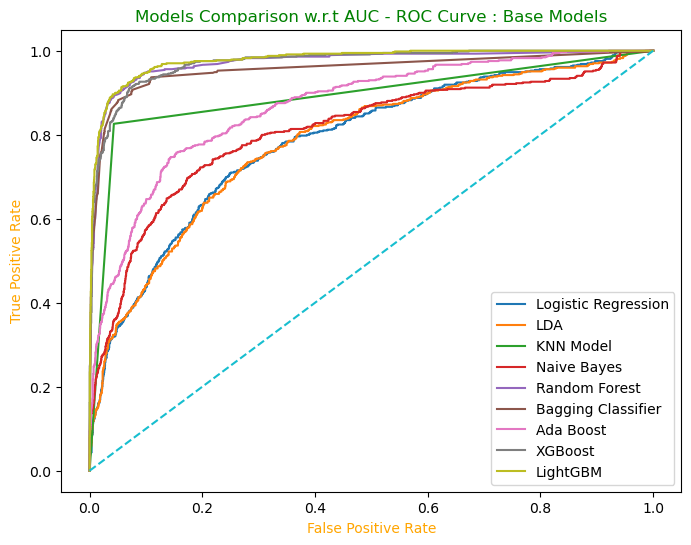

In [408]:
model_names={lgt_model:'Logistic Regression',lda_model: 'LDA',knn_1:'KNN Model',NB_model:'Naive Bayes',
             RF_model:'Random Forest',bgcl:'Bagging Classifier',ADB_model:'Ada Boost',
             xgb:'XGBoost',lgbm_model:'LightGBM'}
print("AUC Score Base Models : \n")

lr_test_auc = roc_auc_score(y_test,lgt_model.predict_proba(X_test)[:,1])
print('AUC for Logistic Regression Test Data: ',lr_test_auc)
lda_test_auc=roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1])
print('AUC for Linear Discriminant Analysis Test Data: ',lda_test_auc)
knn_test_auc =roc_auc_score(y_test,knn_1.predict_proba(X_test)[:,1])
print('AUC for K-Nearest Neighbor Test Data: ',knn_test_auc)
nb_test_auc=roc_auc_score(y_test,NB_model.predict_proba(X_test)[:,1])
print('AUC for Naive bayes Test Data : ',nb_test_auc)
rf_test_auc=roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1])
print('AUC for Random Forest Test Data : ',rf_test_auc)
bgcl_test_auc=roc_auc_score(y_test,bgcl.predict_proba(X_test)[:,1])
print('AUC for Bagging Test Data : ',bgcl_test_auc)
adb_test_auc=roc_auc_score(y_test,ADB_model.predict_proba(X_test)[:,1])
print('AUC for Ada Boost Classifier Test Data : ',adb_test_auc)
xgb_test_auc=roc_auc_score(y_test,best_model_xgb.predict_proba(X_test)[:,1])
print('AUC for XGBoost Classifier Tuned Model : ',xgb_test_auc)
lgbm_test_auc=roc_auc_score(y_test,lgbm_model.predict_proba(X_test)[:,1])
print('AUC for LightGBM Classifier Test Data : ',lgbm_test_auc)


plt.figure(figsize=(8,6))

fpr_lr, tpr_lr, thresholds = roc_curve(y_test,lgt_model.predict_proba(X_test)[:,1])
plt.plot(fpr_lr, tpr_lr)
fpr_lda, tpr_lda, thresholds = roc_curve(y_test, lda_model.predict_proba(X_test)[:,1])
plt.plot(fpr_lda, tpr_lda)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, knn_1.predict_proba(X_test)[:,1])
plt.plot(fpr_knn, tpr_knn)
fpr_nb, tpr_nb, thresholds = roc_curve(y_test, NB_model.predict_proba(X_test)[:,1])
plt.plot(fpr_nb, tpr_nb)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf)
fpr_bgcl, tpr_bgcl, thresholds = roc_curve(y_test, bgcl.predict_proba(X_test)[:,1])
plt.plot(fpr_bgcl, tpr_bgcl)
fpr_adb, tpr_adb, thresholds = roc_curve(y_test, ADB_model.predict_proba(X_test)[:,1])
plt.plot(fpr_adb, tpr_adb)
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.plot(fpr_xgb, tpr_xgb)
fpr_lgbm, tpr_lgbm, thresholds = roc_curve(y_test, lgbm_model.predict_proba(X_test)[:,1])
plt.plot(fpr_lgbm, tpr_lgbm)
         
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('Models Comparison w.r.t AUC - ROC Curve : Base Models',color='green')
plt.xlabel('False Positive Rate',color='orange')
plt.ylabel('True Positive Rate',color='orange')
plt.legend(model_names.values())
plt.show()


**Tuned Model**

AUC Score Tuned Models : 

AUC for Logistic Regression Tuned Model:  0.7852321279642824
AUC for Linear Discriminant Analysis Tuned Model:  0.7837737225501009
AUC for K-Nearest Neighbor Tuned Model:  0.9482419363819908
AUC for Random Forest Tuned Model :  0.9517112019425384
AUC for Bagging Tuned Model :  0.9774150499180077
AUC for Ada Boost Classifier Tuned Model :  0.8679245283018868
AUC for XGBoost Classifier Tuned Model :  0.9686414681406301


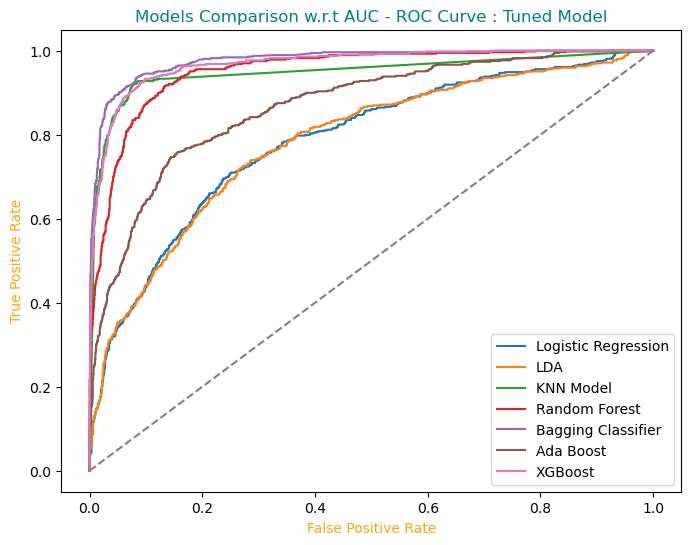

In [409]:
model_names={best_model_lgt:'Logistic Regression',best_model_lda: 'LDA',best_model_knn:'KNN Model',
             best_modelRF:'Random Forest',best_model_bagging:'Bagging Classifier',
             best_model_Adb:'Ada Boost',best_model_xgb:'XGBoost'}

print("AUC Score Tuned Models : \n")

lr_test_auc = roc_auc_score(y_test,best_model_lgt.predict_proba(X_test)[:,1])
print('AUC for Logistic Regression Tuned Model: ',lr_test_auc)
lda_test_auc=roc_auc_score(y_test,best_model_lda.predict_proba(X_test)[:,1])
print('AUC for Linear Discriminant Analysis Tuned Model: ',lda_test_auc)
knn_test_auc =roc_auc_score(y_test,best_model_knn.predict_proba(X_test)[:,1])
print('AUC for K-Nearest Neighbor Tuned Model: ',knn_test_auc)
rf_test_auc=roc_auc_score(y_test,best_modelRF.predict_proba(X_test)[:,1])
print('AUC for Random Forest Tuned Model : ',rf_test_auc)
bgcl_test_auc=roc_auc_score(y_test,best_model_bagging.predict_proba(X_test)[:,1])
print('AUC for Bagging Tuned Model : ',bgcl_test_auc)
adb_test_auc=roc_auc_score(y_test,best_model_Adb.predict_proba(X_test)[:,1])
print('AUC for Ada Boost Classifier Tuned Model : ',adb_test_auc)
xgb_test_auc=roc_auc_score(y_test,best_model_xgb.predict_proba(X_test)[:,1])
print('AUC for XGBoost Classifier Tuned Model : ',xgb_test_auc)


plt.figure(figsize=(8,6))

fpr_lr, tpr_lr, thresholds = roc_curve(y_test,best_model_lgt.predict_proba(X_test)[:,1])
plt.plot(fpr_lr, tpr_lr)
fpr_lda, tpr_lda, thresholds = roc_curve(y_test, best_model_lda.predict_proba(X_test)[:,1])
plt.plot(fpr_lda, tpr_lda)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, best_model_knn.predict_proba(X_test)[:,1])
plt.plot(fpr_knn, tpr_knn)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, best_modelRF.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf)
fpr_bgcl, tpr_bgcl, thresholds = roc_curve(y_test, best_model_bagging.predict_proba(X_test)[:,1])
plt.plot(fpr_bgcl, tpr_bgcl)
fpr_adb, tpr_adb, thresholds = roc_curve(y_test, best_model_Adb.predict_proba(X_test)[:,1])
plt.plot(fpr_adb, tpr_adb)
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, best_model_xgb.predict_proba(X_test)[:,1])
plt.plot(fpr_xgb, tpr_xgb)

         
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('Models Comparison w.r.t AUC - ROC Curve : Tuned Model',color='teal')
plt.xlabel('False Positive Rate',color='orange')
plt.ylabel('True Positive Rate',color='orange')
plt.legend(model_names.values())
plt.show()
